# Configuration

In [21]:
import pandas as pd 
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import stats

#Imports for visualizations
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

#Imports from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error #setting squared=False gives the RMSE
from sklearn.decomposition import PCA

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Set the figure size for the notebook
plt.rcParams["figure.figsize"] = (10, 6)

rs = 42 #random_state value

%matplotlib inline

In [22]:
# Utils functions
def plot_scatter_plot(df, x_val, y_val):
    sns.scatterplot(data=df, x=x_val, y=y_val)

    # Set the plot title and labels
    plt.title('Scatter Plot of Column Distribution')
    plt.xlabel(x_val)
    plt.ylabel(y_val)

    # Display the plot
    plt.show()

# 0. Original dataset analysis and filling with scraped informations

In [23]:
# Read the CSV file
df_dev= pd.read_csv('summer_project_dataset/development.csv')
df_eval= pd.read_csv('summer_project_dataset/evaluation.csv')

# Calculate the percentage of missing values for each column
num_missing = df_dev.isna().sum()
total_values = df_dev.shape[0]
percentage_missing = (num_missing / total_values) * 100

# Print the result for each column
for column, percentage in percentage_missing.items():
    print(f"{column}: {percentage}%")

id: 0.0%
url: 0.0%
timedelta: 0.0%
n_tokens_title: 0.0%
n_tokens_content: 0.0%
n_unique_tokens: 0.0%
n_non_stop_words: 0.0%
n_non_stop_unique_tokens: 0.0%
num_hrefs: 0.0%
num_self_hrefs: 0.0%
num_imgs: 20.10089862840927%
num_videos: 19.962163014346523%
average_token_length: 0.0%
num_keywords: 19.921172946555256%
kw_min_min: 0.0%
kw_max_min: 0.0%
kw_avg_min: 0.0%
kw_min_max: 0.0%
kw_max_max: 0.0%
kw_avg_max: 0.0%
kw_min_avg: 0.0%
kw_max_avg: 0.0%
kw_avg_avg: 0.0%
self_reference_min_shares: 0.0%
self_reference_max_shares: 0.0%
self_reference_avg_sharess: 0.0%
LDA_00: 0.0%
LDA_01: 0.0%
LDA_02: 0.0%
LDA_03: 0.0%
LDA_04: 0.0%
global_subjectivity: 0.0%
global_sentiment_polarity: 0.0%
global_rate_positive_words: 0.0%
global_rate_negative_words: 0.0%
rate_positive_words: 0.0%
rate_negative_words: 0.0%
avg_positive_polarity: 0.0%
min_positive_polarity: 0.0%
max_positive_polarity: 0.0%
avg_negative_polarity: 0.0%
min_negative_polarity: 0.0%
max_negative_polarity: 0.0%
title_subjectivity: 0.0%
ti

Having noted that the dataset had missing values in image and videos I decided to fill those values by retrieving the information.
I wrote a script that scraped for some hours all the URL's where there where NaN's in images and videos

In [24]:
# import pandas as pd 
# import numpy as np
# import requests
# from bs4 import BeautifulSoup
# from requests.exceptions import ConnectionError

# def count_images_and_videos(url):
#     try:
#         # Send a GET request to the URL
#         response = requests.get(url)

#         # Check if the response indicates a 404 error
#         if "Ooops! - 404" in response.text:
#             return 0, 0

#         # Parse the HTML content using BeautifulSoup
#         soup = BeautifulSoup(response.content, 'html.parser')

#         # Find all the <img> tags in the parsed HTML
#         img_tags = soup.find_all('img')

#         # Find all the <video> tags in the parsed HTML
#         video_tags = soup.find_all('video')

#         # Exclude images and videos in the footer
#         footer = soup.find('footer')
#         if footer:
#             footer_images = footer.find_all('img')
#             footer_videos = footer.find_all('video')
#             img_tags = [tag for tag in img_tags if tag not in footer_images]
#             video_tags = [tag for tag in video_tags if tag not in footer_videos]

#         # Count the number of images and videos
#         num_images = len(img_tags)
#         num_videos = len(video_tags)

#         return num_images, num_videos
    
#     except ConnectionError:
#         # Return 0 images and 0 videos in case of ConnectionError
#         return 0, 0

# def fill_num_imgs_and_videos(df, count_images_and_videos):
#     for index, row in df.iterrows():
#         if pd.isna(row['num_imgs']):
#             num_images, num_videos = count_images_and_videos(row['url'])
#             df.at[index, 'num_imgs'] = num_images
#             if pd.isna(row['num_videos']):
#                 df.at[index, 'num_videos'] = num_videos
                
#         if pd.isna(row['num_videos']):
#             num_images, num_videos = count_images_and_videos(row['url'])
#             df.at[index, 'num_videos'] = num_videos


In [25]:
# 220 MINUTES
# fill_num_imgs_and_videos(df_dev, count_images_and_videos)
#df_dev.to_csv('transformed_evaluation.csv', index=False)

#44 MINUTES
# fill_num_imgs_and_videos(df_eval, count_images_and_videos)
#df_eval.to_csv('transformed_evaluation.csv', index=False)


# 1. Dataset Exploration

In [26]:
# Read the CSV file
df_dev = pd.read_csv('summer_project_dataset/transformed_development.csv')
df_dev.head()

id                                                url  timedelta  \
0   0  http://mashable.com/2014/09/08/safest-cabbies-...      121.0   
1   1   http://mashable.com/2013/07/25/3d-printed-rifle/      532.0   
2   2  http://mashable.com/2013/10/30/digital-dinosau...      435.0   
3   3  http://mashable.com/2014/08/27/homer-simpson-i...      134.0   
4   4  http://mashable.com/2013/01/10/creepy-robotic-...      728.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0            1015.0         0.422018               1.0   
1             9.0             503.0         0.569697               1.0   
2             9.0             232.0         0.646018               1.0   
3            12.0             171.0         0.722892               1.0   
4            11.0             286.0         0.652632               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.545031       10.0             6.0      33.0         1.0   
1                  0.737542        9.0             0.0       1.0         0.0   
2                  0.748428       12.0             3.0       4.0         1.0   
3                  0.867925        9.0             5.0       0.0         0.0   
4                  0.800000        5.0             2.0       2.0         0.0   

   average_token_length  num_keywords  kw_min_min  kw_max_min  kw_avg_min  \
0              4.656158           4.0        -1.0       263.0  110.500000   
1              4.576541          10.0         4.0      3200.0  524.750000   
2              4.935345           6.0         4.0       939.0  198.666667   
3              4.970760           6.0        -1.0      2100.0  444.166667   
4              5.006993           NaN       217.0       552.0  356.200000   

   kw_min_max  kw_max_max     kw_avg_max  kw_min_avg   kw_max_avg  \
0      6500.0    843300.0  398350.000000    1809.075  3483.806797   
1         0.0    843300.0  117960.000000       0.000  4228.114286   
2       970.0    843300.0  573878.333333     954.500  6192.239067   
3      5600.0    843300.0  311033.333333    2076.520  4529.427500   
4         0.0     28000.0    6830.125000       0.000  2240.536313   

    kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0  2729.047648                     1100.0                    22100.0   
1  2387.526307                        0.0                        0.0   
2  4385.022237                     1400.0                    58800.0   
3  3269.856640                      974.0                     5600.0   
4   976.913444                      822.0                      822.0   

   self_reference_avg_sharess    LDA_00    LDA_01    LDA_02    LDA_03  \
0                      6475.0  0.331582  0.050050  0.050035  0.050000   
1                         0.0  0.020007  0.020008  0.325602  0.020004   
2                     30100.0  0.033334  0.033697  0.033333  0.866302   
3                      2574.8  0.700107  0.033335  0.033334  0.199402   
4                       822.0  0.214708  0.025062  0.025016  0.025187   

     LDA_04  global_subjectivity  global_sentiment_polarity  \
0  0.518333             0.471175                   0.159889   
1  0.614379             0.477791                   0.123520   
2  0.033333             0.522234                  -0.163235   
3  0.033822             0.405128                  -0.006410   
4  0.710028             0.418036                   0.060089   

   global_rate_positive_words  global_rate_negative_words  \
0                    0.041379                    0.008867   
1                    0.033797                    0.019881   
2                    0.017241                    0.043103   
3                    0.011696                    0.029240   
4                    0.034965                    0.024476   

   rate_positive_words  rate_negative_words  avg_positive_polarity  \
0             0.823529             0.176471               0.333534   
1             

In [27]:
df_eval = pd.read_csv('summer_project_dataset/transformed_evaluation.csv')
df_eval.head()

id                                                url  timedelta  \
0  31715  http://mashable.com/2014/09/06/yao-ming-save-e...      122.0   
1  31716    http://mashable.com/2013/09/29/golf-tech-comic/      466.0   
2  31717  http://mashable.com/2014/05/08/htc-one-m8-pric...      245.0   
3  31718  http://mashable.com/2013/10/07/space-movies-as...      458.0   
4  31719   http://mashable.com/2013/02/27/waze-road-closed/      680.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             606.0         0.492512               1.0   
1            13.0             169.0         0.696429               1.0   
2             8.0             347.0         0.604167               1.0   
3            12.0             299.0         0.612245               1.0   
4             9.0             550.0         0.512821               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.645161       12.0             9.0       3.0         0.0   
1                  0.814815        6.0             2.0       0.0         0.0   
2                  0.669421       11.0             3.0       1.0         0.0   
3                  0.759358        6.0             5.0       1.0         0.0   
4                  0.670769        6.0             3.0       1.0         0.0   

   average_token_length  num_keywords  kw_min_min  kw_max_min  kw_avg_min  \
0              4.813531          10.0        -1.0       309.0      73.800   
1              4.810651          10.0         4.0      2400.0     412.125   
2              5.063401           NaN        -1.0        51.0      24.000   
3              5.063545           NaN         4.0       503.0     154.250   
4              4.530909           6.0       217.0       416.0     307.000   

   kw_min_max  kw_max_max     kw_avg_max   kw_min_avg   kw_max_avg  \
0     37500.0    843300.0  380040.000000  1973.495210  4504.425620   
1         0.0    843300.0  139020.000000     0.000000  4101.929204   
2     27300.0    843300.0  287100.000000  2590.298918  3587.938774   
3      3100.0    843300.0  391125.000000  1094.642857  3259.745585   
4         0.0     80400.0   31583.333333     0.000000  2945.312989   

    kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0  3111.263580                      968.0                     3600.0   
1  2510.996878                     1000.0                     1000.0   
2  3147.473268                     1200.0                     2300.0   
3  2226.234882                      609.0                     6100.0   
4  2196.830479                     1300.0                     1600.0   

   self_reference_avg_sharess    LDA_00    LDA_01    LDA_02    LDA_03  \
0                      2147.2  0.445070  0.020001  0.020035  0.020147   
1                      1000.0  0.020004  0.556085  0.020003  0.020066   
2                      1750.0  0.050000  0.799818  0.050000  0.050181   
3                      2458.0  0.360407  0.050278  0.050000  0.050000   
4                      1450.0  0.033419  0.033335  0.033340  0.033334   

     LDA_04  global_subjectivity  global_sentiment_polarity  \
0  0.494747             0.473733                   0.062189   
1  0.383842             0.483333                   0.175000   
2  0.050000             0.446795                   0.086538   
3  0.489314             0.491375                   0.145586   
4  0.866573             0.419428                   0.140861   

   global_rate_positive_words  global_rate_negative_words  \
0                    0.041254                    0.019802   
1                    0.035503                    0.005917   
2                    0.017291                    0.008646   
3                    0.040134                    0.016722   
4                    0.049091                    0.021818   

   rate_positive_words  rate_negative_words  avg_positive_polarity  \
0             0.675676             0.324324               0.322

In [28]:
df = pd.concat([df_dev, df_eval], sort=False)
len(df_dev), len(df_eval), len(df)

(31715, 7917, 39632)

In [10]:
df.isna().any(axis=0)

id                              False
url                             False
timedelta                       False
n_tokens_title                  False
n_tokens_content                False
n_unique_tokens                 False
n_non_stop_words                False
n_non_stop_unique_tokens        False
num_hrefs                       False
num_self_hrefs                  False
num_imgs                        False
num_videos                      False
average_token_length            False
num_keywords                     True
kw_min_min                      False
kw_max_min                      False
kw_avg_min                      False
kw_min_max                      False
kw_max_max                      False
kw_avg_max                      False
kw_min_avg                      False
kw_max_avg                      False
kw_avg_avg                      False
self_reference_min_shares       False
self_reference_max_shares       False
self_reference_avg_sharess      False
LDA_00      

## 1.1 Development set

In [11]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31715 entries, 0 to 31714
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31715 non-null  int64  
 1   url                           31715 non-null  object 
 2   timedelta                     31715 non-null  float64
 3   n_tokens_title                31715 non-null  float64
 4   n_tokens_content              31715 non-null  float64
 5   n_unique_tokens               31715 non-null  float64
 6   n_non_stop_words              31715 non-null  float64
 7   n_non_stop_unique_tokens      31715 non-null  float64
 8   num_hrefs                     31715 non-null  float64
 9   num_self_hrefs                31715 non-null  float64
 10  num_imgs                      31715 non-null  float64
 11  num_videos                    31715 non-null  float64
 12  average_token_length          31715 non-null  float64
 13  n

In [12]:
df_dev.describe()

id     timedelta  n_tokens_title  n_tokens_content  \
count  31715.00000  31715.000000    31715.000000      31715.000000   
mean   15857.00000    354.058206       10.390730        544.048179   
std     9155.47623    214.314223        2.115643        467.730448   
min        0.00000      8.000000        2.000000          0.000000   
25%     7928.50000    163.000000        9.000000        246.000000   
50%    15857.00000    338.000000       10.000000        409.000000   
75%    23785.50000    542.000000       12.000000        713.000000   
max    31714.00000    731.000000       23.000000       8474.000000   

       n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  \
count     31715.000000      31715.000000              31715.000000   
mean          0.530754          0.970140                  0.672973   
std           0.137106          0.170203                  0.154128   
min           0.000000          0.000000                  0.000000   
25%           0.471276          1.000000                  0.626028   
50%           0.539568          1.000000                  0.690909   
75%           0.608523          1.000000                  0.754644   
max           1.000000          1.000000                  1.000000   

          num_hrefs  num_self_hrefs      num_imgs    num_videos  \
count  31715.000000    31715.000000  31715.000000  31715.000000   
mean      10.865143        3.274381      3.987955      0.808387   
std       11.295386        3.822364      7.625425      3.455282   
min        0.000000        0.000000      0.000000      0.000000   
25%        4.000000        1.000000      1.000000      0.000000   
50%        7.000000        3.000000      1.000000      0.000000   
75%       14.000000        4.000000      3.000000      0.000000   
max      304.000000      116.000000    128.000000     91.000000   

       average_token_length  num_keywords    kw_min_min     kw_max_min  \
count          31715.000000  25397.000000  31715.000000   31715.000000   
mean               4.547096      7.220538     26.094624    1146.761240   
std                0.845050      1.904411     69.607933    3949.597979   
min                0.000000      1.000000     -1.000000       0.000000   
25%                4.477934      6.000000     -1.000000     445.000000   
50%                4.664251      7.000000     -1.000000     659.000000   
75%                4.853503      9.000000      4.000000    1000.000000   
max                8.041534     10.000000    294.000000  298400.000000   

         kw_avg_min     kw_min_max     kw_max_max     kw_avg_max  \
count  31715.000000   31715.000000   31715.000000   31715.000000   
mean     310.665636   13537.952956  752156.547375  259272.219208   
std      621.518386   57773.417428  214790.290225  135230.002910   
min       -1.000000       0.000000       0.000000       0.000000   
25%      141.732143       0.000000  843300.000000  172748.571428   
50%      235.857143    1400.000000  843300.000000  244550.000000   
75%      357.112500    7800.000000  843300.000000  331200.000000   
max    42827.857143  843300.000000  843300.000000  843300.000000   

         kw_min_avg     kw_max_avg    kw_avg_avg  self_reference_min_shares  \
count  31715.000000   31715.000000  31715.000000               31715.000000   
mean    1115.519577    5645.840622   3131.505048                4026.917646   
std     1136.724206    6173.405093   1329.314912               19928.490868   
min       -1.000000       0.000000      0.000000                   0.000000   
25%        0.000000    3557.341810   2377.668653                 642.000000   
50%     1020.750000    4346.305556   2867.653996                1200.000000   
75%     2056.403080    6016.750000   3595.493907                2600.000000   
max     3610.124972  298400.000000  43567.659946              843300.000000   

       self_reference_max_shares  self_reference_avg_sharess        LDA_00  \
count               31715.000000                31715.000000  31715.000000   
me

In [13]:
df_dev.duplicated().sum()

0

In [14]:
null_pct = 100*df_dev.isnull().sum()/len(df_dev)
null_pct[null_pct>0]

num_keywords    19.921173
dtype: float64

The development dataset has no duplicates and has 31715 entries and only num_keywords has null values because I filled num_imgs and num_videos in this new transformed_dataset

In [15]:
profile = ProfileReport(df_dev, minimal=True)
#profile.to_widgets()

In [16]:
# profile.to_file("OnlineNewsPopularity.html")

## 1.2 Evaluation set

In [17]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            7917 non-null   int64  
 1   url                           7917 non-null   object 
 2   timedelta                     7917 non-null   float64
 3   n_tokens_title                7917 non-null   float64
 4   n_tokens_content              7917 non-null   float64
 5   n_unique_tokens               7917 non-null   float64
 6   n_non_stop_words              7917 non-null   float64
 7   n_non_stop_unique_tokens      7917 non-null   float64
 8   num_hrefs                     7917 non-null   float64
 9   num_self_hrefs                7917 non-null   float64
 10  num_imgs                      7917 non-null   float64
 11  num_videos                    7917 non-null   float64
 12  average_token_length          7917 non-null   float64
 13  num

In [18]:
profile = ProfileReport(df_eval, minimal=True)
# profile.to_widgets()

In [19]:
# profile.to_file("OnlineNewsPopularity_evaluation.html")

num_keywords has 20,3% of missing values and also in the development_set there is around 20% missing data

# 2. Feature Analysis

In this section a deeper feature analysis is performed in order to understand the values distributions

In [20]:
columns_to_ohe = ['weekday', 'data_channel']
# Create an instance of OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_dev_columns= ohe.fit_transform(df_dev[columns_to_ohe]).toarray()

# Create a DataFrame from the encoded array
encoded_dev_df = pd.DataFrame(encoded_dev_columns, columns=ohe.get_feature_names_out(columns_to_ohe))

# Concatenate the encoded columns with the original DataFrame
df_dev_encoded = pd.concat([df_dev, encoded_dev_df], axis=1)

# Remove the original categorical columns
df_dev_encoded.drop(columns_to_ohe, axis=1, inplace=True)
df_dev_encoded.fillna(0,inplace=True)

columns_to_drop = ['id', 'url','shares']
# Prepare the features and target variable
X = df_dev_encoded.drop(columns_to_drop, axis=1)
y = df_dev_encoded['shares']

rf = RandomForestRegressor()
rf.fit(X, y)

feature_importance = rf.feature_importances_

# Create a DataFrame to store the feature importance for the specific model
model_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
model_feature_importance_df = model_feature_importance_df.sort_values(by='Importance', ascending=False)
# Save feature importance to a CSV file
model_feature_importance_df.to_csv('feature_importance_by_randomforest.csv', index=False)
model_feature_importance_df


KeyboardInterrupt: 

### 2.1 shares (target variable)

In [ ]:
df_dev['shares'].describe()

count     31715.000000
mean       3407.068863
std       11899.460219
min           4.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [ ]:
# Compute the median of the 'shares' column
median_shares = df_dev['shares'].median()

print("Median of 'shares' column:", median_shares)

Median of 'shares' column: 1400.0


In [ ]:
# Compute the 95th percentile
percentile_95 = df_dev['shares'].quantile(0.95)
print('95th Percentile (Quartile):', percentile_95)

95th Percentile (Quartile): 10729.999999999927


There is a lot of distance between the 95% and the max which is 843300

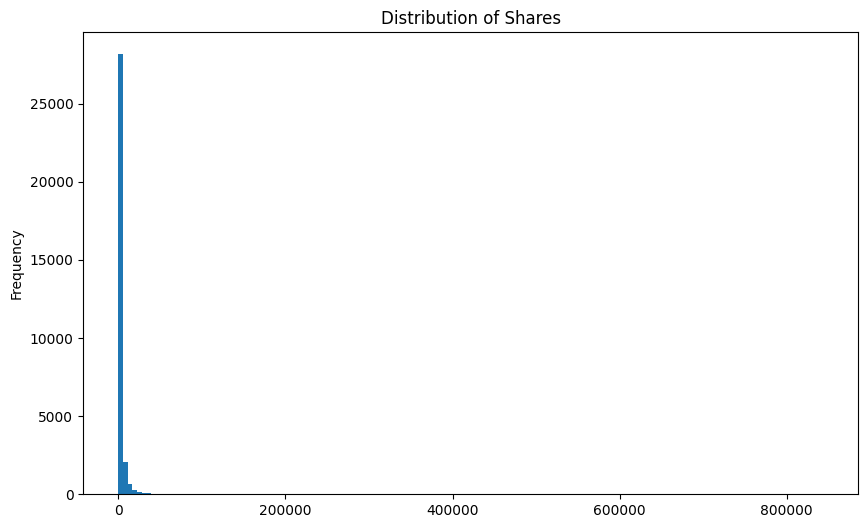

In [29]:
data = df_dev['shares']
plt.hist(data, bins=150)
plt.title("Distribution of Shares")
plt.ylabel("Frequency")
plt.show()

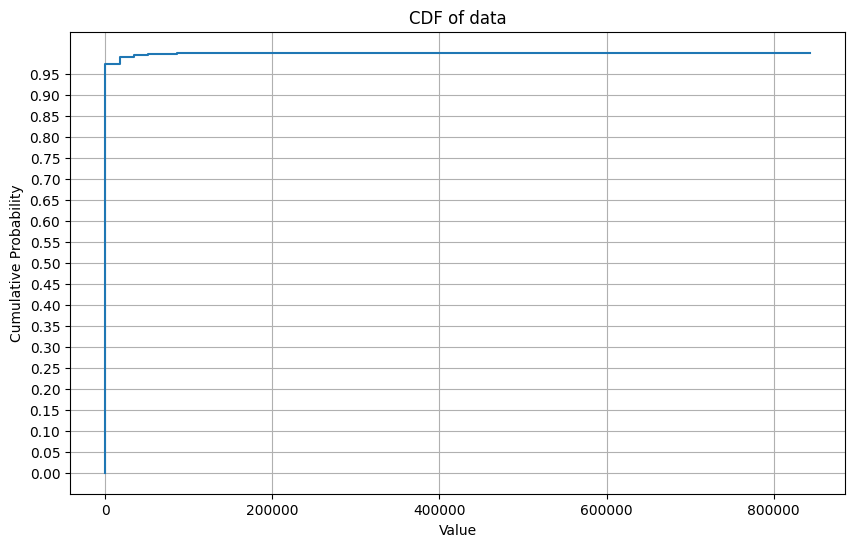

In [20]:
data = df_dev['shares']
ecdf = ECDF(data)
x = np.linspace(min(data), max(data))
y = ecdf(x)

plt.step(x, y)
plt.title("CDF of data")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.yticks(np.arange(0, 1, 0.05))
plt.show()

In [22]:
# Checking for 0's in shares values
df_dev[df_dev['shares'] == 0].count()

id                              0
url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
n_non_stop_words                0
n_non_stop_unique_tokens        0
num_hrefs                       0
num_self_hrefs                  0
num_imgs                        0
num_videos                      0
average_token_length            0
num_keywords                    0
kw_min_min                      0
kw_max_min                      0
kw_avg_min                      0
kw_min_max                      0
kw_max_max                      0
kw_avg_max                      0
kw_min_avg                      0
kw_max_avg                      0
kw_avg_avg                      0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_sharess      0
LDA_00                          0
LDA_01                          0
LDA_02                          0
LDA_03        

Outlier analysis of shares

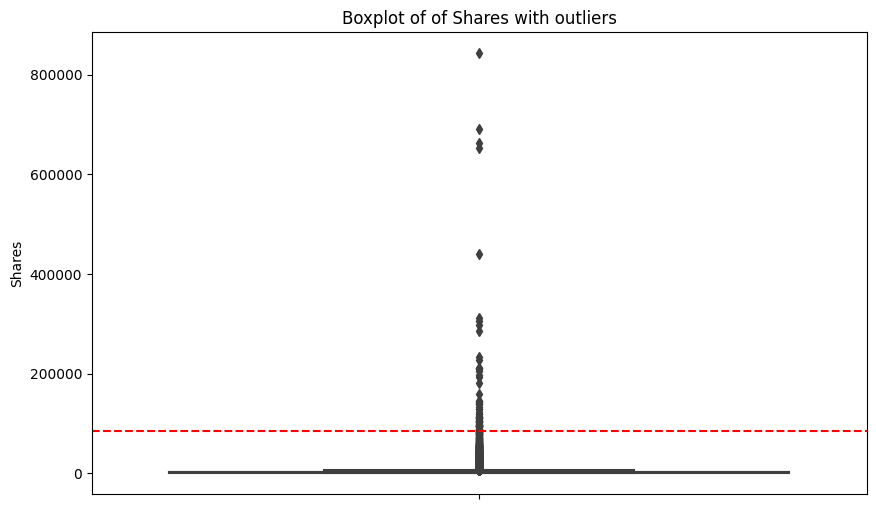

In [23]:
sns.boxplot(data=df_dev, y='shares')

# Set the plot title and labels
plt.title('Boxplot of of Shares with outliers')
plt.ylabel('Shares')

# Add horizontal lines at 100000 and 200000
plt.axhline(y=85000, color='r', linestyle='--', label='150000')

# Display the plot
plt.show()

It seems that they are some outliers

I visualize the boxplot without them

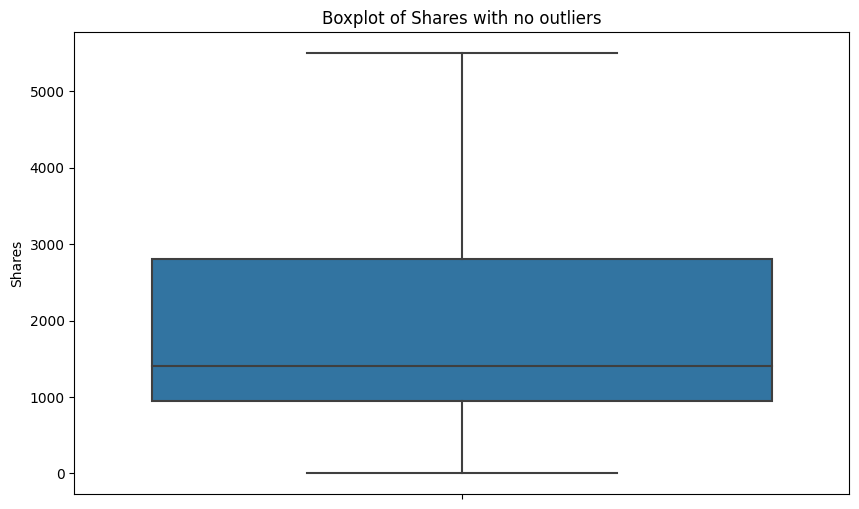

In [24]:
sns.boxplot(data=df_dev, y='shares', showfliers = False)

# Set the plot title and labels
plt.title('Boxplot of Shares with no outliers')
plt.ylabel('Shares')

# Display the plot
plt.show()

In [25]:
#To better see how many outliers you have for each percentile

percentile = 99.5
cutoff_value = np.percentile(df_dev['shares'], percentile)

value = df_dev[df_dev['shares']>cutoff_value]['id'].count()/df_dev['id'].count() * 100
num = df_dev[df_dev['shares']>cutoff_value]['id'].count()
print(f'Percentage of data that is outlier using {cutoff_value} as cut off value is: {value}%')
print(f'The number of data points that are outliers are {num}')

Percentage of data that is outlier using 50372.00000000012 as cut off value is: 0.5013400599085606%
The number of data points that are outliers are 159


I specifically want to see the biggest outliers

In [38]:
df_dev[df_dev['shares'] > 500000]

id                                                url  timedelta  \
3662    3662  http://mashable.com/2013/11/18/kanye-west-harv...      416.0   
11390  11390    http://mashable.com/2013/07/03/low-cost-iphone/      554.0   
14146  14146  http://mashable.com/2014/04/09/first-100-gilt-...      274.0   
28842  28842  http://mashable.com/2013/04/15/dove-ad-beauty-...      633.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
3662              9.0             134.0         0.689394               1.0   
11390            12.0             688.0         0.500734               1.0   
14146            13.0            2591.0         0.237708               1.0   
28842            11.0             893.0         0.517202               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
3662                   0.851852        1.0             1.0       1.0   
11390                  0.643357       28.0             3.0      15.0   
14146                  0.371091       27.0             4.0      11.0   
28842                  0.716730       17.0            11.0       1.0   

       num_videos  average_token_length  num_keywords  kw_min_min  kw_max_min  \
3662          0.0              4.082090           7.0         4.0      6100.0   
11390         1.0              4.893895           6.0         4.0      1100.0   
14146         0.0              4.588962          10.0        -1.0       623.0   
28842         0.0              4.586786           6.0         4.0     10100.0   

        kw_avg_min  kw_min_max  kw_max_max     kw_avg_max  kw_min_avg  \
3662   1139.285714      1700.0    843300.0  540557.142857   1500.0000   
11390   225.500000      2800.0    690400.0  430716.666667   1700.0000   
14146   140.800000      2300.0    843300.0  165680.000000   1441.0000   
28842  1937.666667     10100.0    617900.0  280433.333333   2874.8706   

         kw_max_avg   kw_avg_avg  self_reference_min_shares  \
3662   15250.000000  5270.699017                   298400.0   
11390   5117.417323  3753.110567                     2100.0   
14146   3953.929636  2860.284775                     1100.0   
28842  10100.000000  5083.768906                      705.0   

       self_reference_max_shares  self_reference_avg_sharess    LDA_00  \
3662                    298400.0               298400.000000  0.600988   
11390                    40000.0                17066.666667  0.034464   
14146                    20700.0                10875.000000  0.354915   
28842                    17300.0                 5099.111111  0.701874   

         LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  \
3662   0.172973  0.028572  0.168895  0.028572             0.556854   
11390  0.034359  0.033335  0.699919  0.197924             0.503345   
14146  0.122336  0.020140  0.020044  0.482565             0.415273   
28842  0.033383  0.033334  0.198075  0.033333             0.450678   

       global_sentiment_polarity  global_rate_positive_words  \
3662                    0.004040                    0.037313   
11390                   0.186037                    0.059593   
14146                   0.075724                    0.028174   
28842                   0.100533                    0.047032   

       global_rate_negative_words  rate_positive_words  rate_negative_words  \
3662                     0.014925             0.714286             0.285714   
11390                    0.017442             0.773585             0.226415   
14146                    0.017754             0.613445             0.386555   
28842                    0.024636             0.656250             0.343750   

       avg_positive_polarity  min_positive_polarity  max_positive_polarity  \
3662                0.287273               0.100000                    0.5   
11390               0.336022               0.050000                    1.0   
14146               0.349033               0.033333                    0.8   
28842               0.421230

IN CASE YOU WANT TO CUT THEM OF FOR THE PROCEDING ANALYSIS you can uncomment this cell

In [53]:
threshold = 85000
data_points_discarded = df_dev[df_dev['shares']>threshold]['id'].count()
value = df_dev[df_dev['shares']>threshold]['id'].count()/df_dev['id'].count() * 100
df_dev = df_dev[df_dev['shares'] < threshold]
print(f'Percentage of data set discarded by using as threshold {threshold} is: {value}%')
print(f'Number of datapoints discarded by using as threshold {threshold} is: {data_points_discarded}')

Percentage of data set discarded by using as threshold 85000 is: 0.19864417468075046%
Number of datapoints discarded by using as threshold 85000 is: 63


PEARSON correlation of all the features with target

In [54]:
#I first encode the categorical values 
channel_onehot = pd.get_dummies(df_dev['data_channel'])
df = pd.concat((df_dev,channel_onehot), axis = 1).drop(columns = 'data_channel')
weekday_onehot = pd.get_dummies(df_dev['weekday'])
df = pd.concat((df,weekday_onehot), axis = 1).drop(columns = 'weekday')

df = df.drop('id', axis = 1 )
print("Correlations with respect to shares of all numerical features: ")
df.corr('pearson')['shares'].sort_values()

Correlations with respect to shares of all numerical features: 


C:\Users\lucas\AppData\Local\Temp\ipykernel_16216\4159465903.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr('pearson')['shares'].sort_values()


LDA_02                         -0.095912
world                          -0.077762
avg_negative_polarity          -0.041701
bus                            -0.037970
average_token_length           -0.036165
n_non_stop_unique_tokens       -0.033246
n_non_stop_words               -0.031132
min_negative_polarity          -0.029045
rate_positive_words            -0.024602
entertainment                  -0.022307
LDA_00                         -0.017634
wednesday                      -0.015952
LDA_04                         -0.014968
max_negative_polarity          -0.014038
tuesday                        -0.012076
n_unique_tokens                -0.011904
thursday                       -0.011803
tech                           -0.010568
LDA_01                         -0.007644
abs_title_subjectivity         -0.005920
num_self_hrefs                 -0.005019
friday                         -0.004140
rate_negative_words            -0.003689
n_tokens_content               -0.000934
timedelta       

kw_avg_avg is the positive correlated and also the LDA's are more correlated than average to the target

### 2.2 url

In [55]:
df_dev['url']

0        http://mashable.com/2014/09/08/safest-cabbies-...
1         http://mashable.com/2013/07/25/3d-printed-rifle/
2        http://mashable.com/2013/10/30/digital-dinosau...
3        http://mashable.com/2014/08/27/homer-simpson-i...
4        http://mashable.com/2013/01/10/creepy-robotic-...
                               ...                        
31710    http://mashable.com/2014/11/30/star-wars-guard...
31711            http://mashable.com/2014/11/14/uk-floods/
31712    http://mashable.com/2014/09/08/paypal-bitcoin-...
31713    http://mashable.com/2013/08/23/mashable-androi...
31714    http://mashable.com/2014/09/24/designers-dilem...
Name: url, Length: 31652, dtype: object

In [56]:
# Extract the date portion using regular expressions
df_dev['Date'] = df_dev['url'].str.extract(r'(\d{4}/\d{2}/\d{2})')


### 2.2.1 Date (subsection)

In [57]:
df_dev['Date']

0        2014/09/08
1        2013/07/25
2        2013/10/30
3        2014/08/27
4        2013/01/10
            ...    
31710    2014/11/30
31711    2014/11/14
31712    2014/09/08
31713    2013/08/23
31714    2014/09/24
Name: Date, Length: 31652, dtype: object

In [58]:
df_dev[['Year', 'Month', 'Day']] = df_dev['Date'].str.split('/', expand=True)

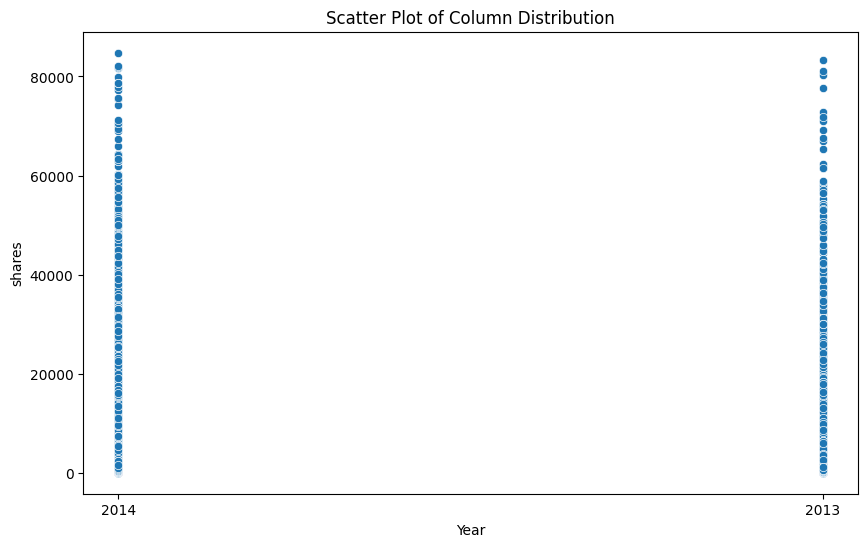

In [59]:
plot_scatter_plot(df_dev, 'Year', 'shares')

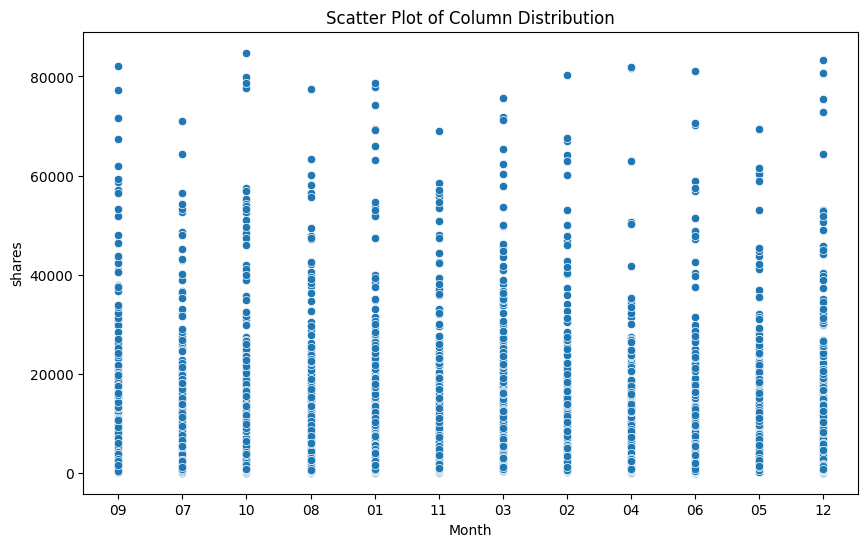

In [60]:
plot_scatter_plot(df_dev, 'Month', 'shares')

C:\Users\lucas\AppData\Local\Temp\ipykernel_16216\863322595.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df_dev.groupby(by='Month').mean()['shares'])


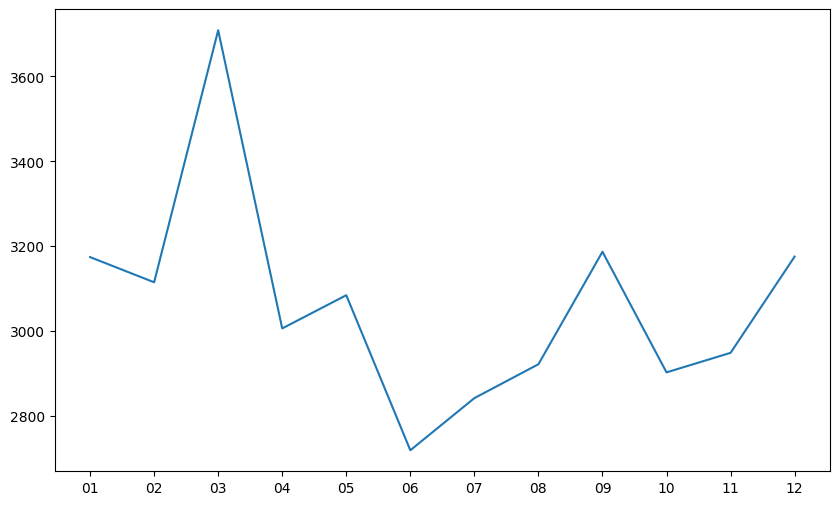

In [61]:
plt.plot(df_dev.groupby(by='Month').mean()['shares'])
plt.show()

<Axes: title={'center': 'shares'}, xlabel='Month'>

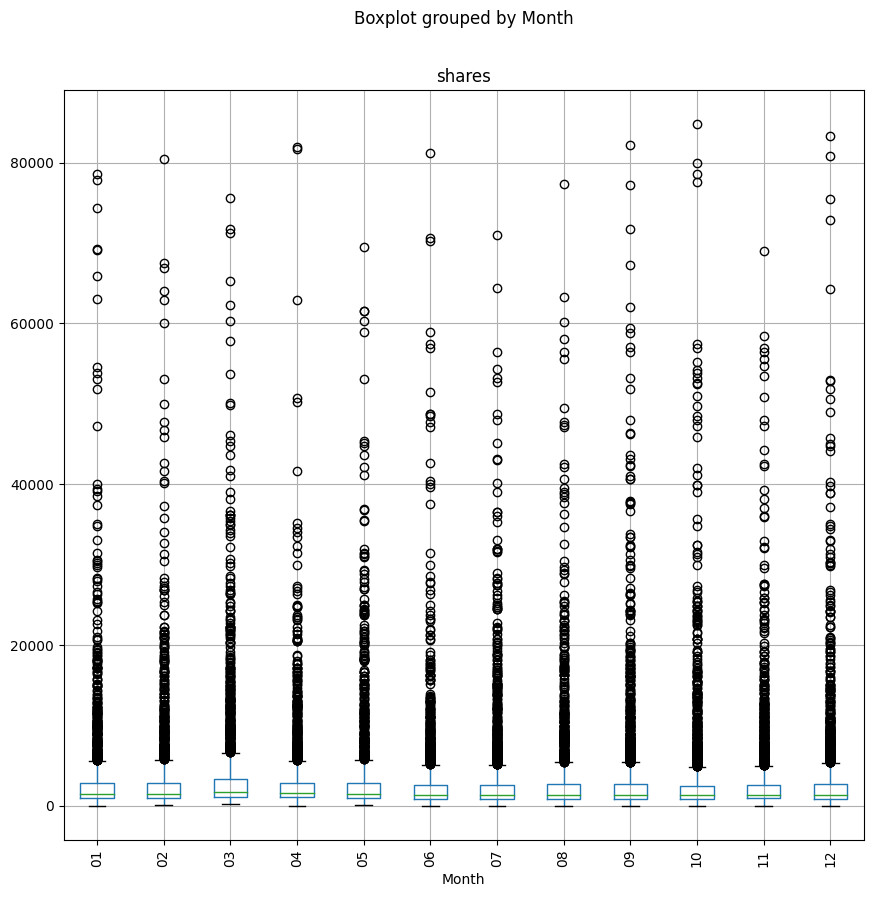

In [62]:
df_dev.boxplot(column = 'shares', by = 'Month', rot= 90, figsize = (10,10))

Month 3 is clearly the highest

I perform again a Random Forest search to see if the additional columns could be useful

In [63]:
# Extract the date portion using regular expressions
df_dev['Date'] = df_dev['url'].str.extract(r'(\d{4}/\d{2}/\d{2})')
df_dev[['Year', 'Month', 'Day']] = df_dev['Date'].str.split('/', expand=True)
df_dev.drop(['Day', 'Date'], axis = 1, inplace=True)

columns_to_ohe = ['weekday', 'data_channel', 'Year', 'Month']
# Create an instance of OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_dev_columns= ohe.fit_transform(df_dev[columns_to_ohe]).toarray()

# Create a DataFrame from the encoded array
encoded_dev_df = pd.DataFrame(encoded_dev_columns, columns=ohe.get_feature_names_out(columns_to_ohe))

# Concatenate the encoded columns with the original DataFrame
df_dev_encoded = pd.concat([df_dev, encoded_dev_df], axis=1)

# Remove the original categorical columns
df_dev_encoded.drop(columns_to_ohe, axis=1, inplace=True)
df_dev_encoded.fillna(0,inplace=True)

columns_to_drop = ['id', 'url','shares']
# Prepare the features and target variable
X = df_dev_encoded.drop(columns_to_drop, axis=1)
y = df_dev_encoded['shares']

rf = RandomForestRegressor()
rf.fit(X, y)

feature_importance = rf.feature_importances_

# Create a DataFrame to store the feature importance for the specific model
model_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
model_feature_importance_df = model_feature_importance_df.sort_values(by='Importance', ascending=False)
# Save feature importance to a CSV file
model_feature_importance_df.to_csv('feature_importance_with_additional_features_by_randomforest.csv', index=False)
model_feature_importance_df

Feature  Importance
20                 kw_avg_avg    0.073721
19                 kw_max_avg    0.035537
30  global_sentiment_polarity    0.033416
25                     LDA_01    0.033239
17                 kw_avg_max    0.031368
..                        ...         ...
58                  Year_2013    0.002026
47           weekday_saturday    0.001899
16                 kw_max_max    0.001868
12                 kw_min_min    0.001840
4            n_non_stop_words    0.000151

[72 rows x 2 columns]

They don't seem to have a big impact, so I will drop this idea

### 2.3 timedelta

Feature importance from Random Forest is:
* 13 - Timedelta

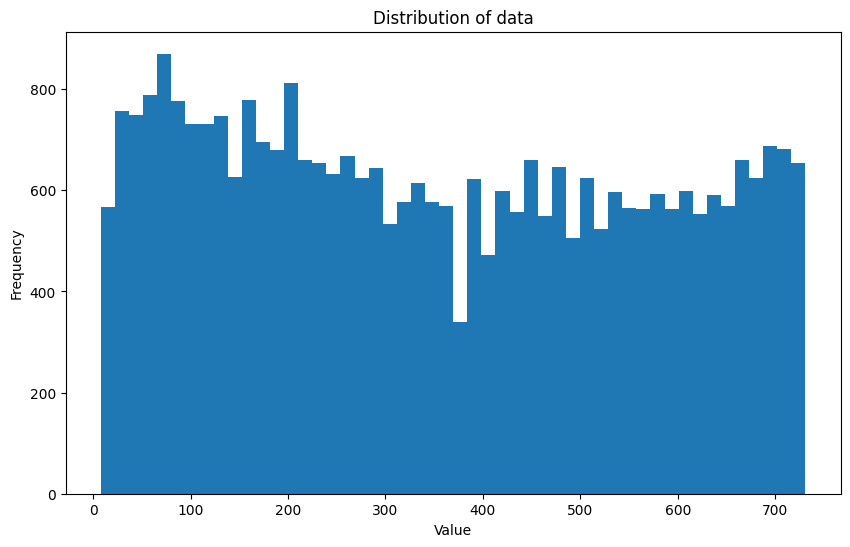

In [64]:
data = df_dev['timedelta']
plt.hist(data, bins=50)
plt.title("Distribution of data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

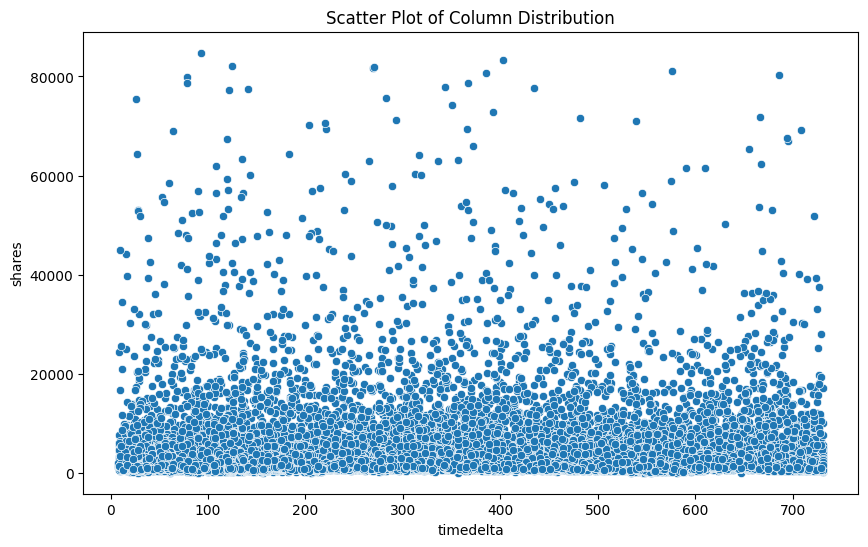

In [65]:
plot_scatter_plot(df_dev, 'timedelta', 'shares')

Timedelta has to be kept as a feature 

### 2.4 n_tokens_title, n_unique_tokens , n_tokens_content, n_non_stop_unique_tokens


Feature importance from Random Forest are:
* 2 - n_tokens_content
* 17 - n_non_stop_unique_tokens
* 20 - n_unique_tokens
* 32 - n_tokens_title

The focus is to find correlations for the most important features

In [66]:
columns_of_interest = ['n_tokens_content', 'n_non_stop_unique_tokens', 'n_unique_tokens', 'n_tokens_title', 'shares']

In [67]:
df_dev[columns_of_interest].describe()

n_tokens_content  n_non_stop_unique_tokens  n_unique_tokens  \
count      31652.000000              31652.000000     31652.000000   
mean         544.078636                  0.672988         0.530723   
std          467.261130                  0.154053         0.137034   
min            0.000000                  0.000000         0.000000   
25%          247.000000                  0.626033         0.471229   
50%          409.000000                  0.690808         0.539541   
75%          713.250000                  0.754630         0.608341   
max         8474.000000                  1.000000         1.000000   

       n_tokens_title        shares  
count    31652.000000  31652.000000  
mean        10.390149   3056.409990  
std          2.115560   5628.792909  
min          2.000000      4.000000  
25%          9.000000    946.000000  
50%         10.000000   1400.000000  
75%         12.000000   2800.000000  
max         23.000000  84800.000000

In [68]:
df_dev[columns_of_interest].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31652 entries, 0 to 31714
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   n_tokens_content          31652 non-null  float64
 1   n_non_stop_unique_tokens  31652 non-null  float64
 2   n_unique_tokens           31652 non-null  float64
 3   n_tokens_title            31652 non-null  float64
 4   shares                    31652 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 2.5 MB


In [69]:
df_dev[df_dev[columns_of_interest] == 0].count()

id                                0
url                               0
timedelta                         0
n_tokens_title                    0
n_tokens_content                944
n_unique_tokens                 944
n_non_stop_words                  0
n_non_stop_unique_tokens        944
num_hrefs                         0
num_self_hrefs                    0
num_imgs                          0
num_videos                        0
average_token_length              0
num_keywords                      0
kw_min_min                        0
kw_max_min                        0
kw_avg_min                        0
kw_min_max                        0
kw_max_max                        0
kw_avg_max                        0
kw_min_avg                        0
kw_max_avg                        0
kw_avg_avg                        0
self_reference_min_shares         0
self_reference_max_shares         0
self_reference_avg_sharess        0
LDA_00                            0
LDA_01                      

Checking the links I saw that it is not possible that this zeros are correct because they have title and text so it's a false value, so probably the best thing is to discard those lines

In [70]:
n_tokens_content_zero = df_dev[df_dev['n_tokens_content'] == 0]
n_tokens_content_zero.head()

id                                                url  timedelta  \
24    24  http://mashable.com/2014/07/14/ebola-west-afri...      178.0   
51    51      http://mashable.com/2014/11/20/frozen-coding/       48.0   
66    66  http://mashable.com/2014/12/07/guantanamo-bay-...       30.0   
82    82  http://mashable.com/2014/07/20/braff-del-toro-...      172.0   
179  179  http://mashable.com/2014/07/20/homemade-body-s...      171.0   

     n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
24             13.0               0.0              0.0               0.0   
51             13.0               0.0              0.0               0.0   
66             11.0               0.0              0.0               0.0   
82             12.0               0.0              0.0               0.0   
179            13.0               0.0              0.0               0.0   

     n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
24                        0.0        0.0             0.0       0.0   
51                        0.0        0.0             0.0       1.0   
66                        0.0        0.0             0.0       0.0   
82                        0.0        0.0             0.0      11.0   
179                       0.0        0.0             0.0      17.0   

     num_videos  average_token_length  num_keywords  kw_min_min  kw_max_min  \
24          0.0                   0.0           8.0        -1.0      1100.0   
51          1.0                   0.0           6.0        -1.0       451.0   
66          1.0                   0.0           5.0        -1.0       426.0   
82          0.0                   0.0           5.0        -1.0       191.0   
179         0.0                   0.0           NaN        -1.0      3700.0   

     kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg  \
24   237.798571         0.0    843300.0  368483.375000     0.000000   
51   145.931667    110200.0    843300.0  599116.666667  3411.935940   
66    84.918000    211600.0    843300.0  716960.000000  3401.817194   
82    68.500000         0.0    843300.0  371840.000000     0.000000   
179  521.222222      3700.0    843300.0  308022.222222  2177.469530   

      kw_max_avg   kw_avg_avg  self_reference_min_shares  \
24   7216.345907  3198.828436                        0.0   
51   6833.161421  5380.064740                        0.0   
66   6974.664605  5662.213361                        0.0   
82   6011.274920  3108.906535                        0.0   
179  7798.444142  4152.345048                        0.0   

     self_reference_max_shares  self_reference_avg_sharess    LDA_00  \
24                         0.0                         0.0  0.025004   
51                         0.0                         0.0  0.033334   
66                         0.0                         0.0  0.040000   
82                         0.0                         0.0  0.040000   
179                        0.0                         0.0  0.022236   

       LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  \
24   0.025537  0.147062  0.777396  0.025002                  0.0   
51   0.033347  0.033333  0.865066  0.034920                  0.0   
66   0.040021  0.040000  0.839979  0.040000                  0.0   
82   0.690183  0.040000  0.189817  0.040000                  0.0   
179  0.022231  0.410443  0.522852  0.022239                  0.0   

     global_sentiment_polarity  global_rate_positive_words  \
24                         0.0                         0.0   
51                         0.0                         0.0   
66                         0.0                         0.0   
82                         0.0                         0.0   
179                        0.0                         0.0   

     global_rate_negative_words  rate_positive_words  rate_negative_words  \
24                          0.0                  0.0                  0.0   
51                          0.0                  0.

Check if two columns have the same values


In [71]:
same_values = n_tokens_content_zero['n_unique_tokens'] == n_tokens_content_zero['n_tokens_content']
count_not_same = len(same_values) - same_values.sum()
not_same_rows = n_tokens_content_zero[~same_values]
not_same_rows

Empty DataFrame
Columns: [id, url, timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens, num_hrefs, num_self_hrefs, num_imgs, num_videos, average_token_length, num_keywords, kw_min_min, kw_max_min, kw_avg_min, kw_min_max, kw_max_max, kw_avg_max, kw_min_avg, kw_max_avg, kw_avg_avg, self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess, LDA_00, LDA_01, LDA_02, LDA_03, LDA_04, global_subjectivity, global_sentiment_polarity, global_rate_positive_words, global_rate_negative_words, rate_positive_words, rate_negative_words, avg_positive_polarity, min_positive_polarity, max_positive_polarity, avg_negative_polarity, min_negative_polarity, max_negative_polarity, title_subjectivity, title_sentiment_polarity, abs_title_subjectivity, abs_title_sentiment_polarity, shares, data_channel, weekday, Year, Month]
Index: []

This means that when n_unique_tokens is zero then also n_tokens_content is zero.

Now I want to check just to be sure also n_non_stop_unique_tokens

In [72]:
same_values = n_tokens_content_zero['n_unique_tokens'] == n_tokens_content_zero['n_non_stop_unique_tokens']
count_not_same = len(same_values) - same_values.sum()
not_same_rows = n_tokens_content_zero[~same_values]
not_same_rows

Empty DataFrame
Columns: [id, url, timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens, num_hrefs, num_self_hrefs, num_imgs, num_videos, average_token_length, num_keywords, kw_min_min, kw_max_min, kw_avg_min, kw_min_max, kw_max_max, kw_avg_max, kw_min_avg, kw_max_avg, kw_avg_avg, self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess, LDA_00, LDA_01, LDA_02, LDA_03, LDA_04, global_subjectivity, global_sentiment_polarity, global_rate_positive_words, global_rate_negative_words, rate_positive_words, rate_negative_words, avg_positive_polarity, min_positive_polarity, max_positive_polarity, avg_negative_polarity, min_negative_polarity, max_negative_polarity, title_subjectivity, title_sentiment_polarity, abs_title_subjectivity, abs_title_sentiment_polarity, shares, data_channel, weekday, Year, Month]
Index: []

They all have zero's at the same lines.

Can I eliminate? Cheking for similar instances on the evaluation set

In [73]:
df = df_eval[df_eval['n_tokens_content'] == 0]
df.count()

id                              231
url                             231
timedelta                       231
n_tokens_title                  231
n_tokens_content                231
n_unique_tokens                 231
n_non_stop_words                231
n_non_stop_unique_tokens        231
num_hrefs                       231
num_self_hrefs                  231
num_imgs                        231
num_videos                      231
average_token_length            231
num_keywords                    181
kw_min_min                      231
kw_max_min                      231
kw_avg_min                      231
kw_min_max                      231
kw_max_max                      231
kw_avg_max                      231
kw_min_avg                      231
kw_max_avg                      231
kw_avg_avg                      231
self_reference_min_shares       231
self_reference_max_shares       231
self_reference_avg_sharess      231
LDA_00                          231
LDA_01                      

In [74]:
df.head()

id                                                url  timedelta  \
62   31777  http://mashable.com/2014/09/08/neil-patrick-ha...      121.0   
83   31798  http://mashable.com/2014/11/04/news-anchor-dan...       64.0   
90   31805  http://mashable.com/2014/12/09/destover-sony-m...       29.0   
169  31884  http://mashable.com/2014/08/10/pictures-turkey...      150.0   
199  31914  http://mashable.com/2014/10/09/ebola-protests-...       91.0   

     n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
62              9.0               0.0              0.0               0.0   
83             10.0               0.0              0.0               0.0   
90             12.0               0.0              0.0               0.0   
169             9.0               0.0              0.0               0.0   
199            10.0               0.0              0.0               0.0   

     n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
62                        0.0        0.0             0.0       1.0   
83                        0.0        0.0             0.0       0.0   
90                        0.0        0.0             0.0       0.0   
169                       0.0        0.0             0.0       1.0   
199                       0.0        0.0             0.0       0.0   

     num_videos  average_token_length  num_keywords  kw_min_min  kw_max_min  \
62          0.0                   0.0           6.0        -1.0       498.0   
83          1.0                   0.0           NaN        -1.0       830.0   
90          1.0                   0.0           8.0        -1.0       426.0   
169         0.0                   0.0           9.0        -1.0       816.0   
199         1.0                   0.0           7.0        -1.0       602.0   

     kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg  \
62    91.765000    133700.0    843300.0  623383.333333  3483.806797   
83   176.166667      5800.0    843300.0  512833.333333  2067.000000   
90   180.198750     31400.0    843300.0  396575.000000  3399.331393   
169  164.444444      5600.0    843300.0  396977.777778  1817.250000   
199  127.798571      1200.0    843300.0  520214.285714   862.500000   

      kw_max_avg   kw_avg_avg  self_reference_min_shares  \
62   9837.684211  6005.303898                        0.0   
83   5808.387149  4022.502533                        0.0   
90   6546.354076  5423.773839                        0.0   
169  5948.923369  4143.903951                        0.0   
199  6939.841506  4634.046630                        0.0   

     self_reference_max_shares  self_reference_avg_sharess    LDA_00  \
62                         0.0                         0.0  0.033333   
83                         0.0                         0.0  0.033335   
90                         0.0                         0.0  0.025003   
169                        0.0                         0.0  0.022222   
199                        0.0                         0.0  0.170754   

       LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  \
62   0.033386  0.033333  0.866614  0.033333                  0.0   
83   0.033547  0.033389  0.866396  0.033334                  0.0   
90   0.025008  0.025000  0.899989  0.025000                  0.0   
169  0.548397  0.022222  0.384936  0.022222                  0.0   
199  0.028848  0.028572  0.743253  0.028572                  0.0   

     global_sentiment_polarity  global_rate_positive_words  \
62                         0.0                         0.0   
83                         0.0                         0.0   
90                         0.0                         0.0   
169                        0.0                         0.0   
199                        0.0                         0.0   

     global_rate_negative_words  rate_positive_words  rate_negative_words  \
62                          0.0                  0.0                  0.0   
83                          0.0          

I can't eliminate this instances because also in evaluation set you have 200 zeros in this n_tokens_content I have to impute somehow them

How is it better to impute them? Let's see mean and median

In [75]:
df_dev['n_tokens_content'].describe()

count    31652.000000
mean       544.078636
std        467.261130
min          0.000000
25%        247.000000
50%        409.000000
75%        713.250000
max       8474.000000
Name: n_tokens_content, dtype: float64

In [76]:
df_dev['n_tokens_content'].median()

409.0

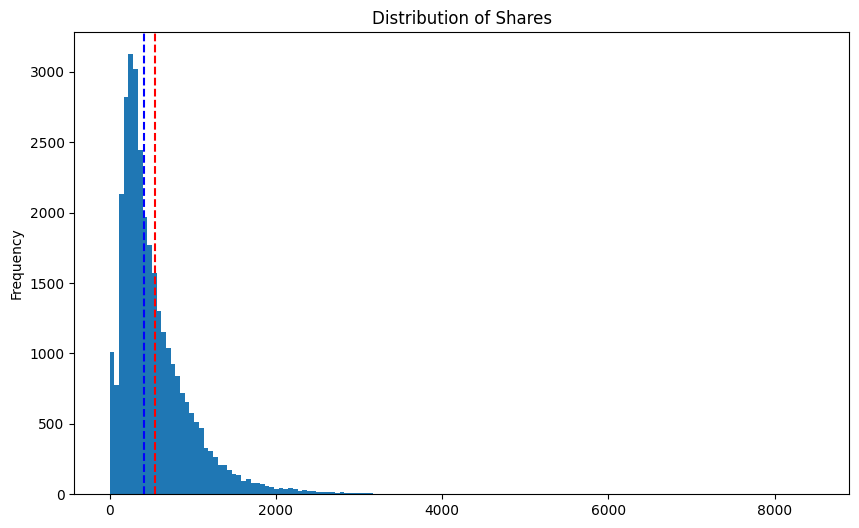

In [77]:
data = df_dev['n_tokens_content']
plt.hist(data, bins=150)
plt.title("Distribution of Shares")
plt.ylabel("Frequency")
plt.axvline(x=544, color='r', linestyle='--', label='95% percentile line')
plt.axvline(x=409, color='b', linestyle='--', label='95% percentile line')

plt.show()

I'll probably go with the median because it has more instances, the distribution is very skewed

#### Correlations 

Remember feature importance is:
* 2 - n_tokens_content
* 18 - n_non_stop_unique_tokens
* 21 - n_unique_tokens
* 33 - n_tokens_title

<Axes: >

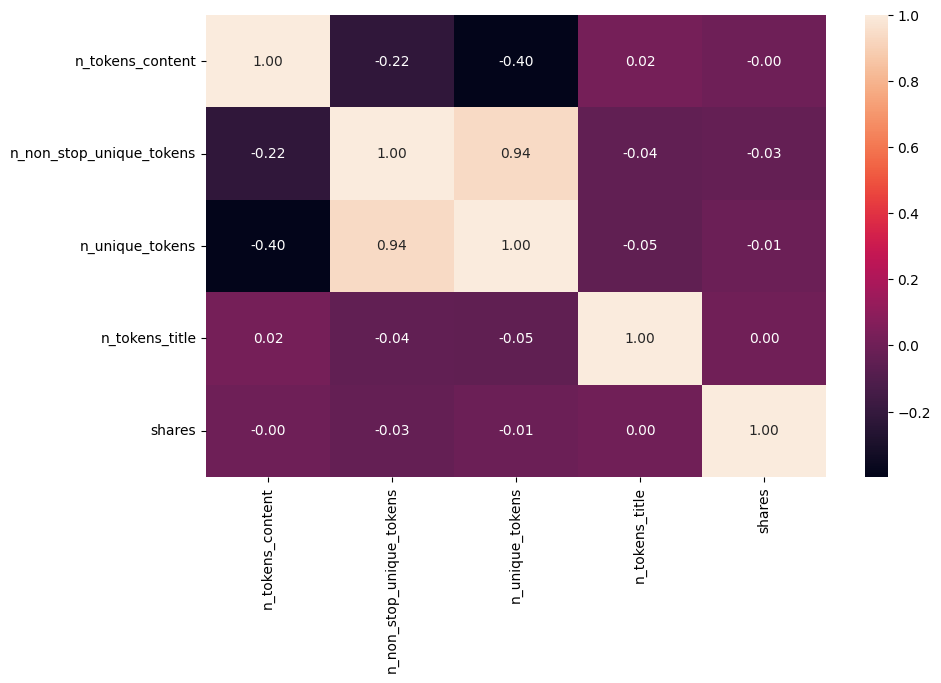

In [78]:
df = df_dev[columns_of_interest]
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

I only take n_tokens_content to keep as a feature because most uncorrelated to the others and also most important

### 2.5 num_hrefs, num_self_hrefs

Feature importance from Random Forest are:
* 14 - num_hrefs
* 34 - num_self_hrefs


To check if this pages with lot of links have actually so much values

In [79]:
df_dev[df_dev['num_hrefs'] > 160]['url']

9110     http://mashable.com/2014/11/26/detroit-riots-1...
18796        http://mashable.com/2013/03/15/dead-twitters/
25268    http://mashable.com/2014/12/03/princess-rap-ba...
26618    http://mashable.com/2014/04/14/fault-in-our-st...
26955    http://mashable.com/2014/12/21/dueling-hashtag...
Name: url, dtype: object

To check if num_hrefs includes also num_self_hrefs and yes it does so num_self_hrefs can be discarded

In [80]:
tmp = df_dev.loc[df_dev['num_hrefs'] < 10,['num_hrefs','num_self_hrefs']]
tmp[tmp['num_hrefs']<tmp['num_self_hrefs']]
#Quick check that num_hrefs includes also num_self_hrefs

Empty DataFrame
Columns: [num_hrefs, num_self_hrefs]
Index: []

Taking only num_hrefs as important feature because information of self_hrefs is already included in hrefs

### 2.6 num_imgs, num_videos

I developed and run a scraping script in order to fill the NaN's of imgs and videos both for development and evaluation using the available URL's

Feature importance from Random Forest are:
* 31 - num_imgs
* 39 - num_videos

Contrary to what my previous believe was num_imgs and num_videos are not so important in prediction but I try different combinations of this columns in order to aggregate this information

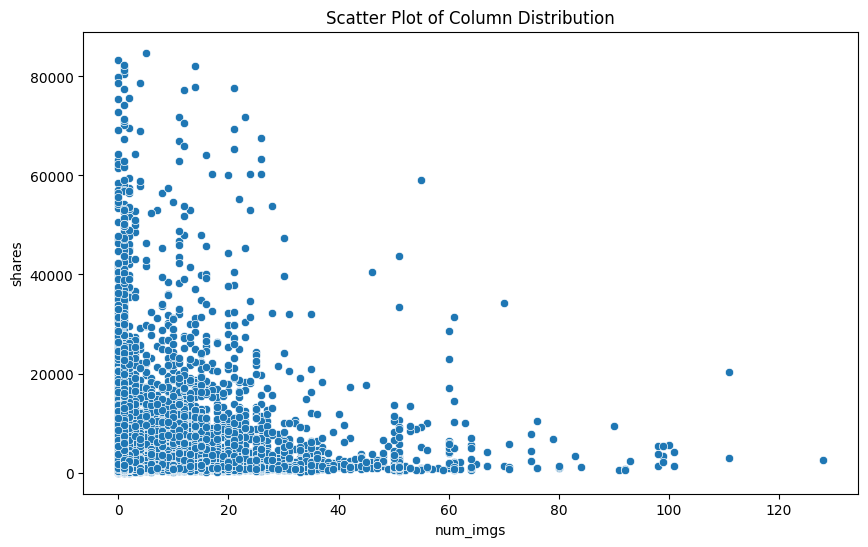

In [81]:
plot_scatter_plot(df_dev, 'num_imgs', 'shares')

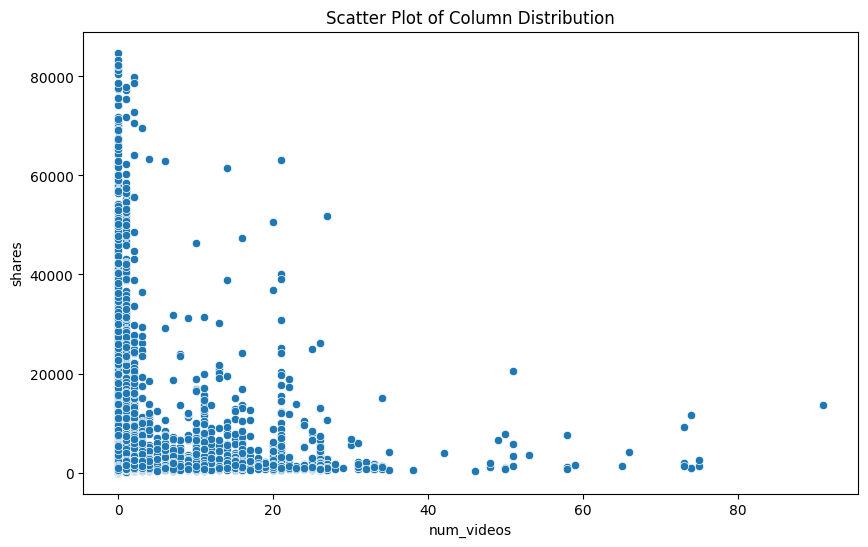

In [82]:
plot_scatter_plot(df_dev, 'num_videos', 'shares')

Checking for correlations in this features

<Axes: >

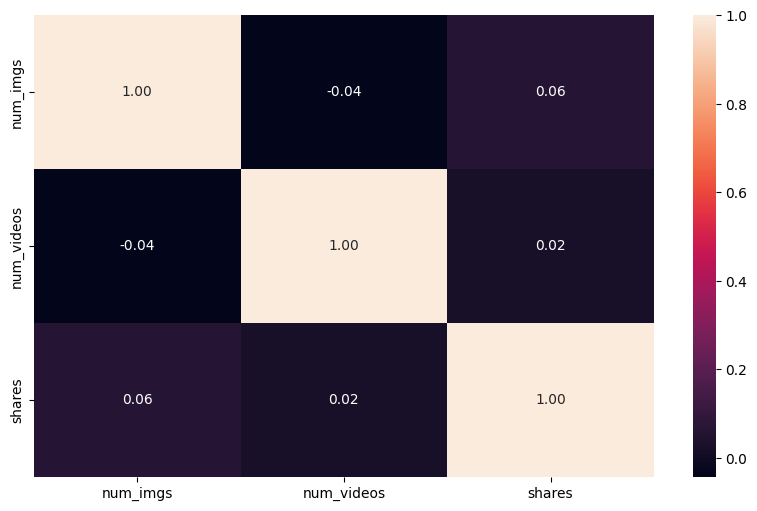

In [83]:
df = df_dev[['num_imgs', 'num_videos', 'shares']]
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

Checking if sum or product shows something more

<Axes: >

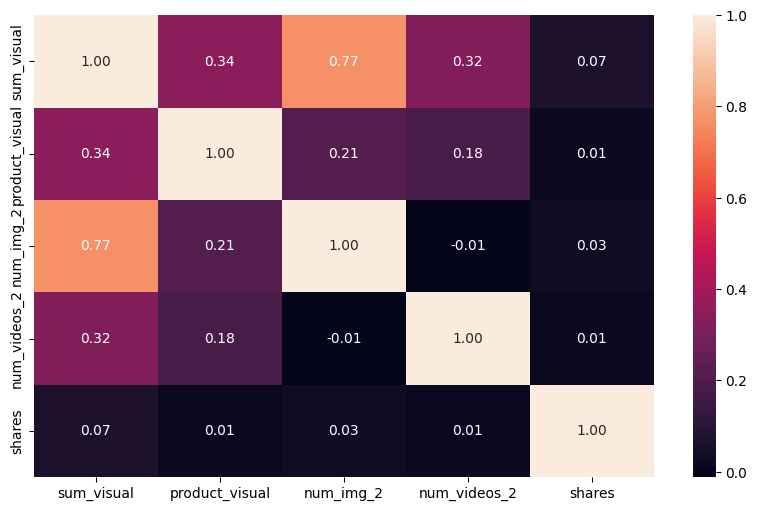

In [84]:
df = df_dev
df['sum_visual'] = df['num_imgs'] + df['num_videos']
df['product_visual'] = df['num_imgs'] * df['num_videos']
df['num_img_2'] = df['num_imgs'] * df['num_imgs']
df['num_videos_2'] = df['num_videos'] * df['num_videos']
sns.heatmap(df[['sum_visual', 'product_visual', 'num_img_2', 'num_videos_2', 'shares' ]].corr(),annot = True, fmt = '.2f')

Nothing to be noted

I take them and use them separately and not as a sum

### 2.7 average_token_length

Feature importance from Random Forest are:
* 6 - average_token_lenght

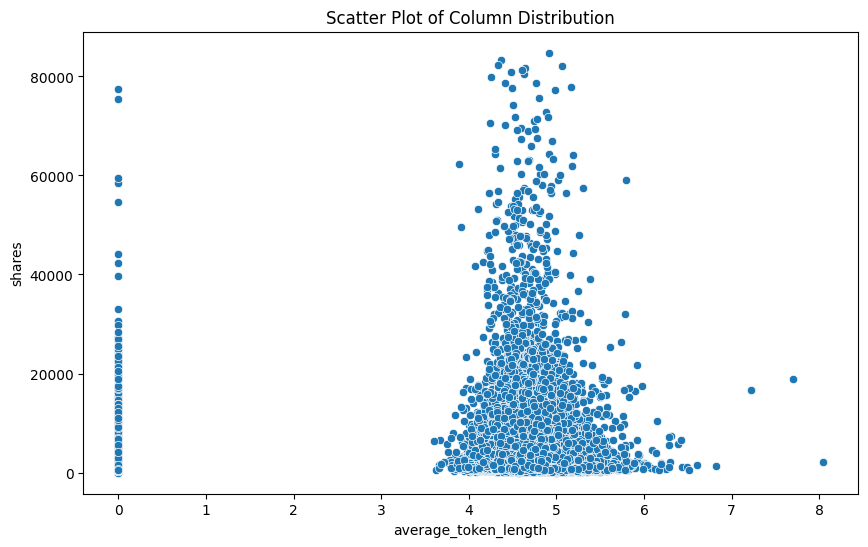

In [85]:
plot_scatter_plot(df_dev, 'average_token_length', 'shares')

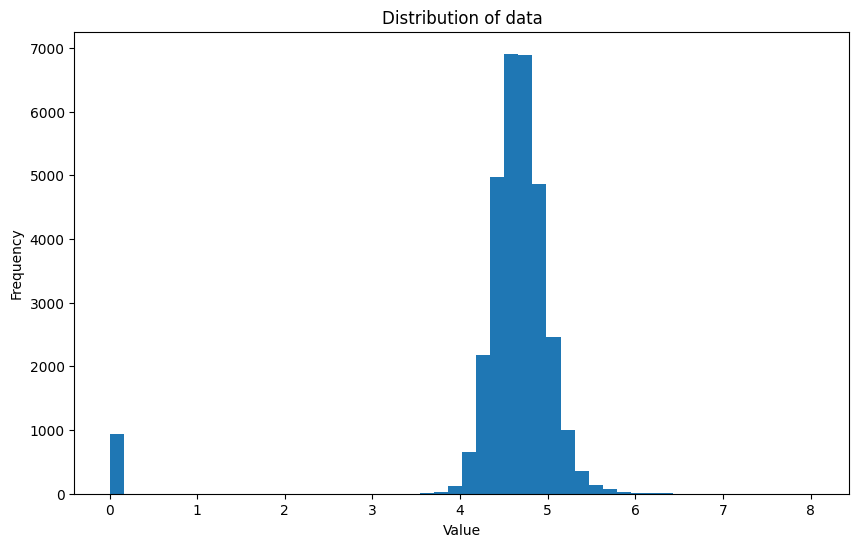

In [86]:
data = df_dev['average_token_length']
plt.hist(data, bins=50)
plt.title("Distribution of data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [88]:
df_dev[['average_token_length','shares']].corr()

average_token_length    shares
average_token_length              1.000000 -0.036165
shares                           -0.036165  1.000000

This is a column that I want to preserve

### 2.8 num_keywords

Feature importance from Random Forest are:
* 41 - num_keywords

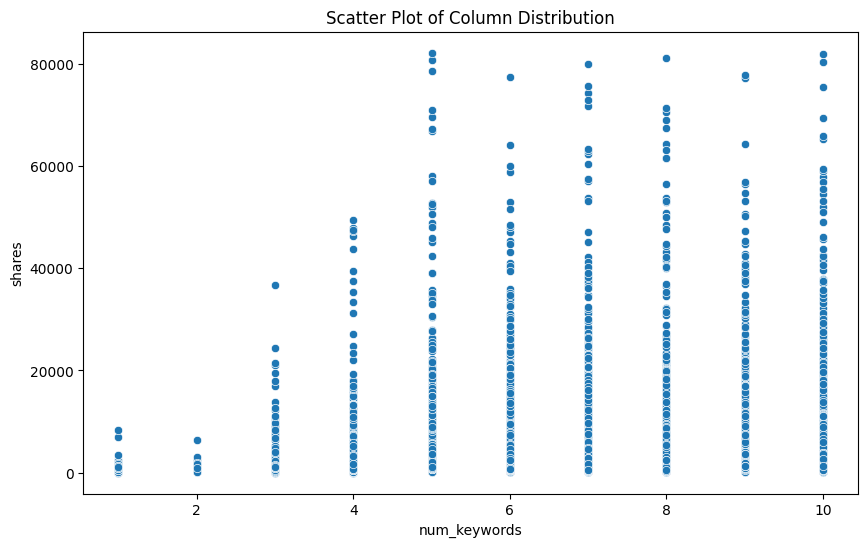

In [89]:
plot_scatter_plot(df_dev, 'num_keywords', 'shares')

This has 20% of missing data and also in the evaluation set there are a lot of instances of missing data so I decide to discard it

### 2.9 data channel

Feature importance from Random Forest are:
* 43 - bus
* 52 - tech
* 54 - entertainment
* 60 - lifestyle
* 68 - socmed
* 71 - world

Contrary to my prior belief they are not important

In [90]:
df = df_dev[['data_channel','shares']]
# Calculate the distribution, min, max, and mean of daily_shares for each category
category_stats = df.groupby('data_channel')['shares'].agg(['count', 'min', 'max', 'mean'])

# Print the statistics and correlations
print("Data Channel Statistics:")
print(category_stats)


Data Channel Statistics:
               count  min    max         mean
data_channel                                 
bus             4990   22  80800  2562.392585
entertainment   5683   49  82200  2788.011790
lifestyle       6516    4  82000  4536.944905
socmed          1850    5  59000  3456.756757
tech            5897   82  83300  2932.097846
world           6716   41  84800  2213.008487


socmed has definitely much less data points

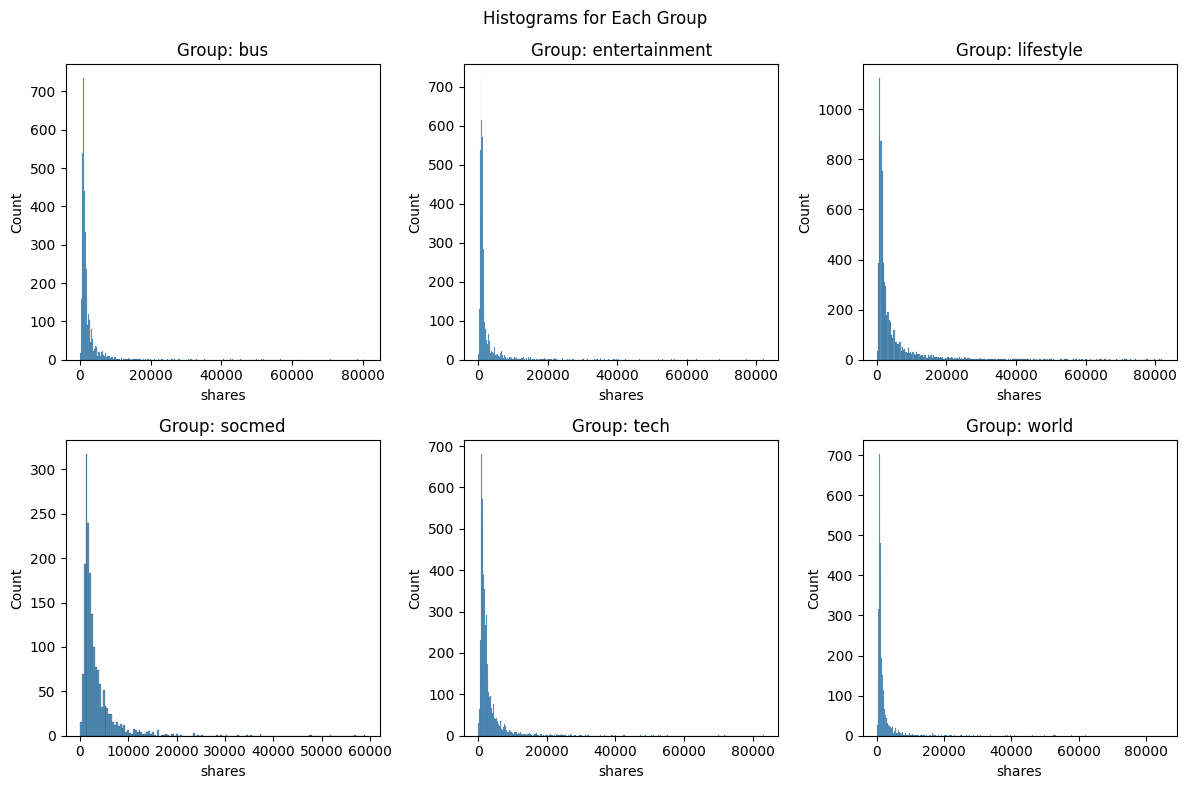

In [91]:
category_stats = df.groupby('data_channel')

num_groups = len(category_stats)
num_cols = 3  # Adjust the number of columns as per your preference
num_rows = (num_groups - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Histograms for Each Group')

for (group_name, group_data), ax in zip(category_stats, axes.flatten()):
    sns.histplot(data=group_data, x='shares', ax=ax)
    ax.set_title(f'Group: {group_name}')

# Hide empty subplots if the number of groups is not divisible by the number of columns
if num_groups % num_cols != 0:
    empty_subplots = num_cols - num_groups % num_cols
    for i in range(-empty_subplots, 0):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

They seem to have all a similar skewed distribution distribution with respect to shares

<Axes: title={'center': 'shares'}, xlabel='data_channel'>

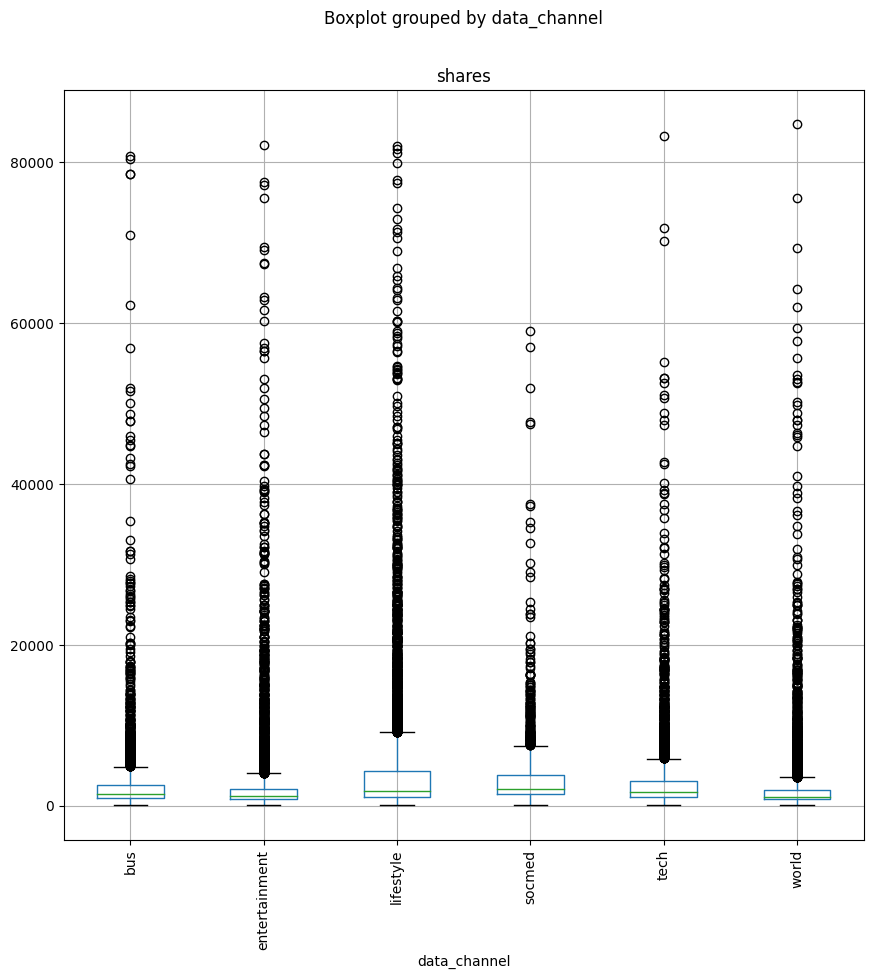

In [93]:
df_dev.boxplot(column = 'shares', by = 'data_channel', rot= 90, figsize = (10,10))

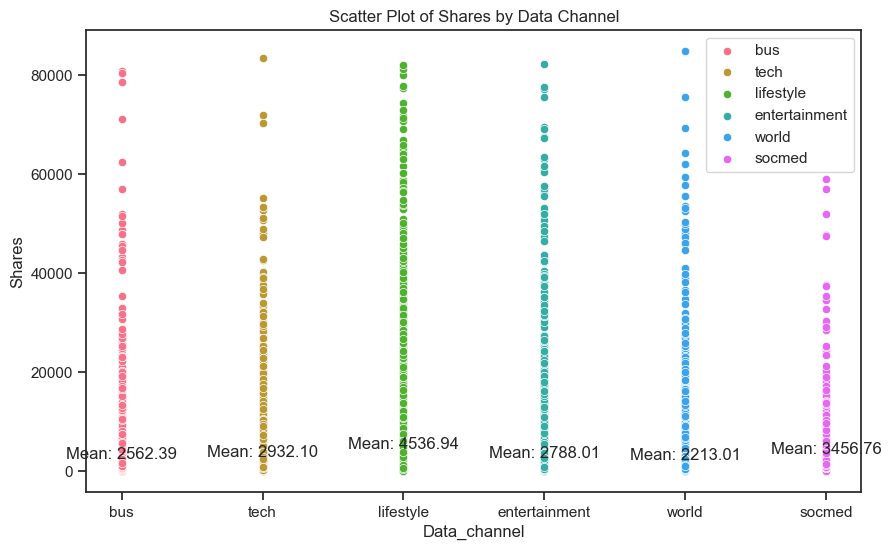

In [94]:
df = df_dev
# Calculate the mean daily_shares for each category
mean_values = df.groupby('data_channel')['shares'].mean()

# Create a scatter plot for each category
sns.set(style="ticks")
sns.set_palette("husl")

# Iterate over unique categories in the categorical column
categories = df['data_channel'].unique()
for category in categories:
    # Filter the data for the current category
    data_category = df[df['data_channel'] == category]

    # Create the scatter plot
    sns.scatterplot(data=data_category, x='data_channel', y='shares', label=category)

    # Get the mean value for the current category
    mean_value = mean_values[category]

    # Display the mean value
    plt.text(category, mean_value, f"Mean: {mean_value:.2f}", ha='center')

# Set plot labels and title
plt.xlabel('Data_channel')
plt.ylabel('Shares')
plt.title('Scatter Plot of Shares by Data Channel')

# Show the plot
plt.legend()
plt.show()


### 2.10 kw_min_max_avg

Feature importance from Random Forest are:
* 1 - kw_avg_avg
* 3 - kw_max_avg
* 9 - kw_avg_min
* 18 - kw_avg_max
* 19 - kw_max_min
* 28 - kw_min_max
* 29 - kw_min_avg
* 48 - kw_max_max
* 66 - kw_min_min

#### 2.10.1 kw_min

<Axes: >

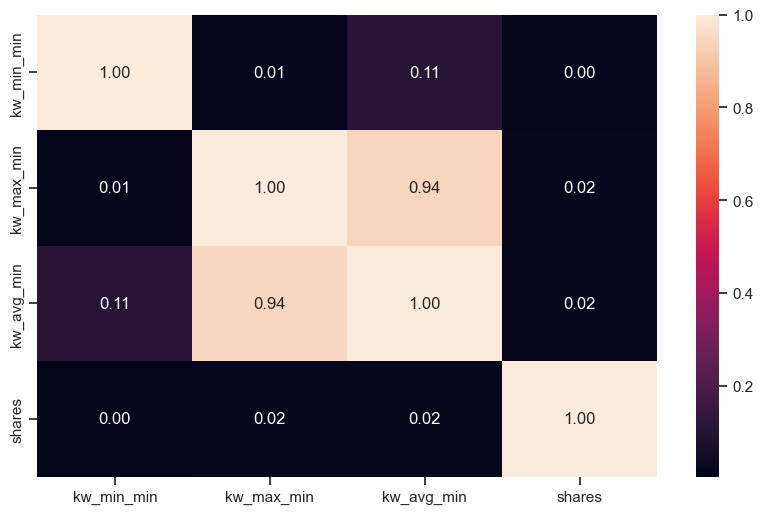

In [96]:
df = df_dev[['kw_min_min','kw_max_min', 'kw_avg_min', 'shares']]
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

Strong correlation between kw_avg_min and kw_max_min possibly because:
* the maximum shares of the least important keyword is important and this also moves the average in the same direction

I take kw_max_min

#### 2.10.2 kw_max

<Axes: >

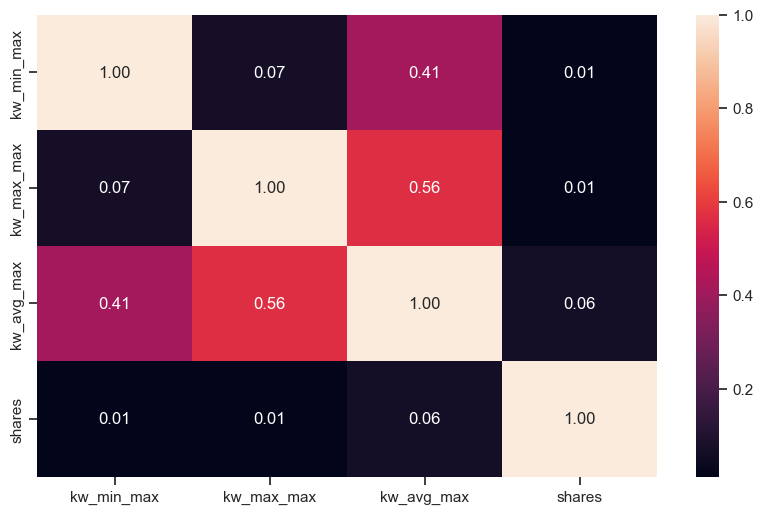

In [97]:
df = df_dev[['kw_min_max','kw_max_max', 'kw_avg_max', 'shares']]
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

kw_avg_max is strongly correlated to kw_min_max and kw_max_max and is also the most correlated to the target, I take only kw_avg_max

#### 2.10.3 kw_avg

<Axes: >

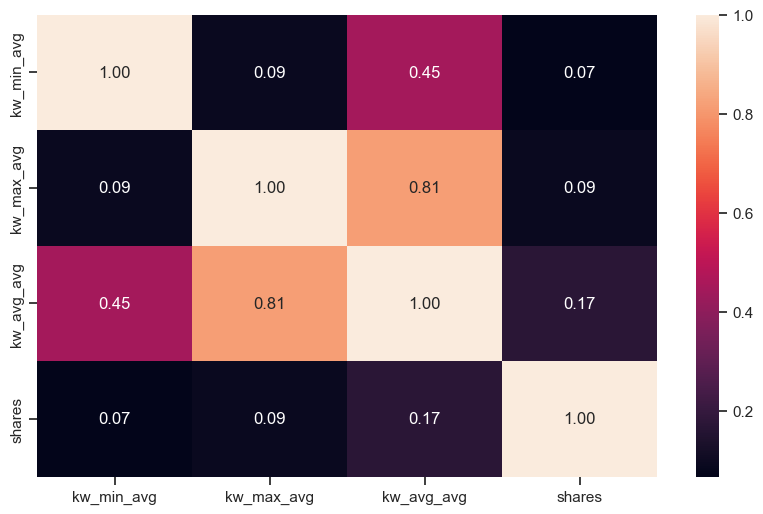

In [98]:
df = df_dev[['kw_min_avg','kw_max_avg', 'kw_avg_avg', 'shares']]
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

Strong correlation between kw_avg_avg and kw_max_avg possibly because:
* the maximum shares of the avg important keyword is important and this also moves the average in the same direction

 I take kw_avg_avg from all this also because more correlated to the target and also very important

#### 2.10.4 kw_avg_min_max_avg
I compare the avg for worst, best and average keyword 

<Axes: >

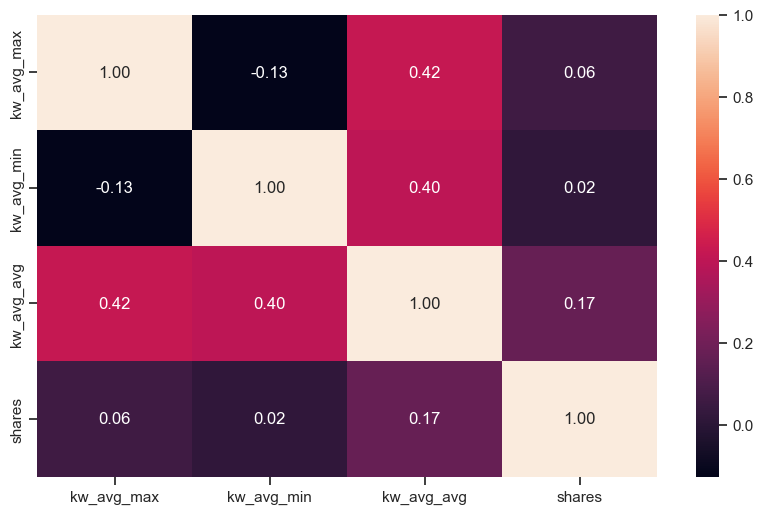

In [99]:
df = df_dev[['kw_avg_max','kw_avg_min', 'kw_avg_avg', 'shares']]
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

There is a bit of correlation between the means of best, worst and average keyword.

I'm going to kw_avg of the average keyword because it's the most correlated to shares (target)

### 2.11 self_reference_min_max_avg_shares

Feature importance from Random Forest are:
* 5 - self_reference_avg_shares
* 7 - self_reference_max_shares
* 8 - self_reference_min_shares

In [100]:
df = df_dev[['self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'shares']]
df.describe()

self_reference_min_shares  self_reference_max_shares  \
count               31652.000000               31652.000000   
mean                 3991.550301               10242.379811   
std                 19776.989687               40582.975830   
min                     0.000000                   0.000000   
25%                   640.000000                1100.000000   
50%                  1200.000000                2800.000000   
75%                  2600.000000                7900.000000   
max                843300.000000              843300.000000   

       self_reference_avg_sharess        shares  
count                31652.000000  31652.000000  
mean                  6397.994190   3056.409990  
std                  24378.113755   5628.792909  
min                      0.000000      4.000000  
25%                    980.000000    946.000000  
50%                   2200.000000   1400.000000  
75%                   5144.500000   2800.000000  
max                 843300.000000  84800.000000

<Axes: >

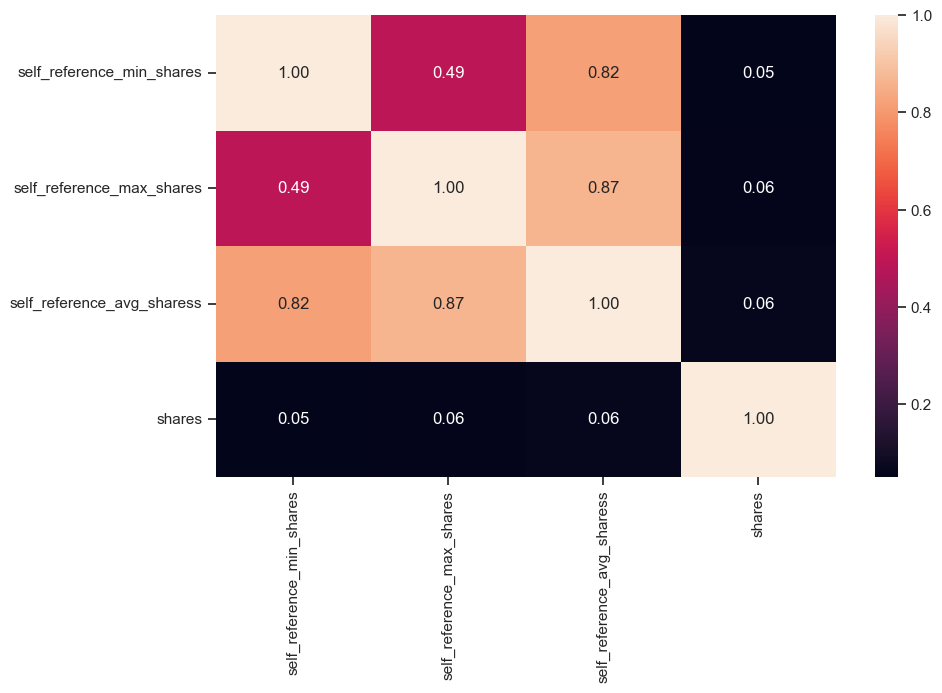

In [101]:
df = df_dev[['self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'shares']]
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

The avg self reference is the most correlated to the others so it represents the best all this values, I'm going to take self_reference_avg_sharess also because of bigger feature importance

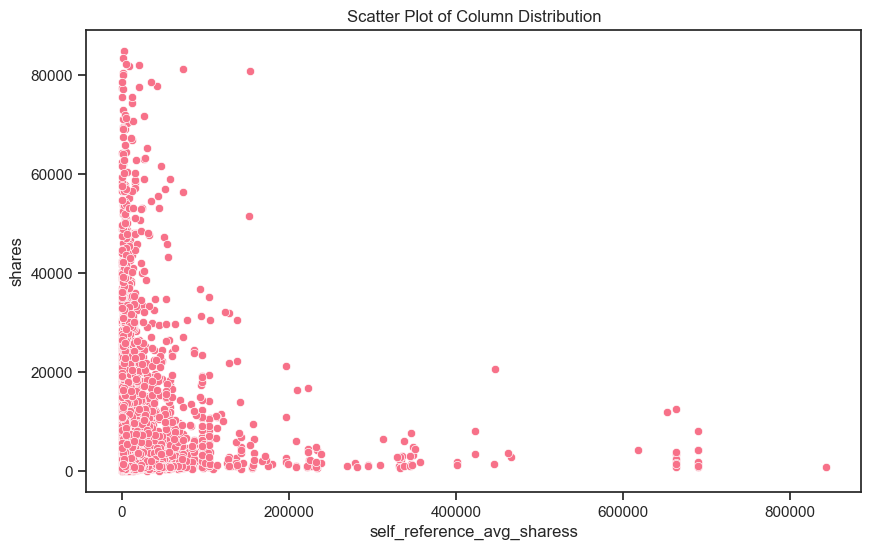

In [103]:
plot_scatter_plot(df_dev, 'self_reference_avg_sharess', 'shares')

In [104]:
df[df['self_reference_avg_sharess'] == 0].count()

self_reference_min_shares     5725
self_reference_max_shares     5725
self_reference_avg_sharess    5725
shares                        5725
dtype: int64

In [105]:
df_dev[df_dev['self_reference_avg_sharess'] == 0].head()

id                                                url  timedelta  \
1    1   http://mashable.com/2013/07/25/3d-printed-rifle/      532.0   
17  17  http://mashable.com/2013/06/07/samsung-galaxy-...      580.0   
24  24  http://mashable.com/2014/07/14/ebola-west-afri...      178.0   
25  25  http://mashable.com/2013/07/15/classy-goat-video/      542.0   
32  32  http://mashable.com/2014/09/12/u2-album-itunes...      116.0   

    n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
1              9.0             503.0         0.569697               1.0   
17            11.0             126.0         0.619835               1.0   
24            13.0               0.0         0.000000               0.0   
25            12.0             571.0         0.594356               1.0   
32            10.0             200.0         0.587940               1.0   

    n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
1                   0.737542        9.0             0.0       1.0         0.0   
17                  0.705882        5.0             1.0       1.0         0.0   
24                  0.000000        0.0             0.0       0.0         0.0   
25                  0.770308        8.0             0.0       1.0         0.0   
32                  0.737705        4.0             0.0       2.0         0.0   

    average_token_length  num_keywords  kw_min_min  kw_max_min  kw_avg_min  \
1               4.576541          10.0         4.0      3200.0  524.750000   
17              4.388889           7.0         4.0      1600.0  518.714286   
24              0.000000           8.0        -1.0      1100.0  237.798571   
25              4.697023          10.0         4.0      1200.0  385.500000   
32              4.835000           7.0        -1.0        49.0    9.000000   

    kw_min_max  kw_max_max     kw_avg_max  kw_min_avg   kw_max_avg  \
1          0.0    843300.0  117960.000000         0.0  4228.114286   
17      1600.0    690400.0  157285.714286      1600.0  3306.680774   
24         0.0    843300.0  368483.375000         0.0  7216.345907   
25         0.0    843300.0   99280.000000         0.0  5839.066667   
32         0.0    843300.0  343757.142857         0.0  5941.822529   

     kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
1   2387.526307                        0.0                        0.0   
17  2641.423220                        0.0                        0.0   
24  3198.828436                        0.0                        0.0   
25  1896.617346                        0.0                        0.0   
32  3502.933944                        0.0                        0.0   

    self_reference_avg_sharess    LDA_00    LDA_01    LDA_02    LDA_03  \
1                          0.0  0.020007  0.020008  0.325602  0.020004   
17                         0.0  0.028575  0.028646  0.168319  0.028574   
24                         0.0  0.025004  0.025537  0.147062  0.777396   
25                         0.0  0.133297  0.020274  0.020005  0.020334   
32                         0.0  0.028575  0.029072  0.171625  0.742152   

      LDA_04  global_subjectivity  global_sentiment_polarity  \
1   0.614379             0.477791                   0.123520   
17  0.745885             0.340741                   0.087037   
24  0.025002             0.000000                   0.000000   
25  0.806090             0.517579                   0.140749   
32  0.028577             0.300000                  -0.172222   

    global_rate_positive_words  global_rate_negative_words  \
1                     0.033797                    0.019881   
17                    0.039683                    0.015873   
24                    0.000000                    0.000000   
25                    0.052539                    0.029772   
32                    0.000000                    0.020000   

    rate_positive_words  rate_negative_words  avg_positive_polarity  \
1              0.629630       

In [106]:
df_dev.describe()

id     timedelta  n_tokens_title  n_tokens_content  \
count  31652.000000  31652.000000    31652.000000      31652.000000   
mean   15858.643972    354.009383       10.390149        544.078636   
std     9155.801138    214.400259        2.115560        467.261130   
min        0.000000      8.000000        2.000000          0.000000   
25%     7927.750000    163.000000        9.000000        247.000000   
50%    15860.500000    338.000000       10.000000        409.000000   
75%    23787.250000    542.250000       12.000000        713.250000   
max    31714.000000    731.000000       23.000000       8474.000000   

       n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  \
count     31652.000000      31652.000000              31652.000000   
mean          0.530723          0.970176                  0.672988   
std           0.137034          0.170105                  0.154053   
min           0.000000          0.000000                  0.000000   
25%           0.471229          1.000000                  0.626033   
50%           0.539541          1.000000                  0.690808   
75%           0.608341          1.000000                  0.754630   
max           1.000000          1.000000                  1.000000   

          num_hrefs  num_self_hrefs      num_imgs    num_videos  \
count  31652.000000    31652.000000  31652.000000  31652.000000   
mean      10.857418        3.274232      3.985688      0.805668   
std       11.284261        3.819725      7.626623      3.451308   
min        0.000000        0.000000      0.000000      0.000000   
25%        4.000000        1.000000      1.000000      0.000000   
50%        7.000000        3.000000      1.000000      0.000000   
75%       14.000000        4.000000      3.000000      0.000000   
max      304.000000      116.000000    128.000000     91.000000   

       average_token_length  num_keywords    kw_min_min     kw_max_min  \
count          31652.000000  25345.000000  31652.000000   31652.000000   
mean               4.547211      7.219333     26.124100    1145.332388   
std                0.844590      1.904852     69.643724    3949.384036   
min                0.000000      1.000000     -1.000000       0.000000   
25%                4.477965      6.000000     -1.000000     445.000000   
50%                4.664302      7.000000     -1.000000     659.000000   
75%                4.853441      9.000000      4.000000    1000.000000   
max                8.041534     10.000000    294.000000  298400.000000   

         kw_avg_min     kw_min_max     kw_max_max     kw_avg_max  \
count  31652.000000   31652.000000   31652.000000   31652.000000   
mean     310.489834   13542.998357  752061.926577  259139.851040   
std      621.640019   57821.635264  214913.834457  135179.206447   
min       -1.000000       0.000000       0.000000       0.000000   
25%      141.741071       0.000000  843300.000000  172656.875000   
50%      235.816667    1400.000000  843300.000000  244427.523809   
75%      357.000000    7800.000000  843300.000000  331090.625000   
max    42827.857143  843300.000000  843300.000000  843300.000000   

         kw_min_avg     kw_max_avg    kw_avg_avg  self_reference_min_shares  \
count  31652.000000   31652.000000  31652.000000               31652.000000   
mean    1115.125906    5639.599643   3129.226596                3991.550301   
std     1136.200667    6168.428333   1327.589204               19776.989687   
min       -1.000000       0.000000      0.000000                   0.000000   
25%        0.000000    3557.132375   2377.369029                 640.000000   
50%     1020.750000    4341.912281   2865.968880                1200.000000   
75%     2054.988930    6013.932621   3592.363994                2600.000000   
max     3610.124972  298400.000000  43567.659946              843300.000000   

       self_reference_max_shares  self_reference_avg_sharess        LDA_00  \
count               31652.000000                31652.000000  31652.0000

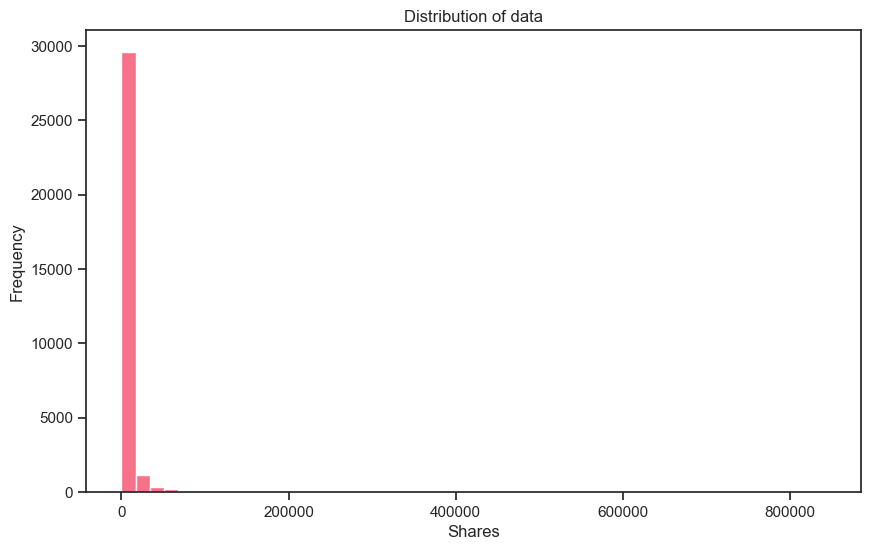

In [107]:
data = df_dev['self_reference_avg_sharess']
plt.hist(data, bins=50)
plt.title("Distribution of data")
plt.xlabel("Shares")
plt.ylabel("Frequency")
plt.show()

All three feature columns have the same 18% of 0's (4785 datapoints)

This potentially could be imputed in order to fill this because it's not possible that they are zeros because this column contains the avg shares done by the linked pages of Mashable. 

A possible strategy for imputation is substituting with the avg of the column or maybe the avg of shares

### 2.12 weekday

Feature importance from Random Forest are:
* 46 - monday
* 47 - wednesday
* 53 - tuesday
* 58 - friday
* 59 - thursday
* 65 - saturday
* 67 - sunday

They seem definitely not important

In [108]:
df = df_dev[['weekday','shares']]
# Calculate the distribution, min, max, and mean of daily_shares for each category
category_stats = df.groupby('weekday')['shares'].agg(['count', 'min', 'max', 'mean'])

# Print the statistics and correlations
print("Weekday Statistics:")
print(category_stats)

Weekday Statistics:
           count  min    max         mean
weekday                                  
friday      4605   22  82200  2999.938328
monday      5298    4  81700  3102.445640
saturday    1977   43  75500  3727.943349
sunday      2188   89  83300  3717.264168
thursday    5817    5  80800  2916.397628
tuesday     5860   42  84800  2913.804608
wednesday   5907   23  79900  2868.955138


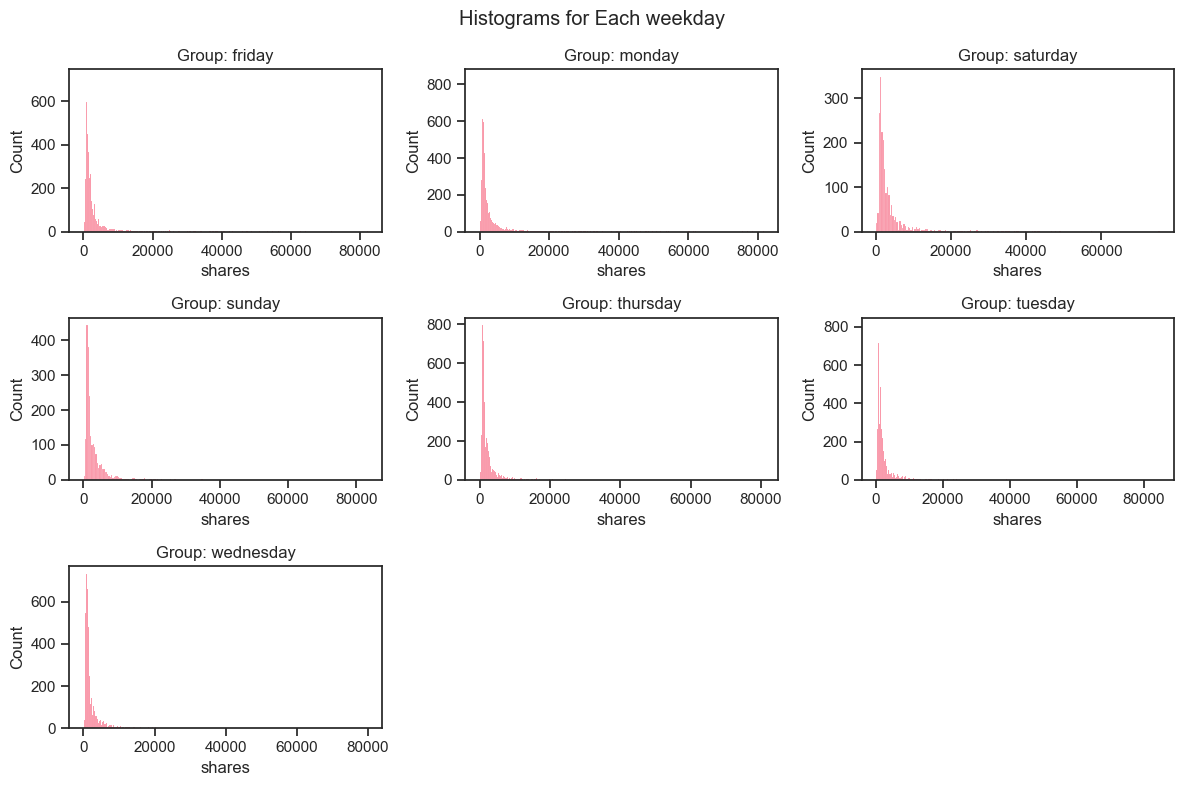

In [109]:
category_stats = df_dev.groupby('weekday')

num_groups = len(category_stats)
num_cols = 3  # Adjust the number of columns as per your preference
num_rows = (num_groups - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Histograms for Each weekday')

for (group_name, group_data), ax in zip(category_stats, axes.flatten()):
    sns.histplot(data=group_data, x='shares', ax=ax)
    ax.set_title(f'Group: {group_name}')

# Hide empty subplots if the number of groups is not divisible by the number of columns
if num_groups % num_cols != 0:
    empty_subplots = num_cols - num_groups % num_cols
    for i in range(-empty_subplots, 0):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

They all seem to have skewed distribution

Text(0.5, 1.0, 'Shares without outliers')

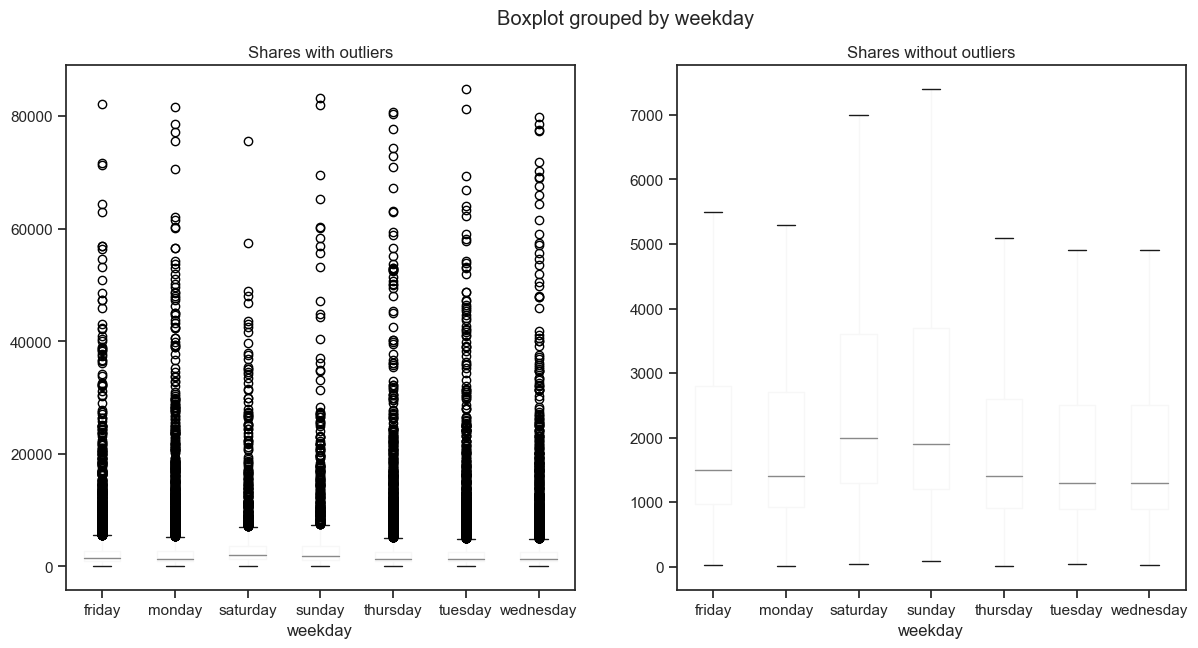

In [110]:
fig, [out, no_out] = plt.subplots(1,2, figsize= (14,7))
plt.tight_layout()

df_dev.boxplot(column = 'shares', by = 'weekday', showfliers = True, grid = False, ax = out)
out.set_title('Shares with outliers')


df_dev.boxplot(column = 'shares', by = 'weekday', showfliers = False, grid = False, ax = no_out)
no_out.set_title('Shares without outliers')


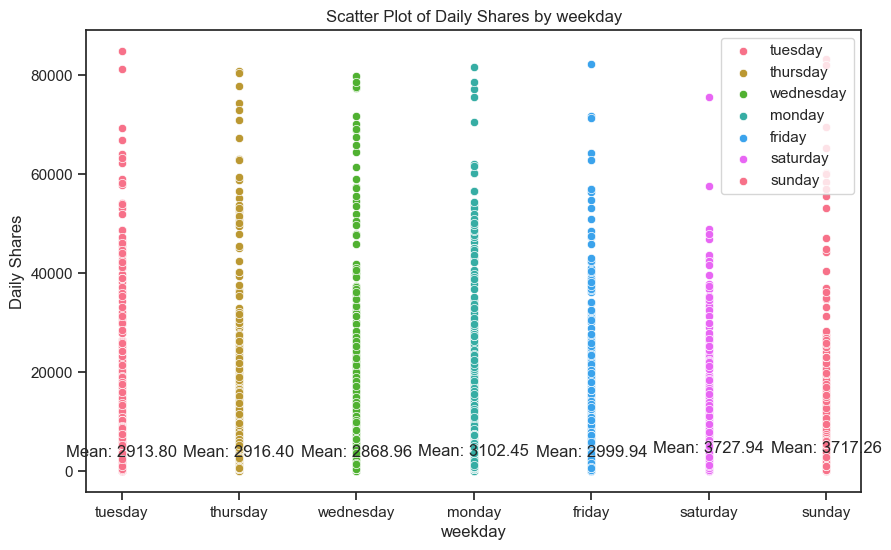

In [111]:
# Calculate the mean daily_shares for each category
mean_values = df.groupby('weekday')['shares'].mean()

# Create a scatter plot for each category
sns.set(style="ticks")
sns.set_palette("husl")

# Iterate over unique categories in the categorical column
categories = df['weekday'].unique()
for category in categories:
    # Filter the data for the current category
    data_category = df[df['weekday'] == category]

    # Create the scatter plot
    sns.scatterplot(data=data_category, x='weekday', y='shares', label=category)

    # Get the mean value for the current category
    mean_value = mean_values[category]

    # Display the mean value
    plt.text(category, mean_value, f"Mean: {mean_value:.2f}", ha='center')

# Set plot labels and title
plt.xlabel('weekday')
plt.ylabel('Daily Shares')
plt.title('Scatter Plot of Daily Shares by weekday')

# Show the plot
plt.legend()
plt.show()


Saturday and sunday have a slighlty higher mean

I take the weekday as a feature for the next phase

### 2.13 LDA_XX

Feature importance from Random Forest are:
* 4 - LDA_00
* 10 - LDA_03
* 11 - LDA_04
* 12 - LDA_01
* 24 - LDA_02

In [112]:
df = df_dev[['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'shares']]
df.describe()

LDA_00        LDA_01        LDA_02        LDA_03        LDA_04  \
count  31652.000000  31652.000000  31652.000000  31652.000000  31652.000000   
mean       0.184337      0.142487      0.216291      0.222546      0.234339   
std        0.262809      0.221342      0.282154      0.294547      0.289160   
min        0.018183      0.018182      0.018182      0.018182      0.018182   
25%        0.025059      0.025014      0.028571      0.026566      0.028574   
50%        0.033388      0.033346      0.040004      0.040001      0.041134   
75%        0.240394      0.151326      0.333601      0.367048      0.401438   
max        0.926994      0.925947      0.919999      0.926534      0.927191   

             shares  
count  31652.000000  
mean    3056.409990  
std     5628.792909  
min        4.000000  
25%      946.000000  
50%     1400.000000  
75%     2800.000000  
max    84800.000000

<Axes: >

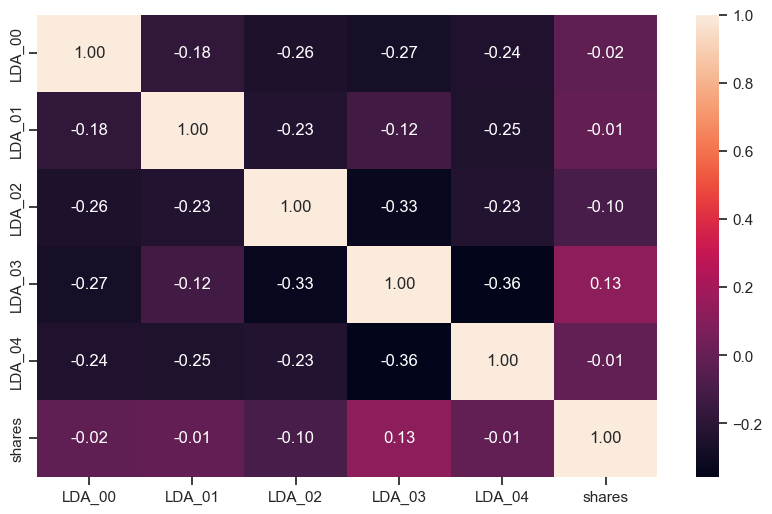

In [113]:
df = df_dev[['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'shares']]
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

Being coordinates in a space they can be aggregaated into one single column using PCA

### 2.14 subjectivity and polarity

Feature importance from Random Forest are:
* 16 - title_subjectivity
* 26 - global subjectivty
* 37 - abs_title_subjectivity
---------------------------------
* 21 - title_sentiment_polarity
* 40 - abs_title_sentiment_polarity

Global_subjectivity has 949 zeros and remember that n_non_stop_unique_tokens 947, are they the same and why?

In [114]:
mask = df_dev['global_subjectivity'] == 0
tmp = df_dev[mask]
tmp = df_dev[df_dev['n_non_stop_unique_tokens'] == 0]
tmp.head()

id                                                url  timedelta  \
24    24  http://mashable.com/2014/07/14/ebola-west-afri...      178.0   
51    51      http://mashable.com/2014/11/20/frozen-coding/       48.0   
66    66  http://mashable.com/2014/12/07/guantanamo-bay-...       30.0   
82    82  http://mashable.com/2014/07/20/braff-del-toro-...      172.0   
179  179  http://mashable.com/2014/07/20/homemade-body-s...      171.0   

     n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
24             13.0               0.0              0.0               0.0   
51             13.0               0.0              0.0               0.0   
66             11.0               0.0              0.0               0.0   
82             12.0               0.0              0.0               0.0   
179            13.0               0.0              0.0               0.0   

     n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
24                        0.0        0.0             0.0       0.0   
51                        0.0        0.0             0.0       1.0   
66                        0.0        0.0             0.0       0.0   
82                        0.0        0.0             0.0      11.0   
179                       0.0        0.0             0.0      17.0   

     num_videos  average_token_length  num_keywords  kw_min_min  kw_max_min  \
24          0.0                   0.0           8.0        -1.0      1100.0   
51          1.0                   0.0           6.0        -1.0       451.0   
66          1.0                   0.0           5.0        -1.0       426.0   
82          0.0                   0.0           5.0        -1.0       191.0   
179         0.0                   0.0           NaN        -1.0      3700.0   

     kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg  \
24   237.798571         0.0    843300.0  368483.375000     0.000000   
51   145.931667    110200.0    843300.0  599116.666667  3411.935940   
66    84.918000    211600.0    843300.0  716960.000000  3401.817194   
82    68.500000         0.0    843300.0  371840.000000     0.000000   
179  521.222222      3700.0    843300.0  308022.222222  2177.469530   

      kw_max_avg   kw_avg_avg  self_reference_min_shares  \
24   7216.345907  3198.828436                        0.0   
51   6833.161421  5380.064740                        0.0   
66   6974.664605  5662.213361                        0.0   
82   6011.274920  3108.906535                        0.0   
179  7798.444142  4152.345048                        0.0   

     self_reference_max_shares  self_reference_avg_sharess    LDA_00  \
24                         0.0                         0.0  0.025004   
51                         0.0                         0.0  0.033334   
66                         0.0                         0.0  0.040000   
82                         0.0                         0.0  0.040000   
179                        0.0                         0.0  0.022236   

       LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  \
24   0.025537  0.147062  0.777396  0.025002                  0.0   
51   0.033347  0.033333  0.865066  0.034920                  0.0   
66   0.040021  0.040000  0.839979  0.040000                  0.0   
82   0.690183  0.040000  0.189817  0.040000                  0.0   
179  0.022231  0.410443  0.522852  0.022239                  0.0   

     global_sentiment_polarity  global_rate_positive_words  \
24                         0.0                         0.0   
51                         0.0                         0.0   
66                         0.0                         0.0   
82                         0.0                         0.0   
179                        0.0                         0.0   

     global_rate_negative_words  rate_positive_words  rate_negative_words  \
24                          0.0                  0.0                  0.0   
51                          0.0                  0.

In [115]:
tmp['shares'].describe()

count      944.000000
mean      4055.836864
std       7099.832693
min          4.000000
25%       1000.000000
50%       1600.000000
75%       3800.000000
max      77400.000000
Name: shares, dtype: float64

Seems that if eliminated this could not create too much harm so I will procede in doing that

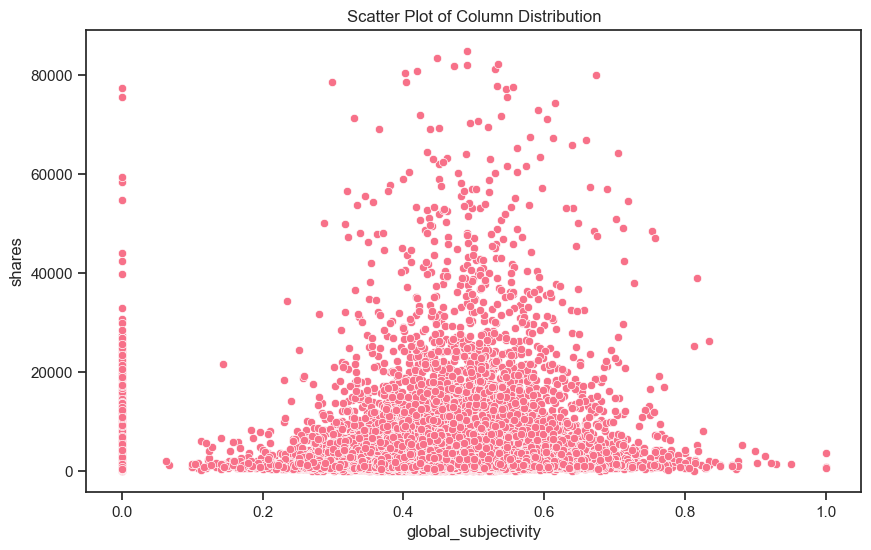

In [116]:
plot_scatter_plot(df_dev, 'global_subjectivity', 'shares')

In [117]:
x = df_dev[['global_subjectivity', 'shares']].corr()
print(f'The correlation between global_subjectivity and shares is {x}')

The correlation between global_subjectivity and shares is                      global_subjectivity    shares
global_subjectivity             1.000000  0.055032
shares                          0.055032  1.000000


<Axes: >

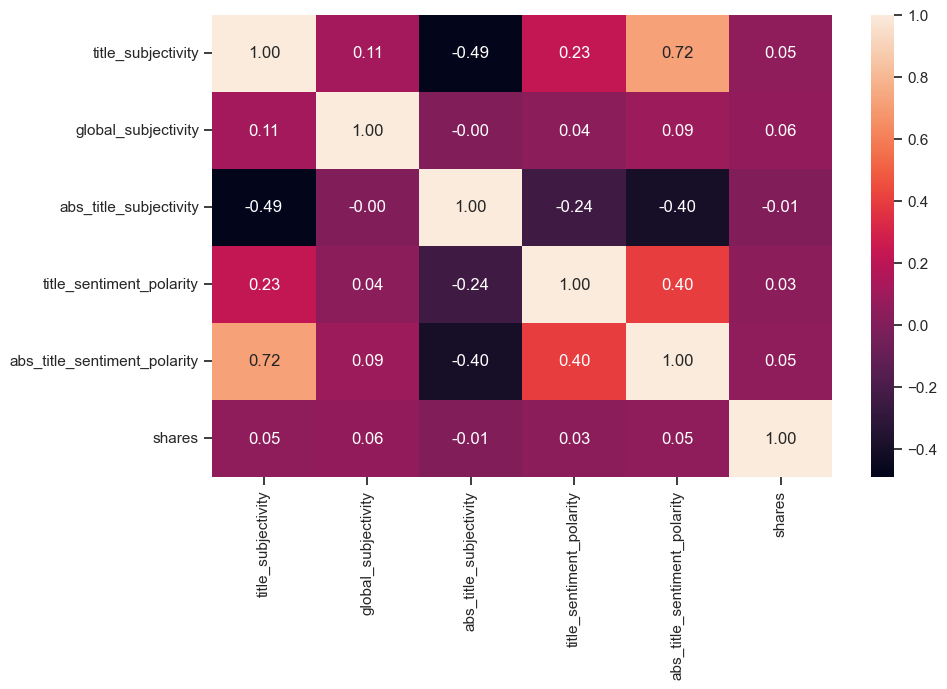

In [121]:
df = df_dev[['title_subjectivity','global_subjectivity','abs_title_subjectivity', 'title_sentiment_polarity','abs_title_sentiment_polarity', 'shares']]
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

I keep title global subjectivity, title_subjectivity, title_sentiment_polarity

### 2.15 global_sentiment_polarity

Feature importance from Random Forest are:
* 30 - global_sentiment_polarity

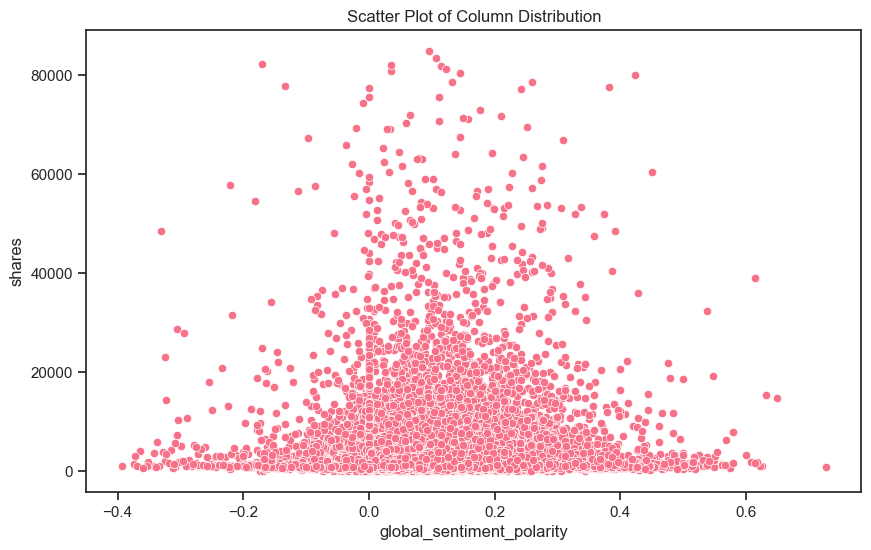

In [122]:
plot_scatter_plot(df_dev, 'global_sentiment_polarity', 'shares')

In [123]:
x = df_dev[['global_sentiment_polarity', 'shares']].corr()
print(f'The correlation between global_subjectivity and shares is {x}')

The correlation between global_subjectivity and shares is                            global_sentiment_polarity    shares
global_sentiment_polarity                   1.000000  0.012109
shares                                      0.012109  1.000000


I'm not going to take it

### 2.16 global_rate_positive/negative_words

Feature importance from Random Forest are:
* 23 - global_rate_positive_words
* 36 - global_rate_negative_words

In [124]:
df_dev[['global_rate_positive_words', 'global_rate_negative_words']]

global_rate_positive_words  global_rate_negative_words
0                        0.041379                    0.008867
1                        0.033797                    0.019881
2                        0.017241                    0.043103
3                        0.011696                    0.029240
4                        0.034965                    0.024476
...                           ...                         ...
31710                    0.013636                    0.011364
31711                    0.000000                    0.000000
31712                    0.055728                    0.019608
31713                    0.043016                    0.014170
31714                    0.057471                    0.011494

[31652 rows x 2 columns]

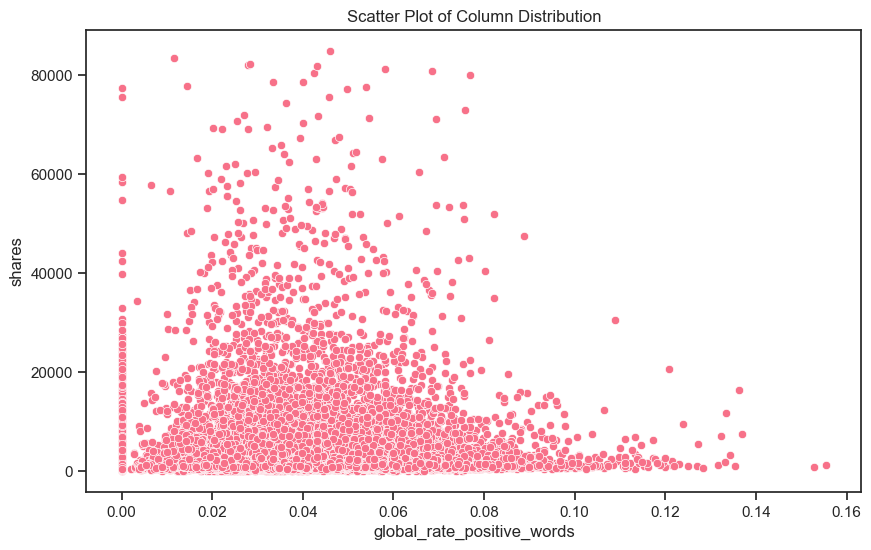

In [125]:
plot_scatter_plot(df_dev, 'global_rate_positive_words', 'shares')

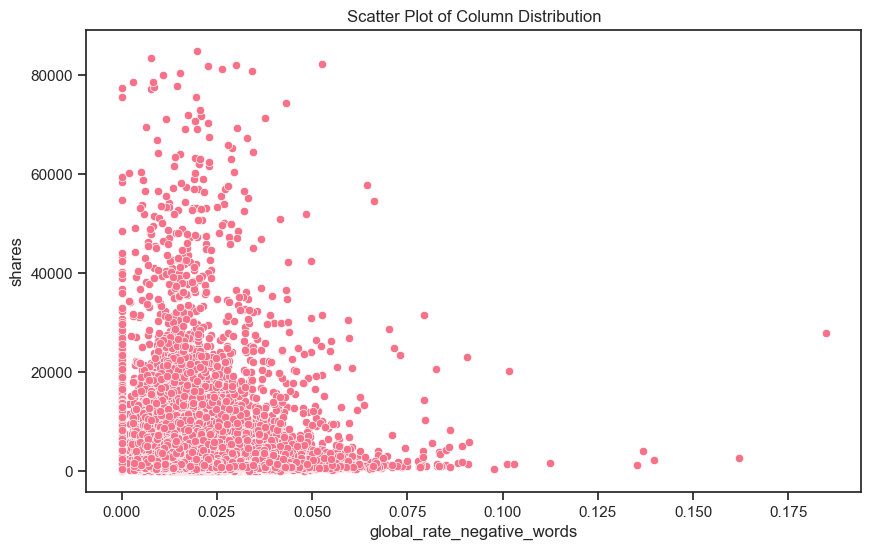

In [126]:
plot_scatter_plot(df_dev, 'global_rate_negative_words', 'shares')

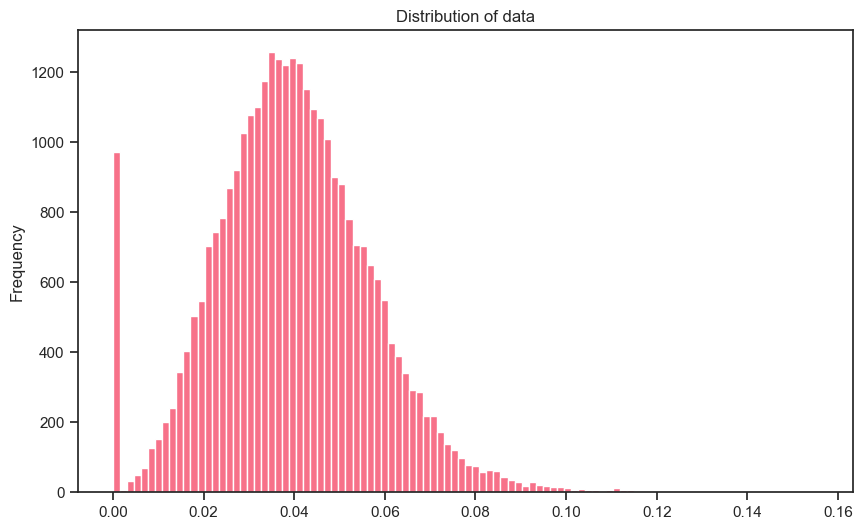

In [127]:
data = df_dev['global_rate_positive_words']
plt.hist(data, bins=100)
plt.title("Distribution of data")
plt.ylabel("Frequency")
plt.show()

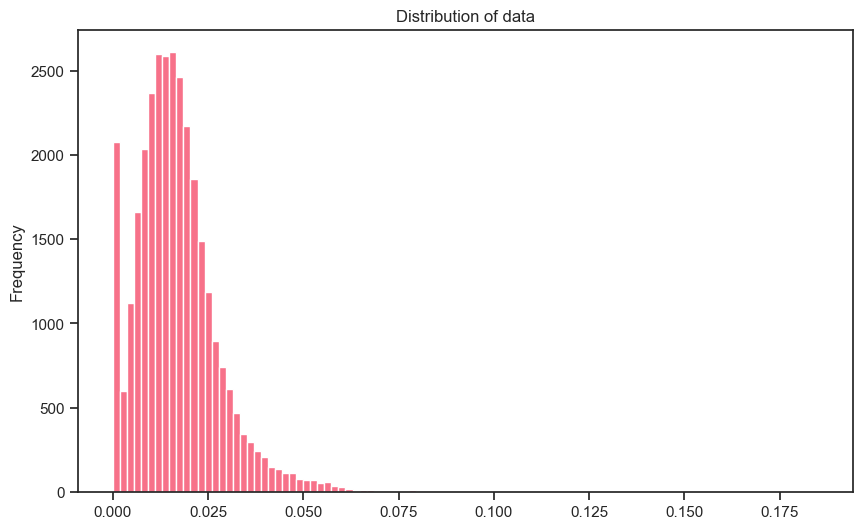

In [128]:
data = df_dev['global_rate_negative_words']
plt.hist(data, bins=100)
plt.title("Distribution of data")
plt.ylabel("Frequency")
plt.show()

Seems very skewed the negative

Study the correlation

<Axes: >

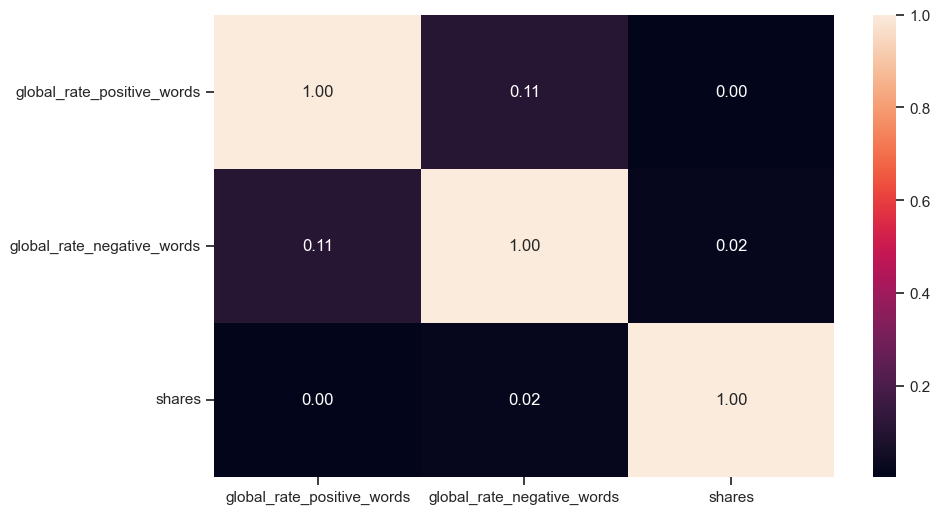

In [129]:
df = df_dev[['global_rate_positive_words', 'global_rate_negative_words', 'shares']]
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

There seems to not be any correlation, I want to try with an engineered column which is the mean of those two and see what happens

In [130]:
df['mean_rate_global_words'] = (df_dev['global_rate_positive_words'] + df_dev['global_rate_negative_words']) / 2
df['product_rate_global_words'] = (df_dev['global_rate_positive_words'] * df_dev['global_rate_negative_words'])

C:\Users\lucas\AppData\Local\Temp\ipykernel_16216\2263080086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_rate_global_words'] = (df_dev['global_rate_positive_words'] + df_dev['global_rate_negative_words']) / 2
C:\Users\lucas\AppData\Local\Temp\ipykernel_16216\2263080086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_rate_global_words'] = (df_dev['global_rate_positive_words'] * df_dev['global_rate_negative_words'])


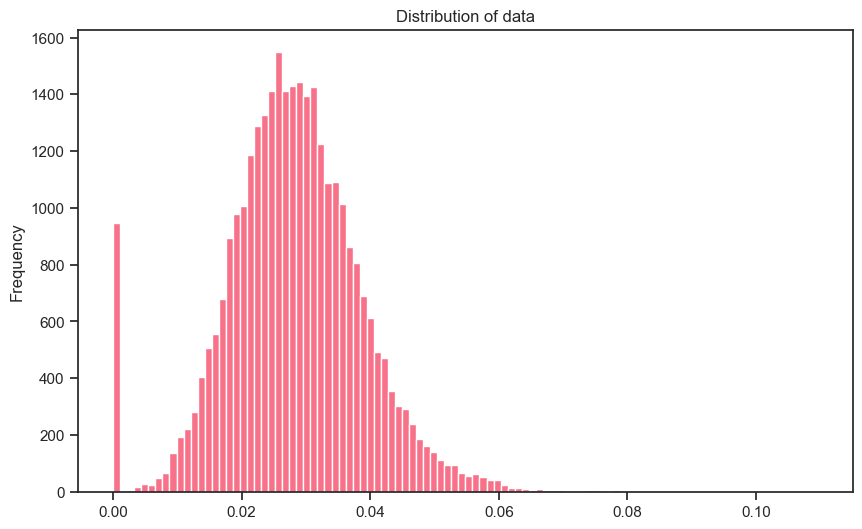

In [131]:
data = df['mean_rate_global_words']
plt.hist(data, bins=100)
plt.title("Distribution of data")
plt.ylabel("Frequency")
plt.show()

<Axes: >

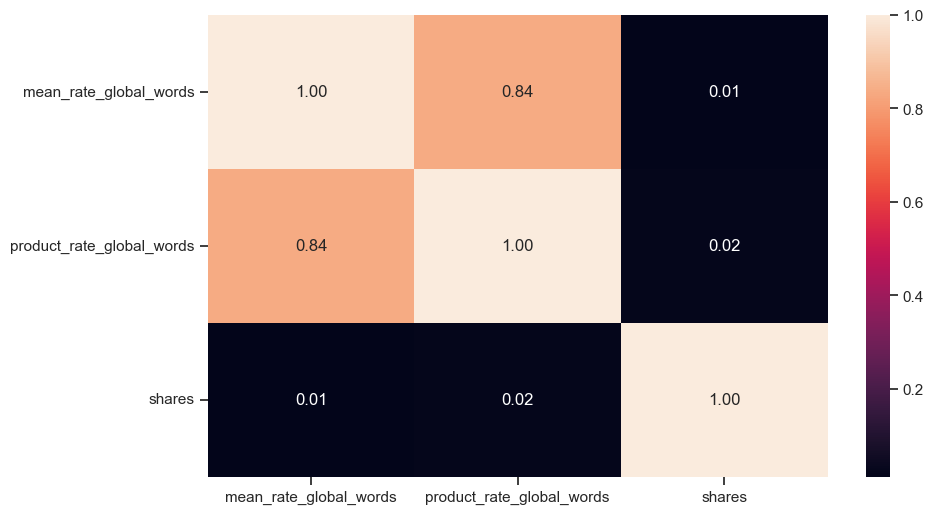

In [132]:
sns.heatmap(df[['mean_rate_global_words', 'product_rate_global_words', 'shares']].corr(), annot = True, fmt = '.2f')

I'm going to take both global_rate_positive_negative_words

### 2.17 rate_positive/negative_words
Rate of positive/negative words among non-neutral tokens.


Feature importance from Random Forest are:
they are both less important then the respective globals so I'm going to see the correlation between them

<Axes: >

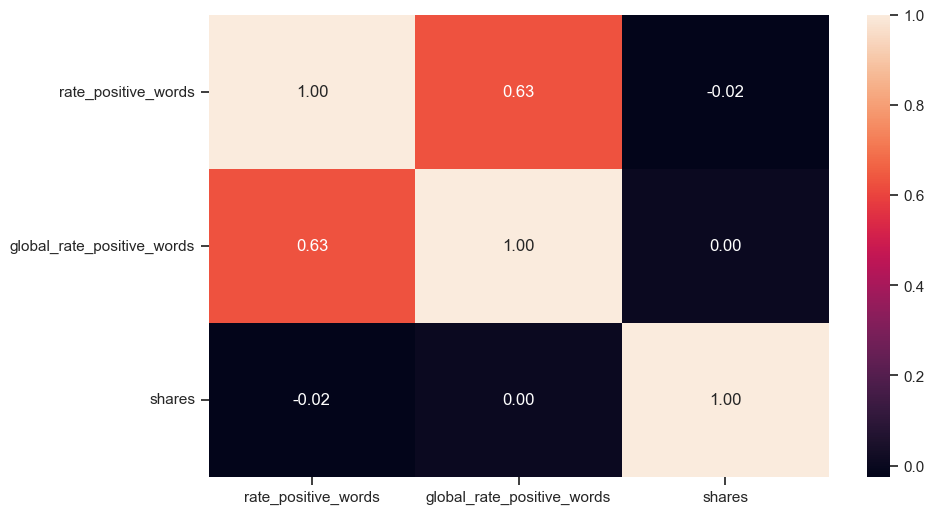

In [133]:
sns.heatmap(df_dev[['rate_positive_words', 'global_rate_positive_words', 'shares']].corr(), annot = True, fmt = '.2f')

<Axes: >

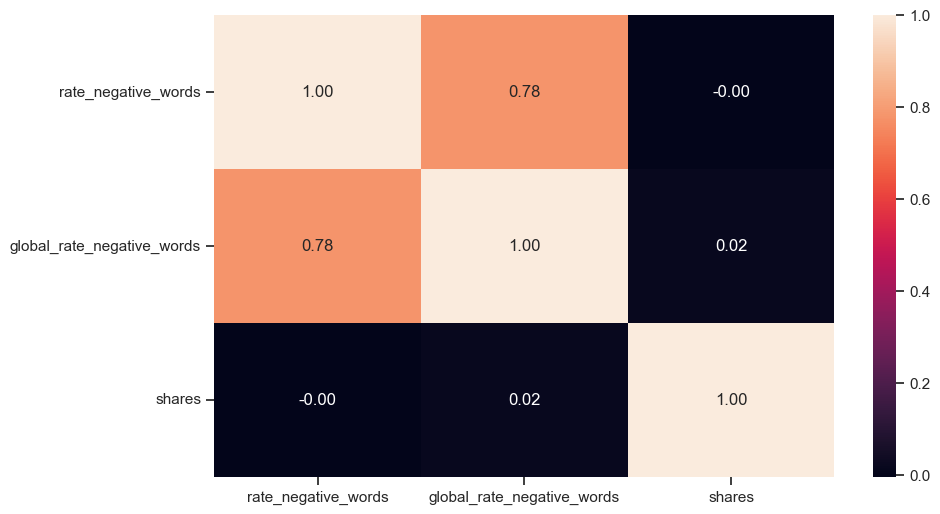

In [134]:
sns.heatmap(df_dev[['rate_negative_words', 'global_rate_negative_words', 'shares']].corr(), annot = True, fmt = '.2f')

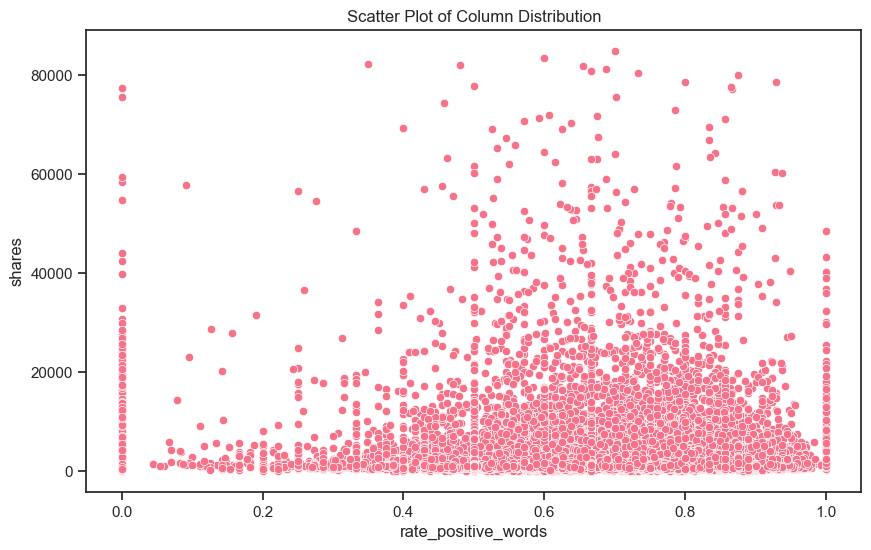

In [135]:
plot_scatter_plot(df_dev, 'rate_positive_words', 'shares')

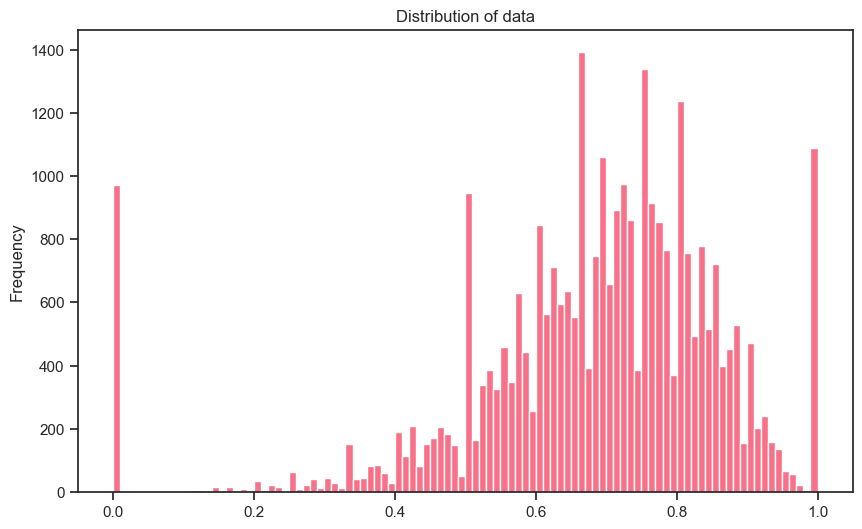

In [136]:
data = df_dev['rate_positive_words']
plt.hist(data, bins=100)
plt.title("Distribution of data")
plt.ylabel("Frequency")
plt.show()

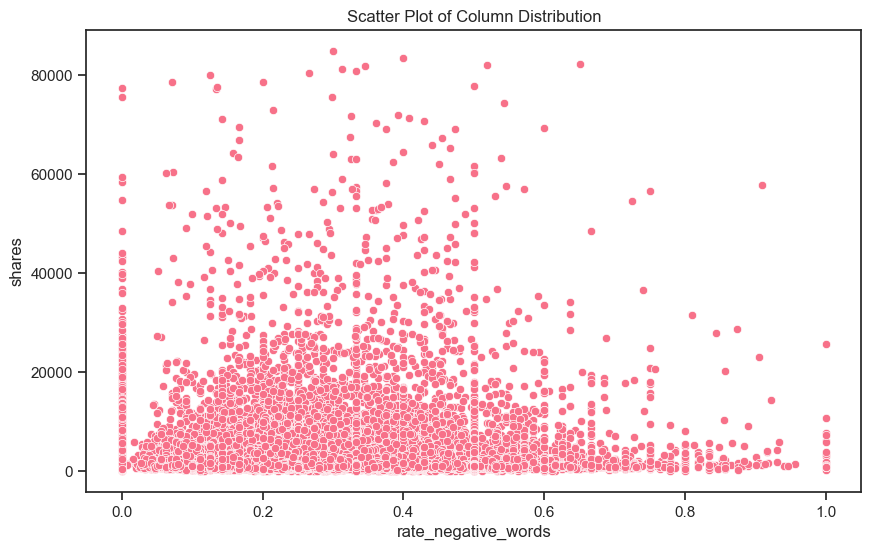

In [137]:
plot_scatter_plot(df_dev, 'rate_negative_words', 'shares')

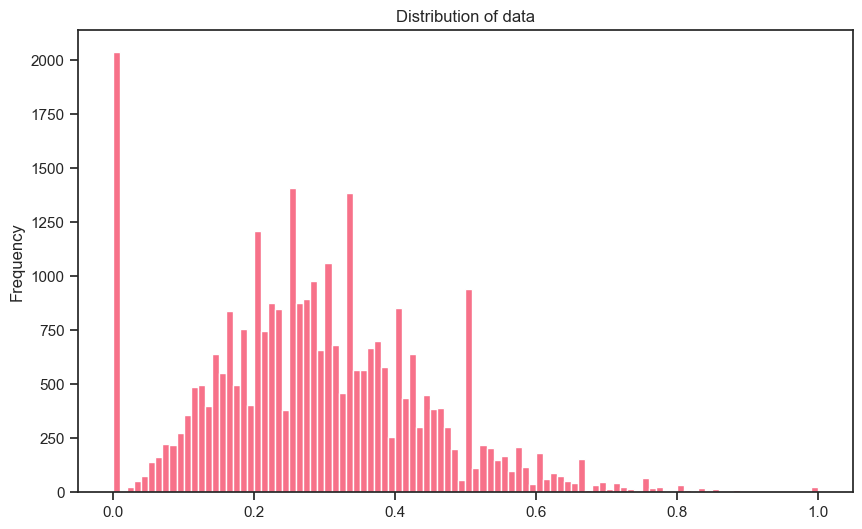

In [138]:
data = df_dev['rate_negative_words']
plt.hist(data, bins=100)
plt.title("Distribution of data")
plt.ylabel("Frequency")
plt.show()

The positive distribution is skewed around 1 and the negative distribution is skewe around 0

In [139]:
df_dev['one_minus_rate_negative_words'] = 1-df_dev['rate_negative_words']
df_dev[['one_minus_rate_negative_words','rate_positive_words','rate_negative_words']].head(100)

one_minus_rate_negative_words  rate_positive_words  rate_negative_words
0                        0.823529             0.823529             0.176471
1                        0.629630             0.629630             0.370370
2                        0.285714             0.285714             0.714286
3                        0.285714             0.285714             0.714286
4                        0.588235             0.588235             0.411765
..                            ...                  ...                  ...
95                       0.727273             0.727273             0.272727
96                       0.300000             0.300000             0.700000
97                       0.727273             0.727273             0.272727
98                       0.650000             0.650000             0.350000
99                       0.533333             0.533333             0.466667

[100 rows x 3 columns]

As supposed seeing the distributions this are complementary columns because they sum up to 1.

I will not use them both currently because I think that this information is already captured by global_rates

### 2.18 avg/min/max_positive_polarity
polarity of positive words

Feature importance from Random Forest are:
* 25 - avg_positive_polarity
* 42 - max_positive_polarity
* 45 - min_positive_polarity

<Axes: >

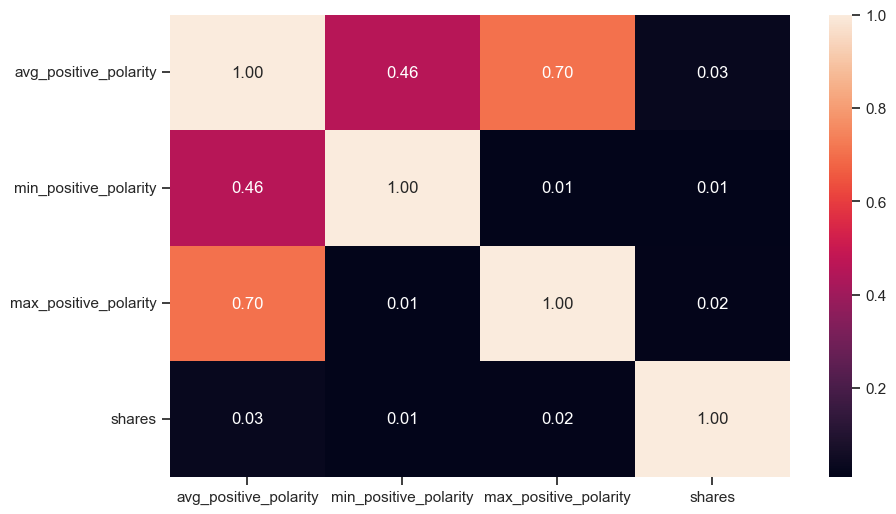

In [140]:
df = df_dev[['avg_positive_polarity','min_positive_polarity', 'max_positive_polarity', 'shares']]
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

I only take avg_positive_polarity because of the correlation to the other features and because the feature importance given by the random regressor is very high and also most correlated to shares

### 2.19  avg/min/max_negative_polarity
polarity of negative words

Feature importance from Random Forest are:
* 22 - avg_negative_polarity
* 27 - min_negative_polarity
* 35 - max_negative_polarity

<Axes: >

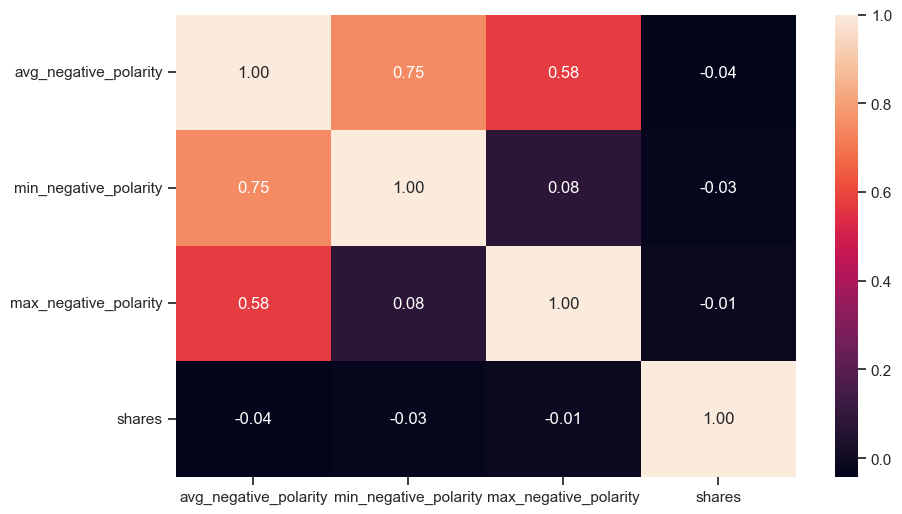

In [141]:
df = df_dev[['avg_negative_polarity','min_negative_polarity', 'max_negative_polarity', 'shares']]
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

I only take avg_negative_polarity because of the correlation to the other features and because the feature importance given by the random regressor is very high and also most correlated to shares

# 3. Pre-processing

In [142]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [158]:
# Read the CSV file
df_dev = pd.read_csv('summer_project_dataset/transformed_development.csv')
df_eval = pd.read_csv('summer_project_dataset/transformed_evaluation.csv')

In [159]:
col_to_take = ['id',
               #'url',
               'timedelta',
               #'n_tokens_title',
               'n_tokens_content',
                #'n_unique_tokens',
                #'n_non_stop_words',
                #'n_non_stop_unique_tokens',
                'num_hrefs',
                #'num_self_hrefs',
                'num_imgs',
                'num_videos',
                'average_token_length',
                #'num_keywords',
                #'kw_min_min',
                'kw_max_min',
                #'kw_avg_min',
                #'kw_min_max',
                #'kw_max_max',
                'kw_avg_max',
                #'kw_min_avg',
                #'kw_max_avg',
                'kw_avg_avg',
                #'self_reference_min_shares',
                #'self_reference_max_shares',
                'self_reference_avg_sharess',
                'LDA_00',
                'LDA_01', 
                'LDA_02', 
                'LDA_03', 
                'LDA_04', 
                'global_subjectivity',
                #'global_sentiment_polarity', 
                'global_rate_positive_words',
                'global_rate_negative_words',
                #'rate_positive_words',
                #'rate_negative_words',
                'avg_positive_polarity',
                #'min_positive_polarity',
                #'max_positive_polarity', 
                'avg_negative_polarity',
                #'min_negative_polarity', 
                #'max_negative_polarity', 
                'title_subjectivity',
                'title_sentiment_polarity', 
                #'abs_title_subjectivity',
                #'abs_title_sentiment_polarity', 
                'data_channel', 
                'weekday',
                'shares'
               ]

In [160]:
col_to_take_eval = [item for item in col_to_take if item != 'shares']
col_to_take_eval

['id',
 'timedelta',
 'n_tokens_content',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'kw_max_min',
 'kw_avg_max',
 'kw_avg_avg',
 'self_reference_avg_sharess',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'avg_positive_polarity',
 'avg_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'data_channel',
 'weekday']

In [161]:
#Take only the prespecified columns
df_dev = df_dev[col_to_take]
df_eval = df_eval[col_to_take_eval]
(df_dev.shape, df_eval.shape)

((31715, 26), (7917, 25))

### 3.1 Capping of the outliers

In [162]:
# IN CASE YOU WANT TO CUT THEM OF FOR THE PROCEDING ANALYSIS
threshold = 85000
data_points_discarded = df_dev[df_dev['shares']>threshold]['id'].count()
value = df_dev[df_dev['shares']>threshold]['id'].count()/df_dev['id'].count() * 100
df_dev = df_dev[df_dev['shares'] < threshold]
print(f'Percentage of data set discarded by using as threshold {threshold} is: {value}%')
print(f'Number of datapoints discarded by using as threshold {threshold} is: {data_points_discarded}')

Percentage of data set discarded by using as threshold 85000 is: 0.19864417468075046%
Number of datapoints discarded by using as threshold 85000 is: 63


Around 0.2% of dataset has been discarded

### 3.2 Imputations of zero values in some columns

In [163]:
impute_cols = ['average_token_length', 'global_subjectivity']

#This will be imputed using mean strategy
df_dev[impute_cols] = df_dev[impute_cols].replace(0, np.nan)
df_eval[impute_cols] = df_eval[impute_cols].replace(0, np.nan)

# Create a KNNImputer object
imputer = SimpleImputer(strategy='mean')
df_dev[impute_cols] = imputer.fit_transform(df_dev[impute_cols])
df_eval[impute_cols] = imputer.transform(df_eval[impute_cols])

In [164]:
impute_cols = ['n_tokens_content', 'avg_positive_polarity', 'avg_negative_polarity']

#This will be imputed using median strategy
df_dev[impute_cols] = df_dev[impute_cols].replace(0, np.nan)
df_eval[impute_cols] = df_eval[impute_cols].replace(0, np.nan)

# Create a KNNImputer object
imputer = SimpleImputer(strategy='median')
df_dev[impute_cols] = imputer.fit_transform(df_dev[impute_cols])
df_eval[impute_cols] = imputer.transform(df_eval[impute_cols])

# Imputing the values for the 0's in self_reference_avg_sharess with mean of shares
mean = df_dev['shares'].mean()
df_dev['self_reference_avg_sharess'] = df_dev['self_reference_avg_sharess'].replace(0, mean)
df_eval['self_reference_avg_sharess'] = df_eval['self_reference_avg_sharess'].replace(0, mean)

(df_dev.shape, df_eval.shape)

((31652, 26), (7917, 25))

In [165]:
df_dev.drop('id', axis =1, inplace=True)
df_eval.drop('id', axis =1, inplace=True)
(df_dev.shape, df_eval.shape)

((31652, 25), (7917, 24))

### 3.3 Scaling of numerical columns

In [166]:
numerical_columns = df_dev.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['timedelta', 'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'kw_max_min', 'kw_avg_max', 'kw_avg_avg',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_rate_positive_words',
       'global_rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

In [167]:
numerical_columns = ['timedelta', 'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'kw_max_min', 'kw_avg_max', 'kw_avg_avg',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_rate_positive_words',
       'global_rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity']

In [168]:
numerical_columns_eval = [item for item in numerical_columns if item != 'shares']

In [169]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
df_dev[numerical_columns] = scaler.fit_transform(df_dev[numerical_columns])
df_eval[numerical_columns_eval] = scaler.transform(df_eval[numerical_columns_eval])
(df_dev.shape, df_eval.shape)

((31652, 25), (7917, 24))

### 3.4 Encoding of categorical columns

In [170]:
weekday_onehot = pd.get_dummies(df_dev['weekday'])
df_dev = pd.concat((df_dev,weekday_onehot), axis = 1).drop(columns = 'weekday')

weekday_onehot = pd.get_dummies(df_eval['weekday'])
df_eval = pd.concat((df_eval,weekday_onehot), axis = 1).drop(columns = 'weekday')

(df_dev.shape, df_eval.shape)

((31652, 31), (7917, 30))

In [171]:
channel_onehot = pd.get_dummies(df_dev['data_channel'])
df_dev = pd.concat((df_dev,channel_onehot), axis = 1).drop(columns = 'data_channel')

channel_onehot = pd.get_dummies(df_eval['data_channel'])
df_eval = pd.concat((df_eval,channel_onehot), axis = 1).drop(columns = 'data_channel')

(df_dev.shape, df_eval.shape)

((31652, 36), (7917, 35))

### 3.5 Aggregaion with PCA for LDA's

In [172]:
cols_pca = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']
name_pca = 'PC1'

# Select the columns of interest
df = df_dev[cols_pca]

# Calculate the mean for each column
column_means = df.mean()

# Subtract the mean from each column
df = df - column_means
df_eval_pca = df_eval[cols_pca] - column_means



# Fit PCA on your data
pca = PCA(n_components=1)
pca.fit(df)

# Transform the data to the lower-dimensional space
df_reduced = pca.transform(df)
df_eval_reduced = pca.transform(df_eval_pca)

df_dev[name_pca] = df_reduced
df_eval[name_pca] = df_eval_reduced

df_dev.drop(cols_pca, axis = 1, inplace=True)
df_eval.drop(cols_pca, axis = 1, inplace=True)
(df_dev.shape, df_eval.shape)


((31652, 32), (7917, 31))

In [173]:
(df_dev.shape, df_eval.shape)

((31652, 32), (7917, 31))

# 4. Model Selection

In [180]:
#Some models
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #setting squared=False gives the RMSE

from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ARDRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor

#Metric
from sklearn.metrics import mean_squared_error as mse

rs = 42  # Random state for reproducibility

In [181]:
# Create a list of regression models
regression_models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    RandomForestRegressor(),
    KNeighborsRegressor()

]

# Create a list of names corresponding to the regression models
names = [
    'lr',
    'lasso',
    'ridge',
    'rfReg',
    'knnReg'
]

In [176]:
t = []
for model, name in zip(regression_models, names):
    print(f'Started {model}')
    X = df_dev.drop(columns='shares')
    y = df_dev['shares']
    
    # Perform cross-validation prediction
    y_pred = cross_val_predict(model, X, y, cv=3)  
    
    print(f'Finished {model}')
    
    rmse = mean_squared_error(y, y_pred, squared=False)
    t.append({'model_name': name, 'rmse': rmse})

res = pd.DataFrame(t)
res.sort_values(by='rmse', inplace=True)
res

Started LinearRegression()
Finished LinearRegression()
Started Lasso()
Finished Lasso()
Started Ridge()
Finished Ridge()
Started RandomForestRegressor()
Finished RandomForestRegressor()
Started KNeighborsRegressor()
Finished KNeighborsRegressor()


model_name         rmse
1      lasso  5506.887857
2      ridge  5506.954790
0         lr  5506.964216
3      rfReg  5670.544358
4     knnReg  5912.678989

In [177]:
X = df_dev.drop(columns='shares')
y = df_dev['shares']
model = Lasso()
model.fit(X, y)

Lasso()

In [178]:
preds  = model.predict(df_eval)
df_submit = pd.read_csv('summer_project_dataset/sample_submission.csv')
df_submit['Predicted'] = preds
df_submit.to_csv('lasso_submission.csv', index=False)

This scores 5960.056 on the platform

# 5. Feature Selection

I check for the feature importance to see if some could be dropped in order to obtain a better performance

In [186]:
X = df_dev.drop('shares', axis=1)
y = df_dev['shares']

rf = RandomForestRegressor()
rf.fit(X, y)

feature_importance = rf.feature_importances_

# Create a DataFrame to store the feature importance for the specific model
model_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
model_feature_importance_df = model_feature_importance_df.sort_values(by='Importance', ascending=False)
model_feature_importance_df

Feature  Importance
8                   kw_avg_avg    0.113644
9   self_reference_avg_sharess    0.065813
30                         PC1    0.063199
7                   kw_avg_max    0.060429
10         global_subjectivity    0.057084
11  global_rate_positive_words    0.057065
6                   kw_max_min    0.056041
14       avg_negative_polarity    0.053538
1             n_tokens_content    0.053484
0                    timedelta    0.053008
13       avg_positive_polarity    0.052787
5         average_token_length    0.052209
12  global_rate_negative_words    0.051418
2                    num_hrefs    0.041990
16    title_sentiment_polarity    0.035848
3                     num_imgs    0.029677
15          title_subjectivity    0.022707
4                   num_videos    0.016141
18                      monday    0.006953
23                   wednesday    0.006159
25               entertainment    0.005459
19                    saturday    0.005401
29                       world    0.005398
21                    thursday    0.005394
20                      sunday    0.004867
26                   lifestyle    0.004837
22                     tuesday    0.004758
24                         bus    0.004642
17                      friday    0.004490
28                        tech    0.003018
27                      socmed    0.002540

#### I try to drop the the categorical columns because they seem to be the least important and see how the model performs

In [62]:
columns_to_drop = [['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'],
                   ['world', 'lifestyle', 'bus', 'tech', 'socmed', 'entertainment'],
                   ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'world', 'lifestyle', 'bus', 'tech', 'socmed', 'entertainment']
                ]

for col in columns_to_drop:
    t = []
    for model, name in zip(regression_models, names):
        print(f'Started {model}')
        X = df_dev.drop(columns=list(['shares'] + col))
        y = df_dev['shares']

        # Perform cross-validation prediction
        y_pred = cross_val_predict(model, X, y, cv=3)  

        print(f'Finished {model}')

        rmse = mean_squared_error(y, y_pred, squared=False)
        t.append({'model_name': name, 'rmse': rmse})
        
    res = pd.DataFrame(t)
    res.sort_values(by='rmse', inplace=True)
    print(f'Dropping this columns {list(col)}')
    print(res)


Started LinearRegression()
Finished LinearRegression()
Started Lasso()
Finished Lasso()
Started Ridge()
Finished Ridge()
Started RandomForestRegressor()
Finished RandomForestRegressor()
Started KNeighborsRegressor()
Finished KNeighborsRegressor()
Dropping this columns ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
  model_name         rmse
1      lasso  5507.975118
2      ridge  5507.980372
0         lr  5507.982164
3      rfReg  5674.060723
4     knnReg  5918.380866
Started LinearRegression()
Finished LinearRegression()
Started Lasso()
Finished Lasso()
Started Ridge()
Finished Ridge()
Started RandomForestRegressor()
Finished RandomForestRegressor()
Started KNeighborsRegressor()
Finished KNeighborsRegressor()
Dropping this columns ['world', 'lifestyle', 'bus', 'tech', 'socmed', 'entertainment']
  model_name         rmse
1      lasso  5516.658826
0         lr  5516.709381
2      ridge  5516.759605
3      rfReg  5665.031644
4     knnReg  5904.970328
Starte

So it doesn't seem that dropping the categorical values brings some extra performance, so I will keep them

# 6. Ensemble models and more complex models

Here I try also some more complex models to see if something gives better performance with respect to more traditional models

In [182]:
models = [BayesianRidge(),
        ARDRegression(),
        ExtraTreesRegressor(random_state=rs),
        AdaBoostRegressor(random_state=rs),
        GradientBoostingRegressor(random_state=rs)
        ]

names = ['br',
        'ard',
        'et',
        'ada',
        'gbr'
        ]

In [183]:
t = []
for model, name in zip(models, names):
    print(f'Started {model}')
    X = df_dev.drop(columns='shares')
    y = df_dev['shares']
    
    # Perform cross-validation prediction
    y_pred = cross_val_predict(model, X, y, cv=3)  
    
    print(f'Finished {model}')
    
    rmse = mean_squared_error(y, y_pred, squared=False)
    t.append({'model_name': name, 'rmse': rmse})

res = pd.DataFrame(t)
res.sort_values(by='rmse', inplace=True)
res

Started BayesianRidge()
Finished BayesianRidge()
Started ARDRegression()
Finished ARDRegression()
Started ExtraTreesRegressor(random_state=42)
Finished ExtraTreesRegressor(random_state=42)
Started AdaBoostRegressor(random_state=42)
Finished AdaBoostRegressor(random_state=42)
Started GradientBoostingRegressor(random_state=42)
Finished GradientBoostingRegressor(random_state=42)


model_name         rmse
0         br  5506.314261
1        ard  5507.163488
4        gbr  5517.346933
2         et  5623.153967
3        ada  9079.073162

In [184]:
X = df_dev.drop(columns='shares')
y = df_dev['shares']
model = BayesianRidge()
model.fit(X, y)
preds  = model.predict(df_eval)
df_submit = pd.read_csv('summer_project_dataset/sample_submission.csv')
df_submit['Predicted'] = preds
df_submit.to_csv('br_submission.csv', index=False)

The Bayesian Ridge scores 5960.453 on the evaluation platform

In [185]:
X = df_dev.drop(columns='shares')
y = df_dev['shares']
model =  ARDRegression()
model.fit(X, y)
preds  = model.predict(df_eval)
df_submit = pd.read_csv('summer_project_dataset/sample_submission.csv')
df_submit['Predicted'] = preds
df_submit.to_csv('ard_submission.csv', index=False)

The ARD regression scores 5959.446 on the evaluation platform

#### I use ARD regression and Lasso for the fine tuning step because they scored the best on the evaluation platform

# 7. Fine tuning

In [187]:
X = df_dev.drop(columns='shares')
y = df_dev['shares']

Fine tuning of ARD Regressor

In [196]:
ard_param_grid = {
    'n_iter': [100, 200, 500],
    'alpha_1': [1e-5, 1e-4, 1e-3],
    'alpha_2': [1e-5, 1e-4, 1e-3],
    'lambda_1': [1e-5, 1e-4, 1e-3],
    'lambda_2': [1e-5, 1e-4, 1e-3]
}

# Create ARD Regression model
ard_model = ARDRegression()

# Perform grid search for ARD Regression
ard_grid_search = GridSearchCV(ard_model, ard_param_grid, scoring='neg_root_mean_squared_error', verbose = 3, cv=3)
ard_grid_search.fit(X, y)

# Retrieve the best ARD Regression model
best_ard_model = ard_grid_search.best_estimator_


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV 1/3] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-05, lambda_2=1e-05, n_iter=100;, score=-5336.992 total time=   1.1s
[CV 2/3] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-05, lambda_2=1e-05, n_iter=100;, score=-5637.554 total time=   1.5s
[CV 3/3] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-05, lambda_2=1e-05, n_iter=100;, score=-5542.721 total time=   0.5s
[CV 1/3] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-05, lambda_2=1e-05, n_iter=200;, score=-5336.992 total time=   1.0s
[CV 2/3] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-05, lambda_2=1e-05, n_iter=200;, score=-5637.554 total time=   1.4s
[CV 3/3] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-05, lambda_2=1e-05, n_iter=200;, score=-5542.721 total time=   0.5s
[CV 1/3] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-05, lambda_2=1e-05, n_iter=500;, score=-5336.992 total time=   1.2s
[CV 2/3] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-05, lambda_2=1e-05, n

In [197]:
ard_grid_search.best_params_

{'alpha_1': 0.001,
 'alpha_2': 0.001,
 'lambda_1': 1e-05,
 'lambda_2': 0.001,
 'n_iter': 500}

Fine tuning of Lasso

In [190]:
# Define the hyperparameter grid for Lasso
lasso_param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100]
}

# Create Lasso model
lasso_model = Lasso()

# Perform grid search for Lasso
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, scoring='neg_root_mean_squared_error', verbose = 3, cv=3)
lasso_grid_search.fit(X, y)

# Retrieve the best Lasso model
best_lasso_model = lasso_grid_search.best_estimator_


Fitting 3 folds for each of 7 candidates, totalling 21 fits


c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.279e+09, tolerance: 6.865e+07
  model = cd_fast.enet_coordinate_descent(


[CV 1/3] END ..................alpha=0.0001;, score=-5337.429 total time=  19.5s


c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.452e+10, tolerance: 6.530e+07
  model = cd_fast.enet_coordinate_descent(


[CV 2/3] END ..................alpha=0.0001;, score=-5637.106 total time=  26.4s


c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.441e+10, tolerance: 6.661e+07
  model = cd_fast.enet_coordinate_descent(


[CV 3/3] END ..................alpha=0.0001;, score=-5542.083 total time=  22.4s


c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.279e+09, tolerance: 6.865e+07
  model = cd_fast.enet_coordinate_descent(


[CV 1/3] END ...................alpha=0.001;, score=-5337.428 total time=  23.7s


c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.452e+10, tolerance: 6.530e+07
  model = cd_fast.enet_coordinate_descent(


[CV 2/3] END ...................alpha=0.001;, score=-5637.106 total time=  23.4s


c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.441e+10, tolerance: 6.661e+07
  model = cd_fast.enet_coordinate_descent(


[CV 3/3] END ...................alpha=0.001;, score=-5542.083 total time=  25.5s


c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.279e+09, tolerance: 6.865e+07
  model = cd_fast.enet_coordinate_descent(


[CV 1/3] END ....................alpha=0.01;, score=-5337.427 total time=  26.5s
[CV 2/3] END ....................alpha=0.01;, score=-5637.107 total time=  17.0s


c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.441e+10, tolerance: 6.661e+07
  model = cd_fast.enet_coordinate_descent(


[CV 3/3] END ....................alpha=0.01;, score=-5542.082 total time=  25.3s
[CV 1/3] END .....................alpha=0.1;, score=-5337.416 total time=  11.4s
[CV 2/3] END .....................alpha=0.1;, score=-5637.109 total time=   1.5s
[CV 3/3] END .....................alpha=0.1;, score=-5542.068 total time=   3.6s
[CV 1/3] END .....................alpha=1.0;, score=-5337.318 total time=   1.2s
[CV 2/3] END .....................alpha=1.0;, score=-5637.146 total time=   0.4s
[CV 3/3] END .....................alpha=1.0;, score=-5541.941 total time=   0.5s
[CV 1/3] END ....................alpha=10.0;, score=-5337.197 total time=   0.4s
[CV 2/3] END ....................alpha=10.0;, score=-5638.441 total time=   0.8s
[CV 3/3] END ....................alpha=10.0;, score=-5541.754 total time=   0.4s
[CV 1/3] END .....................alpha=100;, score=-5351.987 total time=   0.1s
[CV 2/3] END .....................alpha=100;, score=-5661.328 total time=   0.1s
[CV 3/3] END ...............

In [191]:
lasso_grid_search.best_params_

{'alpha': 1.0}

### Evaluate the best models on the validation set


In [202]:
model = ARDRegression(  alpha_1 = 0.001,
                        alpha_2 = 0.001,
                        lambda_1 =0.00001,
                        lambda_2 = 0.001,
                        n_iter = 500)


model.fit(X, y)

ARDRegression(alpha_1=0.001, alpha_2=0.001, lambda_1=1e-05, lambda_2=0.001,
              n_iter=500)

In [203]:
preds  = model.predict(df_eval)
df_submit = pd.read_csv('summer_project_dataset/sample_submission.csv')
df_submit['Predicted'] = preds
df_submit.to_csv('ard_finetuned_submission.csv', index=False)

ARD Regression scored 5959.446 on the evaluation platform

In [76]:
model = Lasso(alpha=1)
model.fit(X, y)

Lasso(alpha=1)

In [77]:
preds  = model.predict(df_eval)
df_submit = pd.read_csv('summer_project_dataset/sample_submission.csv')
df_submit['Predicted'] = preds
df_submit.to_csv('lasso_finetuned_submission.csv', index=False)


Lasso scored  5962.454 on the evaluation platform

## The model used for the submission in the competition is the ARD Regressor

# 8 Further ideas

## 8.1 log-normalize the dataset


I try to log-normalize the target variable

In [204]:
# Read the CSV file
df_dev = pd.read_csv('summer_project_dataset/transformed_development.csv')
df_eval = pd.read_csv('summer_project_dataset/transformed_evaluation.csv')

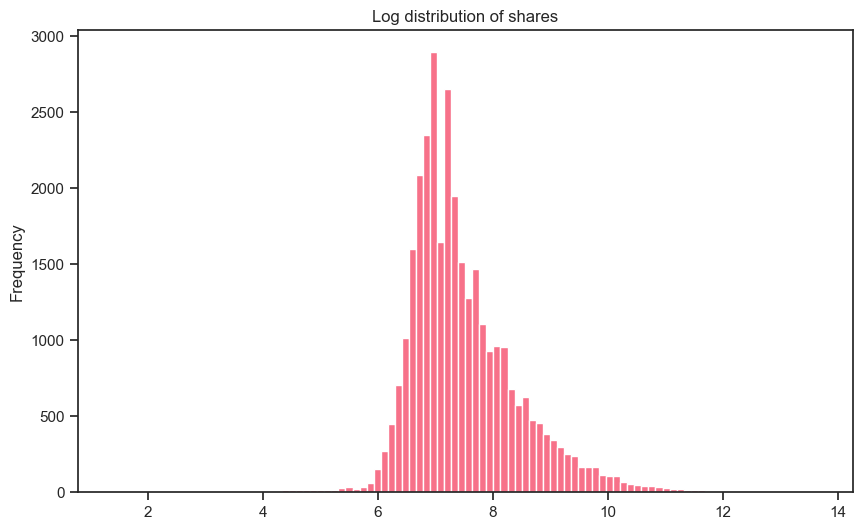

In [205]:
data = np.log(df_dev['shares'])
plt.hist(data, bins=100)
plt.title("Log distribution of shares")
plt.ylabel("Frequency")
plt.show()

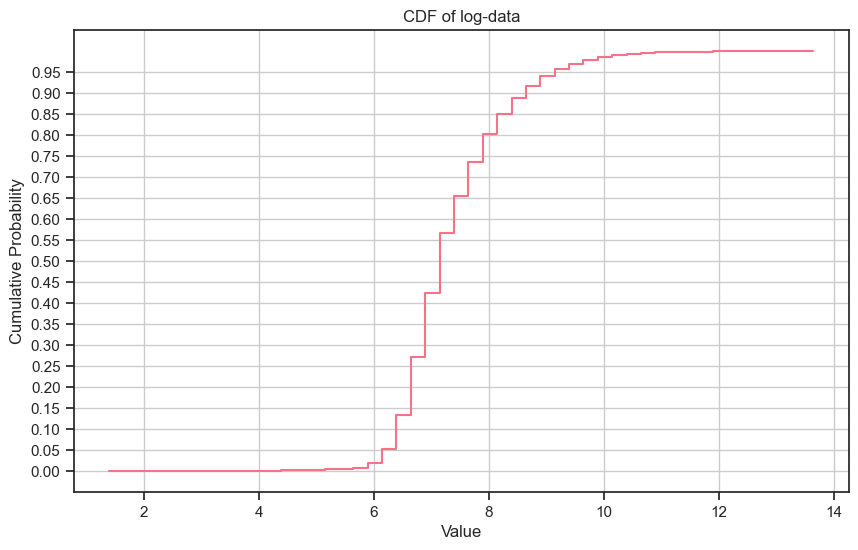

In [206]:
ecdf = ECDF(data)
x = np.linspace(min(data), max(data))
y = ecdf(x)

plt.step(x, y)
plt.title("CDF of log-data")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.yticks(np.arange(0, 1, 0.05))
plt.show()

I also try to see if other features seem to be skewed

In [207]:
numerical_features = df_dev.select_dtypes(include=['float64', 'int64']).columns
skewed_features = df_dev[numerical_features].skew()
skewed_features[skewed_features > 5].index

Index(['num_self_hrefs', 'num_videos', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'shares'],
      dtype='object')

In [208]:
numerical_features = df_dev.select_dtypes(include=['float64', 'int64']).columns
skewed_features = df_dev[numerical_features].skew().sort_values(ascending = False)
skewness = pd.DataFrame({'Skew': skewed_features})
skewness

Skew
kw_max_min                    38.037372
shares                        34.436548
kw_avg_min                    33.563445
self_reference_min_shares     26.145100
self_reference_avg_sharess    17.820740
kw_max_avg                    17.410230
self_reference_max_shares     13.950185
kw_min_max                    10.431120
num_videos                     9.132022
kw_avg_avg                     6.159206
num_self_hrefs                 5.395378
num_imgs                       4.480408
num_hrefs                      4.030456
n_tokens_content               3.047040
min_positive_polarity          3.020188
kw_min_min                     2.374062
LDA_01                         2.071068
abs_title_sentiment_polarity   1.703762
LDA_00                         1.570090
global_rate_negative_words     1.553922
LDA_02                         1.315133
LDA_03                         1.244055
LDA_04                         1.172453
title_subjectivity             0.818021
kw_avg_max                     0.625812
kw_min_avg                     0.469459
rate_negative_words            0.408340
title_sentiment_polarity       0.360601
global_rate_positive_words     0.323888
n_tokens_title                 0.165955
timedelta                      0.123932
global_sentiment_polarity      0.094158
id                             0.000000
min_negative_polarity         -0.075291
num_keywords                  -0.140985
avg_negative_polarity         -0.540624
abs_title_subjectivity        -0.625224
avg_positive_polarity         -0.738730
max_positive_polarity         -0.938224
global_subjectivity           -1.365350
rate_positive_words           -1.421378
n_unique_tokens               -1.465222
n_non_stop_unique_tokens      -2.411027
kw_max_max                    -2.641378
max_negative_polarity         -3.442634
average_token_length          -4.572969
n_non_stop_words              -5.524820

In [209]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #setting squared=False gives the RMSE


# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Set the figure size for the notebook
plt.rcParams["figure.figsize"] = (10, 6)

rs = 42 #random_state value

%matplotlib inline

In [210]:
# Read the CSV file
df_dev = pd.read_csv('summer_project_dataset/transformed_development.csv')
df_eval = pd.read_csv('summer_project_dataset/transformed_evaluation.csv')

In [211]:
numerical_columns = df_dev.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['id', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polar

In [212]:
numerical_features = df_dev.select_dtypes(include=['float64', 'int64']).columns
skewed_features = df_dev[numerical_features].skew()
skewed_features[skewed_features !=0].index

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 

In [213]:
col_to_log_normalize = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares']

In [214]:
col_to_log_normalize_eval= ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']

In [215]:
df_dev[col_to_log_normalize] = df_dev[col_to_log_normalize].applymap(lambda x: np.log(x) if x > 1 else x)
df_eval[col_to_log_normalize_eval] = df_eval[col_to_log_normalize_eval].applymap(lambda x: np.log(x) if x > 1 else x)

In [216]:
col_to_take = ['timedelta', 'n_tokens_title',
               'n_non_stop_unique_tokens', 'num_hrefs',
               'num_imgs', 'num_videos',
               'average_token_length', 'data_channel',
               'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
               'kw_max_min', 'kw_max_max', 'kw_avg_avg',
               'weekday',
               'self_reference_avg_sharess',
               'global_subjectivity', 
               'global_rate_positive_words','global_rate_negative_words',
               'avg_positive_polarity', 'avg_negative_polarity',
               'title_subjectivity', 'title_sentiment_polarity',
               'shares'
               ]

In [217]:
col_to_take_eval = ['timedelta', 'n_tokens_title',
               'n_non_stop_unique_tokens', 'num_hrefs',
               'num_imgs', 'num_videos',
               'average_token_length', 'data_channel',
               'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
               'kw_max_min', 'kw_max_max', 'kw_avg_avg',
               'weekday',
               'self_reference_avg_sharess',
               'global_subjectivity', 
               'global_rate_positive_words','global_rate_negative_words',
               'avg_positive_polarity', 'avg_negative_polarity',
               'title_subjectivity', 'title_sentiment_polarity'
               ]

In [218]:
#Take only the prespecified columns
df_dev = df_dev[col_to_take]
df_eval = df_eval[col_to_take_eval]
df_dev.shape

(31715, 26)

In [219]:
# #Capping the data
# df_dev = df_dev[df_dev['shares']<80000]
# df_dev.shape

Eliminate those lines with a lot of nulls

In [220]:
df_dev = df_dev[df_dev['n_non_stop_unique_tokens'] != 0]
df_dev.shape

(30768, 26)

Encoding of numerical columns

In [221]:
numerical_columns = df_dev.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('shares')
numerical_columns

Index(['timedelta', 'n_tokens_title', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'kw_max_min', 'kw_max_max', 'kw_avg_avg',
       'self_reference_avg_sharess', 'global_subjectivity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'avg_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity'],
      dtype='object')

In [222]:
# # Create an instance of StandardScaler
# scaler = StandardScaler()

# # Apply StandardScaler to the numerical columns
# df_dev[numerical_columns] = scaler.fit_transform(df_dev[numerical_columns])

Encoding of categorical columns

In [223]:
weekday_onehot = pd.get_dummies(df_dev['weekday'])
df_dev = pd.concat((df_dev,weekday_onehot), axis = 1).drop(columns = 'weekday')

weekday_onehot = pd.get_dummies(df_eval['weekday'])
df_eval = pd.concat((df_eval,weekday_onehot), axis = 1).drop(columns = 'weekday')


df_dev

timedelta  n_tokens_title  n_non_stop_unique_tokens  num_hrefs  \
0       4.795791        2.484907                  0.545031   2.302585   
1       6.276643        2.197225                  0.737542   2.197225   
2       6.075346        2.197225                  0.748428   2.484907   
3       4.897840        2.484907                  0.867925   2.197225   
4       6.590301        2.397895                  0.800000   1.609438   
...          ...             ...                       ...        ...   
31709   4.430817        2.397895                  0.703008   2.197225   
31710   3.610918        2.397895                  0.718978   2.302585   
31712   4.795791        2.197225                  0.710623   1.791759   
31713   6.220590        2.397895                  0.621080   3.044522   
31714   4.663439        2.564949                  0.780822   1.609438   

       num_imgs  num_videos  average_token_length data_channel    LDA_00  \
0      3.496508    1.000000              1.538191          bus  0.331582   
1      1.000000    0.000000              1.520943         tech  0.020007   
2      1.386294    1.000000              1.596423    lifestyle  0.033334   
3      0.000000    0.000000              1.603573          bus  0.700107   
4      0.693147    0.000000              1.610836         tech  0.214708   
...         ...         ...                   ...          ...       ...   
31709  1.000000    1.000000              1.475355    lifestyle  0.033436   
31710  1.000000    0.000000              1.565296        world  0.040001   
31712  0.693147    1.000000              1.524844         tech  0.025031   
31713  1.000000    1.098612              1.470920    lifestyle  0.769482   
31714  1.000000    1.000000              1.453881       socmed  0.416473   

         LDA_01    LDA_02    LDA_03    LDA_04  kw_max_min  kw_max_max  \
0      0.050050  0.050035  0.050000  0.518333    5.572154   13.645078   
1      0.020008  0.325602  0.020004  0.614379    8.070906   13.645078   
2      0.033697  0.033333  0.866302  0.033333    6.844815   13.645078   
3      0.033335  0.033334  0.199402  0.033822    7.649693   13.645078   
4      0.025062  0.025016  0.025187  0.710028    6.313548   10.239960   
...         ...       ...       ...       ...         ...         ...   
31709  0.033336  0.196949  0.034751  0.701527    7.313220   13.645078   
31710  0.040000  0.839997  0.040000  0.040002    6.576470   13.645078   
31712  0.025002  0.151008  0.025001  0.773957    6.486161   13.645078   
31713  0.020188  0.020061  0.020789  0.169479    6.431331   13.645078   
31714  0.040062  0.303345  0.040491  0.199628    5.771441   13.645078   

       kw_avg_avg  self_reference_avg_sharess  global_subjectivity  \
0        7.911708                    8.775704             0.471175   
1        7.778013                    0.000000             0.477791   
2        8.385950                   10.312280             0.522234   
3        8.092501                    7.853527             0.405128   
4        6.884398                    6.711740             0.418036   
...           ...                         ...                  ...   
31709    8.339217                    0.000000             0.465859   
31710    7.716799                    8.444515             0.343382   
31712    7.737357                    8.039157             0.551232   
31713    8.172798                    9.581904             0.500027   
31714    8.051623                    7.476850             0.536430   

       global_rate_positive_words  global_rate_negative_words  \
0                        0.041379                    0.008867   
1                        0.033797                    0.019881   
2                        0.017241                    0.043103   
3                        0.011696                    0.029240   
4                        0.034965                    0.024476   
...                           ...                         ...   
31709                    0.034749           

In [224]:
channel_onehot = pd.get_dummies(df_dev['data_channel'])
df_dev = pd.concat((df_dev,channel_onehot), axis = 1).drop(columns = 'data_channel')

channel_onehot = pd.get_dummies(df_eval['data_channel'])
df_eval = pd.concat((df_eval,channel_onehot), axis = 1).drop(columns = 'data_channel')

df_dev.shape

(30768, 37)

PCA for LDA's

In [225]:
from sklearn.decomposition import PCA
df = df_dev[['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']]
pca = PCA(n_components=1)

# Fit PCA on your data
pca.fit(df)

# Transform the data to the lower-dimensional space
df_reduced = pca.transform(df)

df_eval_reduced = pca.transform(df_eval[['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']])

df_reduced.shape


(30768, 1)

In [226]:
df_dev['PC1'] = df_reduced

df_eval['PC1'] = df_eval_reduced

df_dev.shape

(30768, 38)

In [227]:
df_dev.drop(['LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'], axis = 1, inplace=True)
df_eval.drop(['LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'], axis = 1, inplace=True)

In [228]:
df_dev.shape

(30768, 33)

In [229]:
df_dev.shape

(30768, 33)

In [230]:
df_eval.shape

(7917, 32)

Models

In [231]:
#Some models

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoLars, \
    LassoLarsCV, OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, PassiveAggressiveRegressor, \
    RANSACRegressor, TheilSenRegressor, HuberRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

#Metric
from sklearn.metrics import mean_squared_error as mse

rs = 42  # Random state for reproducibility


In [232]:

# Create a list of regression models
regression_models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    LassoLars(),
    LassoLarsCV(),
    OrthogonalMatchingPursuit(),
    BayesianRidge(),
    ARDRegression(),
    PassiveAggressiveRegressor(),
    RANSACRegressor(),
    TheilSenRegressor(),
    HuberRegressor(),
    KernelRidge(),
    LinearSVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(random_state=rs),
    ExtraTreesRegressor(random_state=rs),
    AdaBoostRegressor(random_state=rs),
    GradientBoostingRegressor(random_state=rs),
    #MLPRegressor(random_state=rs, max_iter=10000),
    xgb.XGBRegressor(random_state=rs),
    lgb.LGBMRegressor(random_state=rs),
    CatBoostRegressor(random_state=rs)
]

# Create a list of names corresponding to the regression models
names = [
    'lr',
    'lasso',
    'ridge',
    'en',
    'lar',
    'llar',
    'omp',
    'br',
    'ard',
    'par',
    'ransac',
    'tr',
    'huber',
    'kr',
    'linearsvm',
    'knn',
    'dt',
    'rf',
    'et',
    'ada',
    'gbr',
    #'mlp',
    'xgboost',
    'lightgbm',
    'catboost'
]

In [233]:
t = []
for model, name in zip(regression_models, names):
    print(f'Started {model}')
    X = df_dev.drop(columns = 'shares')
    y = df_dev['shares']
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = rs, test_size = 0.2)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'finished {model}')
    t.append({'model_name': name, 'rmse': mse(y_test, y_pred, squared=False)})
res = pd.DataFrame(t)
res.sort_values(by='rmse', inplace=True)
res

Started LinearRegression()
finished LinearRegression()
Started Lasso()
finished Lasso()
Started Ridge()
finished Ridge()
Started ElasticNet()
finished ElasticNet()
Started LassoLars()
finished LassoLars()
Started LassoLarsCV()
finished LassoLarsCV()
Started OrthogonalMatchingPursuit()
finished OrthogonalMatchingPursuit()
Started BayesianRidge()
finished BayesianRidge()
Started ARDRegression()
finished ARDRegression()
Started PassiveAggressiveRegressor()
finished PassiveAggressiveRegressor()
Started RANSACRegressor()
finished RANSACRegressor()
Started TheilSenRegressor()
finished TheilSenRegressor()
Started HuberRegressor()


c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


finished HuberRegressor()
Started KernelRidge()
finished KernelRidge()
Started LinearSVR()


c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


finished LinearSVR()
Started KNeighborsRegressor()
finished KNeighborsRegressor()
Started DecisionTreeRegressor()
finished DecisionTreeRegressor()
Started RandomForestRegressor(random_state=42)
finished RandomForestRegressor(random_state=42)
Started ExtraTreesRegressor(random_state=42)
finished ExtraTreesRegressor(random_state=42)
Started AdaBoostRegressor(random_state=42)
finished AdaBoostRegressor(random_state=42)
Started GradientBoostingRegressor(random_state=42)
finished GradientBoostingRegressor(random_state=42)
Started XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_oneho

In [235]:
preds  = np.exp(regression_models[23].predict(df_eval))
df_submit = pd.read_csv('summer_project_dataset/sample_submission.csv')
df_submit['Predicted'] = preds
df_submit.to_csv('sumission_catboost_log_transformed_target_and_features_only_skew_different_then_0.csv', index=False)

There is some skewed data, I tryed to develop some models using the log transformation both on target and on skewed variables but this proved to give worst performance than the baseline >6000 RMSE.

## 8.2 My model with classification of outliers and fitting of two regressors

In [239]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error #setting squared=False gives the RMSE

# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Set the figure size for the notebook
plt.rcParams["figure.figsize"] = (10, 6)

rs = 42 #random_state value

%matplotlib inline

In [247]:
#Some models

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoLars, \
    LassoLarsCV, OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, PassiveAggressiveRegressor, \
    RANSACRegressor, TheilSenRegressor, HuberRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

#Metric
from sklearn.metrics import mean_squared_error as mse

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures



rs = 42  # Random state for reproducibility

In [248]:
# Read the CSV file
df_dev = pd.read_csv('summer_project_dataset/transformed_development.csv')
df_eval = pd.read_csv('summer_project_dataset/transformed_evaluation.csv')

In [249]:
col_to_take = ['id',
               #'url',
               'timedelta',
               #'n_tokens_title',
               'n_tokens_content',
                #'n_unique_tokens',
                #'n_non_stop_words',
                #'n_non_stop_unique_tokens',
                'num_hrefs',
                #'num_self_hrefs',
                'num_imgs',
                'num_videos',
                'average_token_length',
                #'num_keywords',
                #'kw_min_min',
                'kw_max_min',
                #'kw_avg_min',
                #'kw_min_max',
                #'kw_max_max',
                'kw_avg_max',
                #'kw_min_avg',
                #'kw_max_avg',
                'kw_avg_avg',
                #'self_reference_min_shares',
                #'self_reference_max_shares',
                'self_reference_avg_sharess',
                'LDA_00',
                'LDA_01', 
                'LDA_02', 
                'LDA_03', 
                'LDA_04', 
                'global_subjectivity',
                #'global_sentiment_polarity', 
                'global_rate_positive_words',
                'global_rate_negative_words',
                #'rate_positive_words',
                #'rate_negative_words',
                'avg_positive_polarity',
                #'min_positive_polarity',
                #'max_positive_polarity', 
                'avg_negative_polarity',
                #'min_negative_polarity', 
                #'max_negative_polarity', 
                'title_subjectivity',
                'title_sentiment_polarity', 
                #'abs_title_subjectivity',
                #'abs_title_sentiment_polarity', 
                'data_channel', 
                'weekday',
                'shares'
               ]

In [250]:
col_to_take_eval = [item for item in col_to_take if item != 'shares']
col_to_take_eval

['id',
 'timedelta',
 'n_tokens_content',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'kw_max_min',
 'kw_avg_max',
 'kw_avg_avg',
 'self_reference_avg_sharess',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'avg_positive_polarity',
 'avg_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'data_channel',
 'weekday']

In [251]:
#Take only the prespecified columns
df_dev = df_dev[col_to_take]
df_eval = df_eval[col_to_take_eval]
(df_dev.shape, df_eval.shape)

((31715, 26), (7917, 25))

Capping of the outliers

In [252]:
# IN CASE YOU WANT TO CUT THEM OF FOR THE PROCEDING ANALYSIS
threshold = 85000
data_points_discarded = df_dev[df_dev['shares']>threshold]['id'].count()
value = df_dev[df_dev['shares']>threshold]['id'].count()/df_dev['id'].count() * 100
df_dev = df_dev[df_dev['shares'] < threshold]
print(f'Percentage of data set discarded by using as threshold {threshold} is: {value}%')
print(f'Number of datapoints discarded by using as threshold {threshold} is: {data_points_discarded}')

Percentage of data set discarded by using as threshold 85000 is: 0.19864417468075046%
Number of datapoints discarded by using as threshold 85000 is: 63


Around 0.2% of dataset has been discarded

Imputations of zero values in some columns

In [253]:
impute_cols = ['average_token_length', 'global_subjectivity']

#This will be imputed using mean strategy
df_dev[impute_cols] = df_dev[impute_cols].replace(0, np.nan)
df_eval[impute_cols] = df_eval[impute_cols].replace(0, np.nan)

# Create a KNNImputer object
imputer = SimpleImputer(strategy='mean')
df_dev[impute_cols] = imputer.fit_transform(df_dev[impute_cols])
df_eval[impute_cols] = imputer.transform(df_eval[impute_cols])

In [254]:
impute_cols = ['n_tokens_content', 'avg_positive_polarity', 'avg_negative_polarity']

#This will be imputed using median strategy
df_dev[impute_cols] = df_dev[impute_cols].replace(0, np.nan)
df_eval[impute_cols] = df_eval[impute_cols].replace(0, np.nan)

# Create a KNNImputer object
imputer = SimpleImputer(strategy='median')
df_dev[impute_cols] = imputer.fit_transform(df_dev[impute_cols])
df_eval[impute_cols] = imputer.transform(df_eval[impute_cols])

# Imputing the values for the 0's in self_reference_avg_sharess with mean of shares
mean = df_dev['shares'].mean()
df_dev['self_reference_avg_sharess'] = df_dev['self_reference_avg_sharess'].replace(0, mean)
df_eval['self_reference_avg_sharess'] = df_eval['self_reference_avg_sharess'].replace(0, mean)

(df_dev.shape, df_eval.shape)

((31652, 26), (7917, 25))

In [255]:
df_dev.drop('id', axis =1, inplace=True)
df_eval.drop('id', axis =1, inplace=True)
(df_dev.shape, df_eval.shape)

((31652, 25), (7917, 24))

Scaling of numerical columns

In [256]:
numerical_columns = df_dev.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['timedelta', 'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'kw_max_min', 'kw_avg_max', 'kw_avg_avg',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_rate_positive_words',
       'global_rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

In [257]:
numerical_columns = ['timedelta', 'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'kw_max_min', 'kw_avg_max', 'kw_avg_avg',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_rate_positive_words',
       'global_rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity']

In [258]:
numerical_columns_eval = [item for item in numerical_columns if item != 'shares']

In [259]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
df_dev[numerical_columns] = scaler.fit_transform(df_dev[numerical_columns])
df_eval[numerical_columns_eval] = scaler.transform(df_eval[numerical_columns_eval])
(df_dev.shape, df_eval.shape)

((31652, 25), (7917, 24))

Encoding of categorical columns

In [260]:
weekday_onehot = pd.get_dummies(df_dev['weekday'])
df_dev = pd.concat((df_dev,weekday_onehot), axis = 1).drop(columns = 'weekday')

weekday_onehot = pd.get_dummies(df_eval['weekday'])
df_eval = pd.concat((df_eval,weekday_onehot), axis = 1).drop(columns = 'weekday')

(df_dev.shape, df_eval.shape)

((31652, 31), (7917, 30))

In [261]:
channel_onehot = pd.get_dummies(df_dev['data_channel'])
df_dev = pd.concat((df_dev,channel_onehot), axis = 1).drop(columns = 'data_channel')

channel_onehot = pd.get_dummies(df_eval['data_channel'])
df_eval = pd.concat((df_eval,channel_onehot), axis = 1).drop(columns = 'data_channel')

(df_dev.shape, df_eval.shape)

((31652, 36), (7917, 35))

Aggregaion with PCA for LDA's

In [262]:
cols_pca = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']
name_pca = 'PC1'

# Select the columns of interest
df = df_dev[cols_pca]

# Calculate the mean for each column
column_means = df.mean()

# Subtract the mean from each column
df = df - column_means
df_eval_pca = df_eval[cols_pca] - column_means



# Fit PCA on your data
pca = PCA(n_components=1)
pca.fit(df)

# Transform the data to the lower-dimensional space
df_reduced = pca.transform(df)
df_eval_reduced = pca.transform(df_eval_pca)

df_dev[name_pca] = df_reduced
df_eval[name_pca] = df_eval_reduced

df_dev.drop(cols_pca, axis = 1, inplace=True)
df_eval.drop(cols_pca, axis = 1, inplace=True)
(df_dev.shape, df_eval.shape)


((31652, 32), (7917, 31))

In [263]:
(df_dev.shape, df_eval.shape)

((31652, 32), (7917, 31))

## Models

Classifyng the outliers if more then cutoff value then they are outliers otherwise not

In [324]:
cutoff_value = df_dev['shares'].median() * 30
cutoff_value

42000.0

I used as a threshold 5 times the median 

In [325]:
df_dev['outlier'] = df_dev['shares'].apply(lambda x: 1 if x > cutoff_value else 0)
df_dev.shape

(31652, 33)

In [326]:
df_dev['outlier'].value_counts()

0    31499
1      153
Name: outlier, dtype: int64

### Finding the best classifier

In [327]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import train_test_split


In [328]:
# Create a list of classification models
classification_models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(random_state=rs, max_depth = 10),
    ExtraTreesClassifier(random_state=rs),
    AdaBoostClassifier(random_state=rs),
    GradientBoostingClassifier(random_state=rs),
    xgb.XGBClassifier(random_state=rs),
    lgb.LGBMClassifier(random_state=rs),
    CatBoostClassifier(random_state=rs)
]

# Create a list of names corresponding to the classification models
names = [
    'logistic_regression',
    'knn',
    'decision_tree',
    'random_forest',
    'extra_trees',
    'ada_boost',
    'gradient_boosting',
    'xgboost',
    'lightgbm',
    'catboost'
]

In [329]:
from imblearn.under_sampling import RandomUnderSampler

t = []
for model, name in zip(classification_models, names):
    print(f'Started {name}')
    X = df_dev.drop(columns=['shares', 'outlier'])
    y = df_dev['outlier']
    # Create the RandomUnderSampler object
    rus = RandomUnderSampler()
    X, y = rus.fit_resample(X,y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=rs, test_size=0.2)
    print(f'Shape of training data is: {X_train.shape}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'Finished {name}')
    
    t.append({
        'model_name': name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })


Started logistic_regression
Shape of training data is: (244, 31)
Finished logistic_regression
Started knn
Shape of training data is: (244, 31)
Finished knn
Started decision_tree
Shape of training data is: (244, 31)
Finished decision_tree
Started random_forest
Shape of training data is: (244, 31)
Finished random_forest
Started extra_trees
Shape of training data is: (244, 31)
Finished extra_trees
Started ada_boost
Shape of training data is: (244, 31)
Finished ada_boost
Started gradient_boosting
Shape of training data is: (244, 31)
Finished gradient_boosting
Started xgboost
Shape of training data is: (244, 31)
Finished xgboost
Started lightgbm
Shape of training data is: (244, 31)
Finished lightgbm
Started catboost
Shape of training data is: (244, 31)
Learning rate set to 0.005641
0:	learn: 0.6912943	total: 3.79ms	remaining: 3.78s
1:	learn: 0.6892832	total: 6.89ms	remaining: 3.44s
2:	learn: 0.6870637	total: 9.76ms	remaining: 3.24s
3:	learn: 0.6853174	total: 12.6ms	remaining: 3.15s
4:	learn

In [330]:
res = pd.DataFrame(t)
res.sort_values(by='f1_score', ascending=False)

model_name  accuracy  precision    recall  f1_score
5            ada_boost  0.741935   0.741935  0.741935  0.741935
7              xgboost  0.693548   0.687500  0.709677  0.698413
8             lightgbm  0.677419   0.666667  0.709677  0.687500
9             catboost  0.677419   0.677419  0.677419  0.677419
0  logistic_regression  0.645161   0.621622  0.741935  0.676471
3        random_forest  0.693548   0.730769  0.612903  0.666667
6    gradient_boosting  0.661290   0.666667  0.645161  0.655738
1                  knn  0.677419   0.703704  0.612903  0.655172
4          extra_trees  0.564516   0.558824  0.612903  0.584615
2        decision_tree  0.548387   0.551724  0.516129  0.533333

xgboost seems to be the best classifier, I have used under sampling

## Train two models one for outliers and one for normal values

#### Train model for normal values

In [341]:
df_dev_normal = df_dev[df_dev['outlier'] == 0]

In [342]:
df_dev_normal.drop('outlier', axis = 1, inplace = True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_16216\3469058423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev_normal.drop('outlier', axis = 1, inplace = True)


In [343]:
df_dev_normal.shape

(31499, 32)

In [ ]:
# Create a list of regression models
degree = 2

regression_models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression()
    ),
    make_pipeline(
        PolynomialFeatures(degree),
        Ridge(alpha=1)
    ),
    make_pipeline(
        PolynomialFeatures(degree),
        Lasso(alpha=1)
    ),
    ElasticNet(),
    LassoLars(),
    LassoLarsCV(),
    OrthogonalMatchingPursuit(),
    BayesianRidge(),
    ARDRegression(),
    PassiveAggressiveRegressor(),
    RANSACRegressor(),
    TheilSenRegressor(),
    HuberRegressor(),
    KernelRidge(),
    LinearSVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(random_state=rs),
    ExtraTreesRegressor(random_state=rs),
    AdaBoostRegressor(random_state=rs),
    GradientBoostingRegressor(random_state=rs),
    xgb.XGBRegressor(random_state=rs),
    lgb.LGBMRegressor(random_state=rs),
    CatBoostRegressor(random_state=rs)
]

# Create a list of names corresponding to the regression models
names = [
    'lr',
    'lasso',
    'ridge',
    f'poly{degree}+linreg',
    f'poly{degree}+ridge',
    f'poly{degree}+lasso',
    'en',
    'lar',
    'llar',
    'omp',
    'br',
    'ard',
    'par',
    'ransac',
    'tr',
    'huber',
    'kr',
    'linearsvm',
    'knn',
    'dt',
    'rf',
    'et',
    'ada',
    'gbr',
    'xgboost',
    'lightgbm',
    'catboost'
]

In [335]:
t = []
for model, name in zip(regression_models, names):
    print(f'Started {model}')
    X = df_dev_normal.drop(columns = 'shares')
    y = df_dev_normal['shares']
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = rs, test_size = 0.2)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'finished {model}')
    t.append({'model_name': name, 'rmse': mse(y_test, y_pred, squared=False)})
res = pd.DataFrame(t)
res.sort_values(by='rmse')

Started LinearRegression()
finished LinearRegression()
Started Lasso()
finished Lasso()
Started Ridge()
finished Ridge()
Started Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])
finished Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])
Started Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1))])
finished Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1))])
Started Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=1))])


c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.490e+09, tolerance: 4.341e+07
  model = cd_fast.enet_coordinate_descent(


finished Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=1))])
Started ElasticNet()
finished ElasticNet()
Started LassoLars()
finished LassoLars()
Started LassoLarsCV()
finished LassoLarsCV()
Started OrthogonalMatchingPursuit()
finished OrthogonalMatchingPursuit()
Started BayesianRidge()
finished BayesianRidge()
Started ARDRegression()
finished ARDRegression()
Started PassiveAggressiveRegressor()
finished PassiveAggressiveRegressor()
Started RANSACRegressor()
finished RANSACRegressor()
Started TheilSenRegressor()
finished TheilSenRegressor()
Started HuberRegressor()
finished HuberRegressor()
Started KernelRidge()
finished KernelRidge()
Started LinearSVR()
finished LinearSVR()
Started KNeighborsRegressor()
finished KNeighborsRegressor()
Started DecisionTreeRegressor()
finished DecisionTreeRegressor()
Started RandomForestRegressor(random_state=42)
finished RandomForestRegressor(random_state=42)
Started ExtraTreesRegressor(random_state=4

model_name         rmse
25      lightgbm  3984.981956
23           gbr  4000.865523
26      catboost  4011.025064
11           ard  4019.242007
10            br  4019.801894
1          lasso  4020.011819
7            lar  4020.011859
0             lr  4020.159743
2          ridge  4020.170412
16            kr  4020.172183
8           llar  4020.172694
6             en  4036.156120
5    poly2+lasso  4037.986784
9            omp  4041.841240
4    poly2+ridge  4046.773311
3   poly2+linreg  4046.891472
21            et  4055.627655
20            rf  4088.480976
14            tr  4101.728275
24       xgboost  4122.910304
15         huber  4227.365994
12           par  4251.708804
17     linearsvm  4301.683361
18           knn  4325.469592
13        ransac  4735.374256
22           ada  5499.199126
19            dt  5801.138185

#### Here I do the same regression for the extreme values

In [336]:
df_dev_extreme = df_dev[df_dev['outlier'] == 1]

In [337]:
df_dev_extreme.drop('outlier', axis = 1, inplace = True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_16216\3486273293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev_extreme.drop('outlier', axis = 1, inplace = True)


In [338]:
# Create a list of regression models
degree = 2

regression_models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression()
    ),
    make_pipeline(
        PolynomialFeatures(degree),
        Ridge(alpha=1)
    ),
    make_pipeline(
        PolynomialFeatures(degree),
        Lasso(alpha=1)
    ),
    ElasticNet(),
    LassoLars(),
    LassoLarsCV(),
    OrthogonalMatchingPursuit(),
    BayesianRidge(),
    ARDRegression(),
    PassiveAggressiveRegressor(),
    RANSACRegressor(),
    TheilSenRegressor(),
    HuberRegressor(),
    KernelRidge(),
    LinearSVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(random_state=rs),
    ExtraTreesRegressor(random_state=rs),
    AdaBoostRegressor(random_state=rs),
    GradientBoostingRegressor(random_state=rs),
    xgb.XGBRegressor(random_state=rs),
    lgb.LGBMRegressor(random_state=rs),
    CatBoostRegressor(random_state=rs)
]

# Create a list of names corresponding to the regression models
names = [
    'lr',
    'lasso',
    'ridge',
    f'poly{degree}+linreg',
    f'poly{degree}+ridge',
    f'poly{degree}+lasso',
    'en',
    'lar',
    'llar',
    'omp',
    'br',
    'ard',
    'par',
    'ransac',
    'tr',
    'huber',
    'kr',
    'linearsvm',
    'knn',
    'dt',
    'rf',
    'et',
    'ada',
    'gbr',
    'xgboost',
    'lightgbm',
    'catboost'
]

In [339]:
t = []
for model, name in zip(regression_models, names):
    print(f'Started {model}')
    X = df_dev_extreme.drop(columns = 'shares')
    y = df_dev_extreme['shares']
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = rs, test_size = 0.2)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'finished {model}')
    t.append({'model_name': name, 'rmse': mse(y_test, y_pred, squared=False)})
res = pd.DataFrame(t)
res.sort_values(by='rmse')

Started LinearRegression()
finished LinearRegression()
Started Lasso()
finished Lasso()
Started Ridge()
finished Ridge()
Started Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])
finished Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])
Started Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1))])
finished Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1))])
Started Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=1))])
finished Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=1))])
Started ElasticNet()
finished ElasticNet()
Started LassoLars()
finished LassoLars()
Started LassoLarsCV()


c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.282e+07, tolerance: 1.594e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\linear_model\_least_angle.py:678: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 36 iterations, alpha=1.576e+01, previous alpha=1.032e+01, with an active set of 29 regressors.
  warnings.warn(


finished LassoLarsCV()
Started OrthogonalMatchingPursuit()
finished OrthogonalMatchingPursuit()
Started BayesianRidge()
finished BayesianRidge()
Started ARDRegression()
finished ARDRegression()
Started PassiveAggressiveRegressor()
finished PassiveAggressiveRegressor()
Started RANSACRegressor()


c:\Users\lucas\anaconda3\envs\KernelDSLProjectLucaScalenghe2023\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


finished RANSACRegressor()
Started TheilSenRegressor()
finished TheilSenRegressor()
Started HuberRegressor()
finished HuberRegressor()
Started KernelRidge()
finished KernelRidge()
Started LinearSVR()
finished LinearSVR()
Started KNeighborsRegressor()
finished KNeighborsRegressor()
Started DecisionTreeRegressor()
finished DecisionTreeRegressor()
Started RandomForestRegressor(random_state=42)
finished RandomForestRegressor(random_state=42)
Started ExtraTreesRegressor(random_state=42)
finished ExtraTreesRegressor(random_state=42)
Started AdaBoostRegressor(random_state=42)
finished AdaBoostRegressor(random_state=42)
Started GradientBoostingRegressor(random_state=42)
finished GradientBoostingRegressor(random_state=42)
Started XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
        

model_name          rmse
26      catboost  11107.465030
8           llar  11208.249708
10            br  11371.034867
20            rf  11421.959345
22           ada  11591.365916
21            et  11617.016928
0             lr  11751.142841
1          lasso  11758.321000
7            lar  11758.339287
16            kr  11915.366785
2          ridge  11961.549198
11           ard  11993.292026
6             en  12155.547841
18           knn  12513.603313
25      lightgbm  12540.553993
9            omp  12709.353614
15         huber  12961.073647
19            dt  13442.673985
24       xgboost  13457.437293
23           gbr  13514.266104
12           par  13587.132769
14            tr  13965.663928
4    poly2+ridge  17589.815513
3   poly2+linreg  17671.119396
5    poly2+lasso  18255.126505
13        ransac  25989.537062
17     linearsvm  56372.352412

## Here I create my own estimator with a classificator and then a regressor for each case normal/extreme

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

class MyEstimator(BaseEstimator):
    
    def __init__(self, model_classifier, standard_regressor, extreme_regressor, weighted_pred):
        self.model_classifier = model_classifier
        self.standard_regressor = standard_regressor
        self.extreme_regressor = extreme_regressor
        self.weighted_pred = weighted_pred

    def fit(self, X, y):
        X['shares'] = y #Here I reconstruct my df for clarity
        X['outlier'] = X['shares'].apply(lambda x: 1 if x > cutoff_value else 0)    #Here I create the outlier column

        #I apply oversampling only for the classification task
        resampler = RandomUnderSampler()
        X_for_classifier, y_for_classifier = resampler.fit_resample(X.drop(['shares','outlier'], axis = 1), X['outlier'])

        #Here I train the classifier for outlier classification
        # X_for_classifier = X_for_classifier.drop(['shares','outlier'], axis = 1)
        # y_for_classifier = X_for_classifier['outlier']
        
        print('Fitting the classifier.....')
        print(f'This classifier uses oversampling so the X shape is {X_for_classifier.shape}')
        self.model_classifier.fit(X_for_classifier,y_for_classifier)
        print('Classifier fitted')
        
        #standard values has 0 as outlier label
        standard_df = X[X['outlier'] == 0]  #you only take those instances where outlier == 0
        std_X = standard_df.drop(['shares', 'outlier'], axis = 1)
        std_shares_values = standard_df['shares']

        #extreme values has 1 as outlier label
        extreme_df = X[X['outlier'] == 1]   #you only take those instances where outlier == 1
        ext_X = extreme_df.drop(['shares', 'outlier'], axis = 1)
        ext_shares_values = extreme_df['shares']

        print(f'Fitting the standard regressor with X of shape {std_X.shape}')
        print(std_X.shape)
        self.standard_regressor.fit(std_X, std_shares_values)
        print('Standard Regressor fitted')

        print(f'Fitting the extreme regressor with X of shape {ext_X.shape}')
        self.extreme_regressor.fit(ext_X, ext_shares_values)
        print('Extrem Regressor fitted')
        return self
    
    def predict(self,X):
        if self.weighted_pred == True:
            return self.predict_with_weights(X)
        if self.weighted_pred == False:
            return self.predict_with_0_1(X)
        
        
    def predict_with_0_1(self, X):
    
        pred_labels = self.model_classifier.predict(X).reshape(-1,1)
        std_X = X[pred_labels == 0]
        ext_X = X[pred_labels == 1]
        
        y_pred = np.zeros(shape = pred_labels.shape)
        if len(std_X >= 0):
            print('I have some standard values to predict')
            std_pred = self.standard_regressor.predict(std_X)
            y_pred[pred_labels == 0] = std_pred

        if len(ext_X >= 0):
            print('I have some extreme values to predict')
            ext_pred = self.extreme_regressor.predict(ext_X)
            y_pred[pred_labels == 1] = ext_pred
    
        return y_pred, pred_labels

In [344]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Define a random forest classifier, standard regressor, and extreme regressor
classifier = xgb.XGBClassifier(random_state=rs)
std_regressor = lgb.LGBMRegressor(random_state=rs)
ext_regressor =  CatBoostRegressor(random_state=rs)



# Create an instance of MyEstimator with the random models
my_estimator = MyEstimator(classifier, std_regressor, ext_regressor, weighted_pred=False)


X = df_dev.drop(columns = ['shares', 'outlier'])
y = df_dev['shares']
labels = df_dev['outlier']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42, test_size=0.1, stratify=labels)
[X_train.shape, X_test.shape]

[(28486, 31), (3166, 31)]

In [345]:
my_estimator.fit(X_train, y_train)

Fitting the classifier.....
This classifier uses oversampling so the X shape is (276, 31)
Classifier fitted
Fitting the standard regressor with X of shape (28348, 31)
(28348, 31)
Standard Regressor fitted
Fitting the extreme regressor with X of shape (138, 31)
Learning rate set to 0.029942
0:	learn: 11561.8791801	total: 2.15ms	remaining: 2.15s
1:	learn: 11505.4838162	total: 4.02ms	remaining: 2.01s
2:	learn: 11430.7829637	total: 5.68ms	remaining: 1.89s
3:	learn: 11353.5422175	total: 7.16ms	remaining: 1.78s
4:	learn: 11312.6274261	total: 8.63ms	remaining: 1.72s
5:	learn: 11254.5365698	total: 10ms	remaining: 1.66s
6:	learn: 11187.5389131	total: 11.6ms	remaining: 1.64s
7:	learn: 11126.8408231	total: 13.1ms	remaining: 1.62s
8:	learn: 11077.6392424	total: 14.6ms	remaining: 1.6s
9:	learn: 10998.9794356	total: 16.8ms	remaining: 1.66s
10:	learn: 10939.6233952	total: 18.5ms	remaining: 1.67s
11:	learn: 10887.9586174	total: 20.4ms	remaining: 1.68s
12:	learn: 10814.6262530	total: 22.3ms	remaining: 

MyEstimator(extreme_regressor=<catboost.core.CatBoostRegressor object at 0x000002D352372110>,
            model_classifier=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_po...
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
            standard_regressor=LGBMRegressor(random_state=42),
            weighted_pred=False)

In [346]:
predictions = my_estimator.predict(X_test)

I have some standard values to predict
I have some extreme values to predict


In [347]:
(predictions[1] == 1).sum()

1191

In [348]:
my_estimator.fit(X, y)

Fitting the classifier.....
This classifier uses oversampling so the X shape is (306, 31)
Classifier fitted
Fitting the standard regressor with X of shape (31499, 31)
(31499, 31)
Standard Regressor fitted
Fitting the extreme regressor with X of shape (153, 31)
Learning rate set to 0.030434
0:	learn: 11319.5035508	total: 2.33ms	remaining: 2.33s
1:	learn: 11255.8794120	total: 4.2ms	remaining: 2.1s
2:	learn: 11216.8260643	total: 5.92ms	remaining: 1.97s
3:	learn: 11146.0148713	total: 7.63ms	remaining: 1.9s
4:	learn: 11092.6842452	total: 9.21ms	remaining: 1.83s
5:	learn: 11029.2669036	total: 11ms	remaining: 1.82s
6:	learn: 10992.8357532	total: 13.3ms	remaining: 1.89s
7:	learn: 10932.2141083	total: 15.1ms	remaining: 1.88s
8:	learn: 10887.9346379	total: 17ms	remaining: 1.87s
9:	learn: 10814.3512540	total: 18.6ms	remaining: 1.85s
10:	learn: 10777.7883493	total: 21ms	remaining: 1.89s
11:	learn: 10728.3978003	total: 23.1ms	remaining: 1.9s
12:	learn: 10690.3297129	total: 25.3ms	remaining: 1.92s
1

MyEstimator(extreme_regressor=<catboost.core.CatBoostRegressor object at 0x000002D352372110>,
            model_classifier=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_po...
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
            standard_regressor=LGBMRegressor(random_state=42),
            weighted_pred=False)

In [349]:
preds  = my_estimator.predict(df_eval)
df_submit = pd.read_csv('summer_project_dataset/sample_submission.csv')
df_submit['Predicted'] = preds[0]
df_submit.to_csv('my_classifier_submission.csv', index=False)

I have some standard values to predict
I have some extreme values to predict


This approach scored on the evaluation platform 32188.007